# Drawing utilities

In [20]:
from drawing_utils import display_img
from tqdm.notebook import tqdm
import shapely.affinity

current_year=None


def draw_contour(img, polygon, color, thickness=1, do_copy=True):
    if isinstance(polygon, (list, np.ndarray)) and not len(polygon):
        return img
    
    if isinstance(polygon, MultiPolygon):
        return draw_contour(img, list(polygon.geoms), color, thickness)
    
    if isinstance(polygon, Territory):
        return draw_contour(img, polygon.polygon, color, thickness)
    
    res = img.copy() if do_copy else img
    if isinstance(polygon, (list, np.ndarray)):
        if not len(polygon):
            return img
        else:
            drawnFirst = draw_contour(res, polygon[0], color, thickness, False)
            return draw_contour(drawnFirst, polygon[1:], color, thickness, False)
    polygon = shapely.affinity.scale(polygon, xfact=.5, yfact=.5, origin=(0,0))
    mask = np.zeros(res.shape[:2]).astype(bool)
    coords = np.array(polygon.exterior.coords)
    rr, cc = skimage.draw.polygon_perimeter(coords[:, 1], coords[:, 0], shape=mask.shape)
    mask[rr,cc] = True
    if thickness > 1:
        mask = skimage.morphology.dilation(mask, selem=skimage.morphology.disk(thickness))
    try :
        res[mask] = color
        return res
    except ValueError as e:
        print('res shape ', res.shape)
        print('mask shape  ', mask.shape)
        print('mask', mask)
        print('color : ', color)
        raise e

def draw_plain(img, polygon, color=None, do_copy=True):   
    if isinstance(polygon, MultiPolygon):
        return draw_plain(img, list(polygon.geoms), color)
    
    if isinstance(polygon, Territory):
        return draw_plain(img, polygon.polygon, color if color else polygon.color)
    
    res = img.copy() if do_copy else img
    if isinstance(polygon, (list, np.ndarray)):
        for p in tqdm(polygon, leave=False, desc="Drawing shapes..."):
            res = draw_plain(res, p, color, False)
        return res

    if color is None :
        color = np.random.rand(3)
    polygon = shapely.affinity.scale(polygon, xfact=.5, yfact=.5, origin=(0,0))
    coords = np.array(polygon.exterior.coords)
    rr, cc = skimage.draw.polygon(coords[:, 1], coords[:, 0], shape=img.shape[:2])
    try :
        res[rr, cc] = color
    except ValueError as e:
        print('res shape ', res.shape)
        print('rr shape  ', rr.shape)
        print('color : ', color)
        raise e
    return res

current_year=12

def draw_territories(base_img, *args):
    res = base_img[::2, ::2].copy() # divide area by 2
    title=""
    for arg in args:
        if isinstance(arg, str):
            title = arg
        else:
            (shapes, draw_type, color) = arg
            if color=='red':
                color =  [1,0,0]
            elif color=='green':
                color = [0,1,0]
            elif color=='blue' :
                color=[0,0,1]
            elif color=='white':
                color=[1,1,1]
            if draw_type=='stroke':
                res = draw_contour(res, shapes, color, False)
            elif draw_type == 'fill':
                res = draw_plain(res, shapes, color, False)
            else :
                raise Exception(f'Unknown draw type : {draw_type}')
    display_img(res, f'{current_year-1} to {current_year} : {title}')


# Analysis

ignored 1 based on ignored_colors 


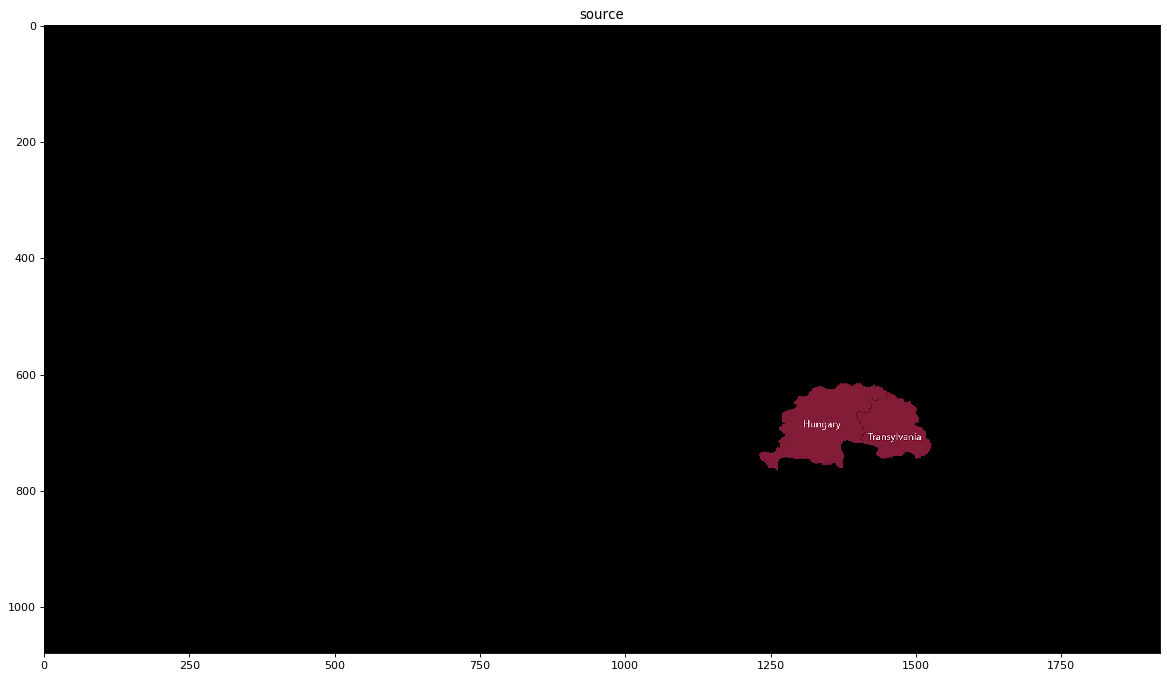

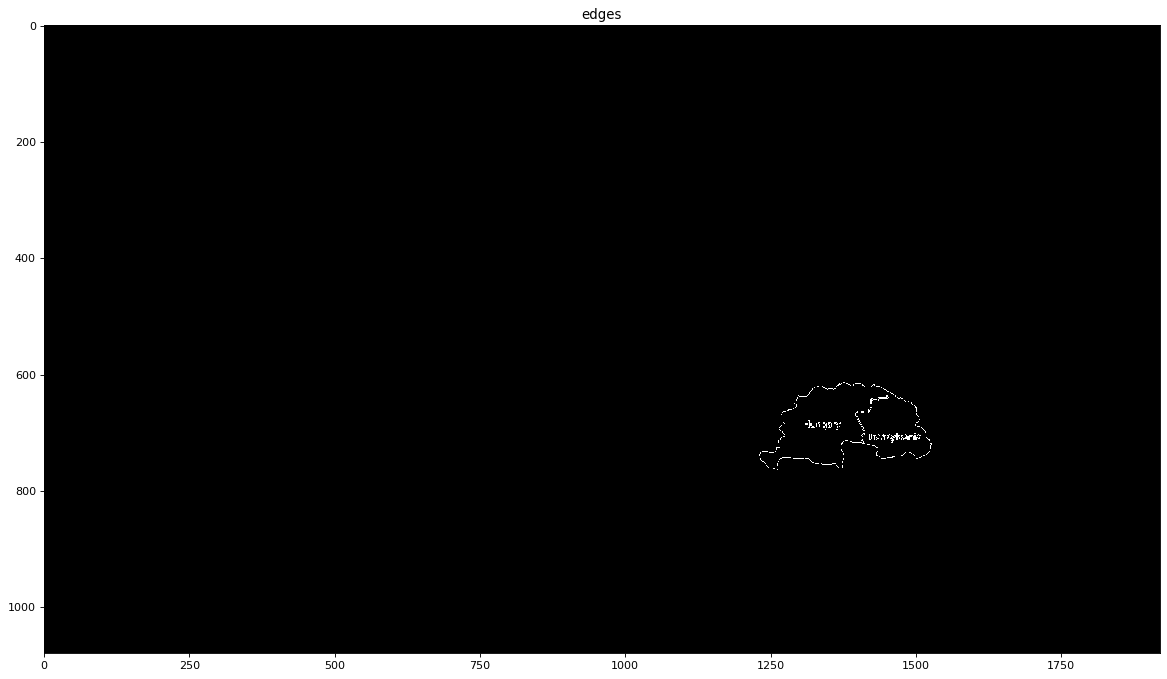

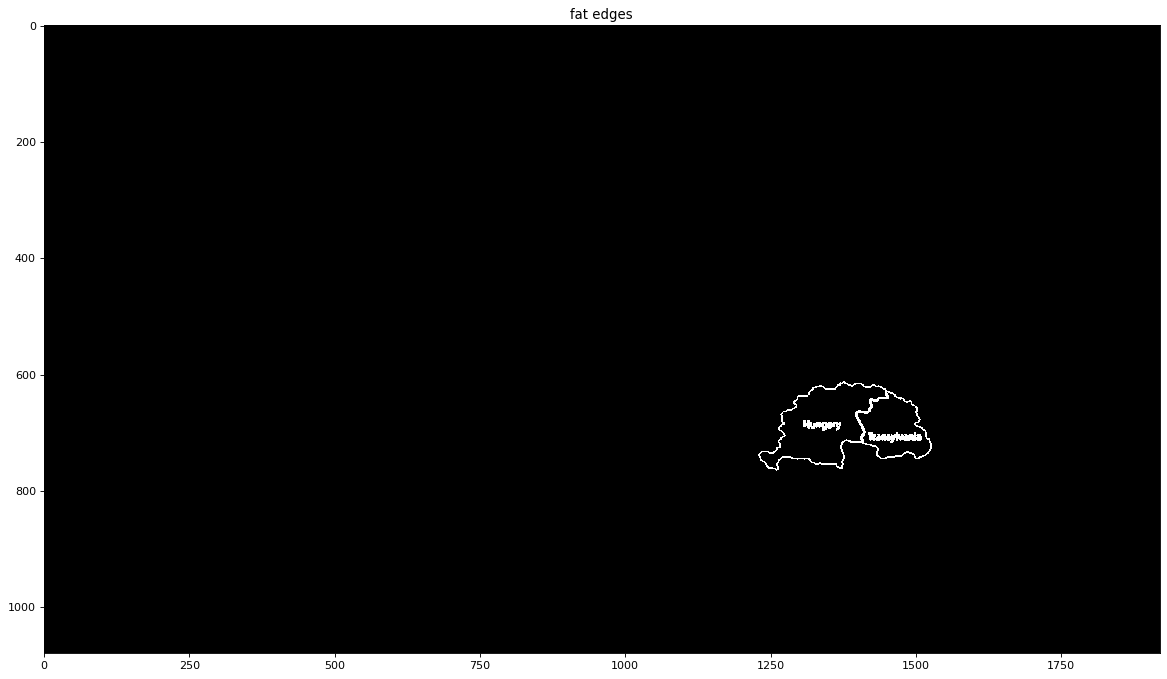


extract color and mask took 12.868448972702026
split territory took 28.16089105606079


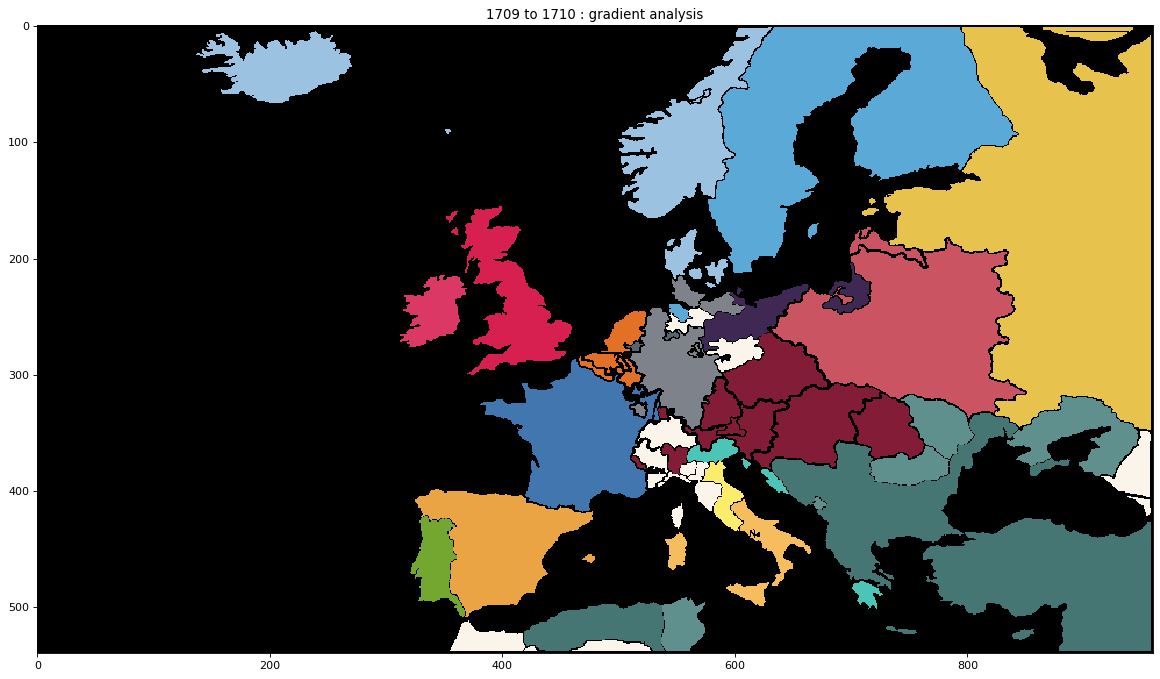

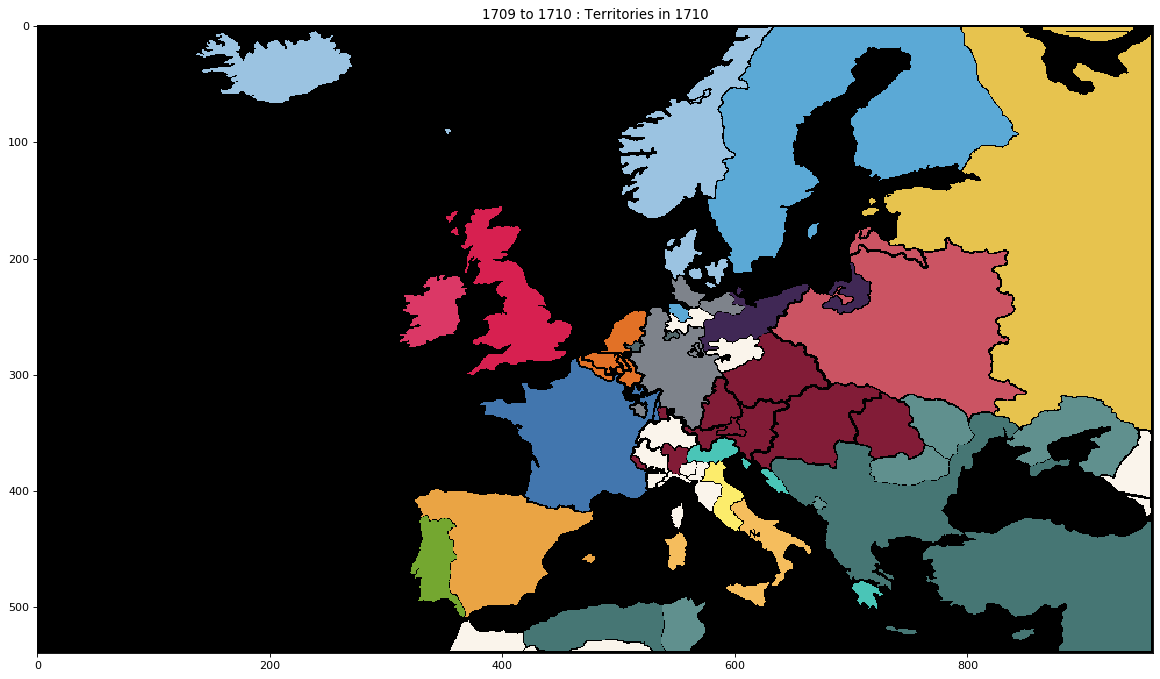

ignored 1 based on ignored_colors 


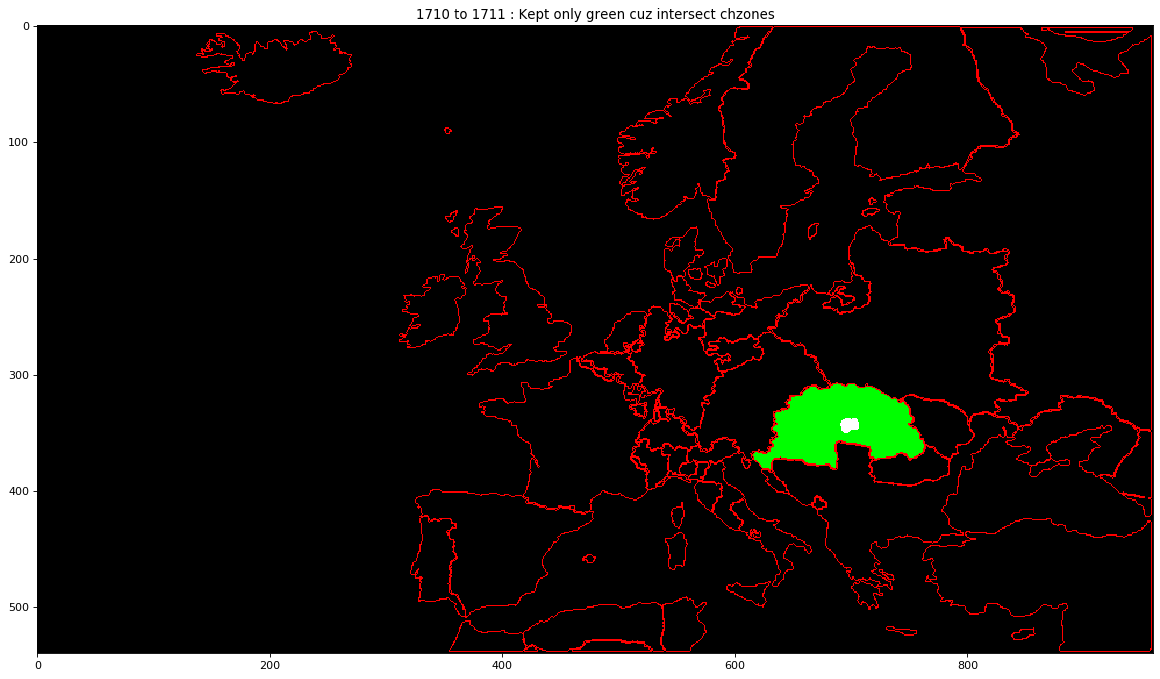


extract color and mask took 0.1840987205505371
split territory took 0.3806765079498291


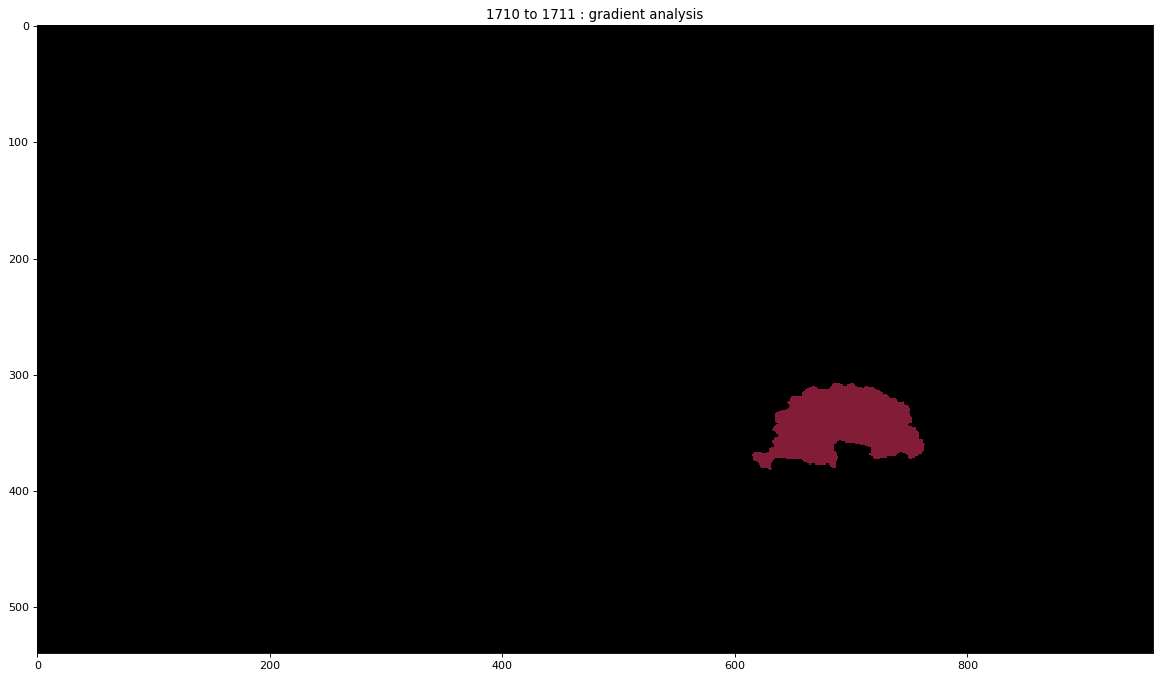

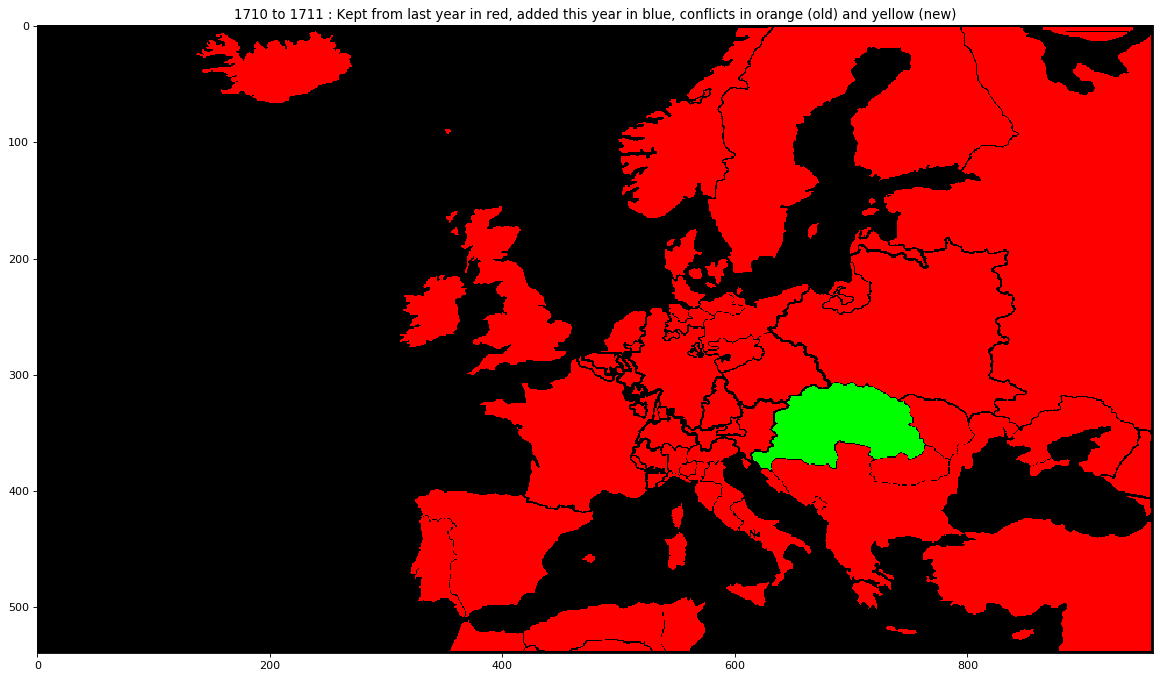

shape conflicts : (0,), len merged : 0


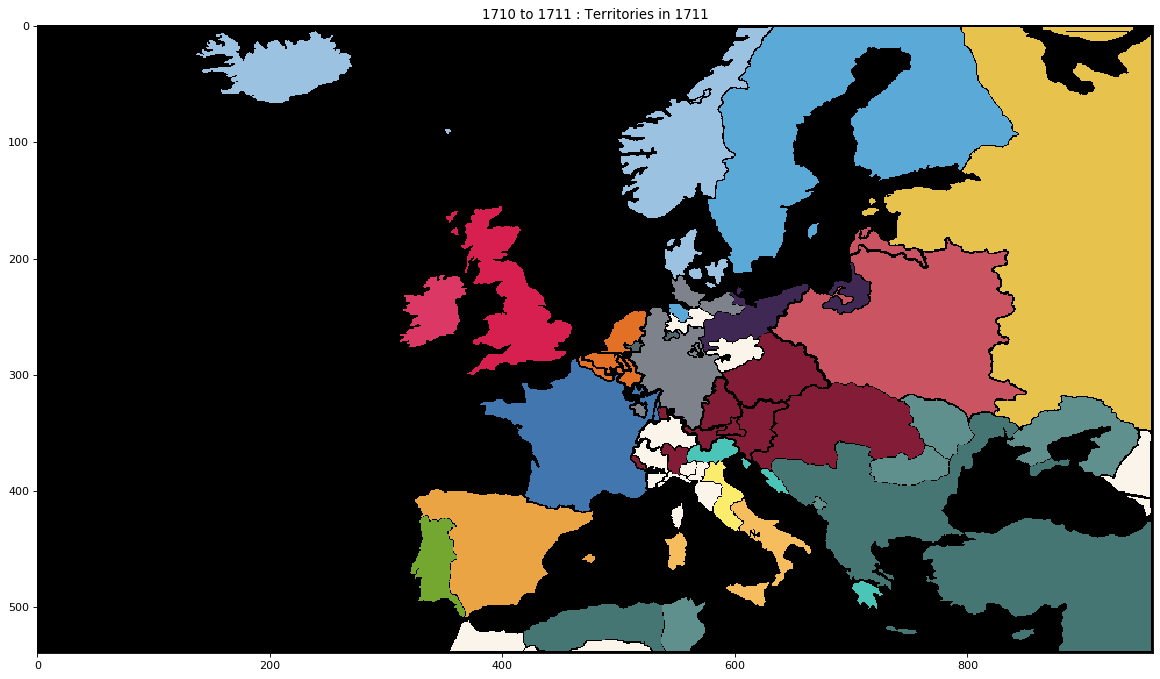

ignored 1 based on ignored_colors 


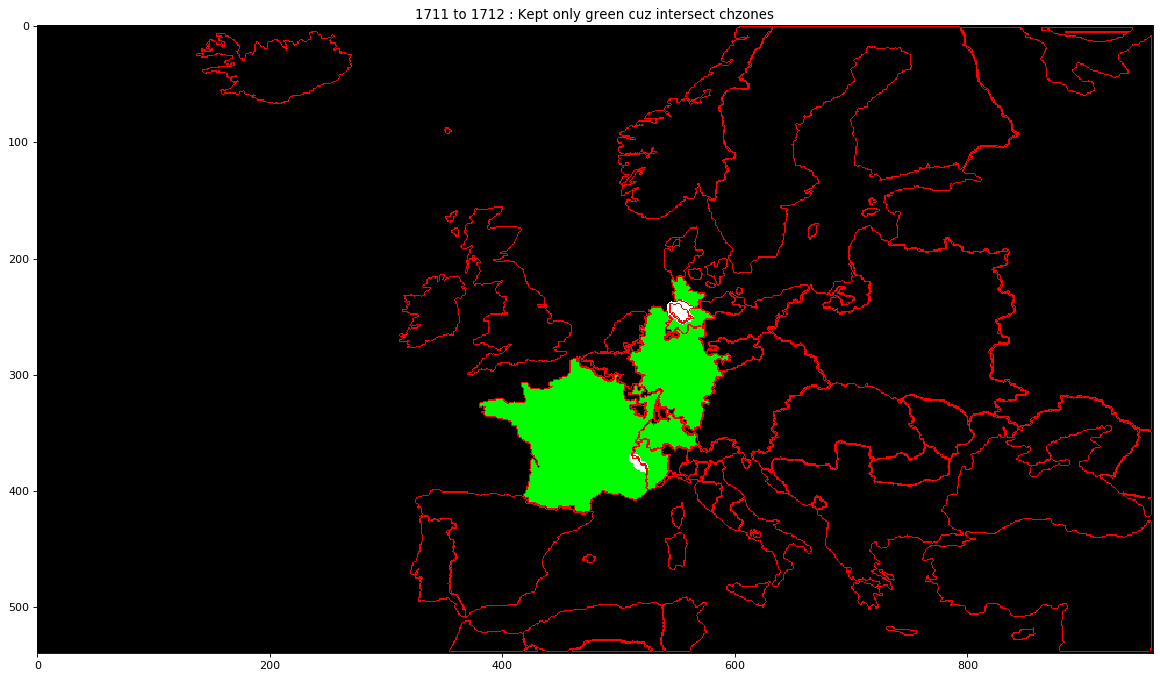


extract color and mask took 0.8050410747528076
split territory took 1.9584534168243408


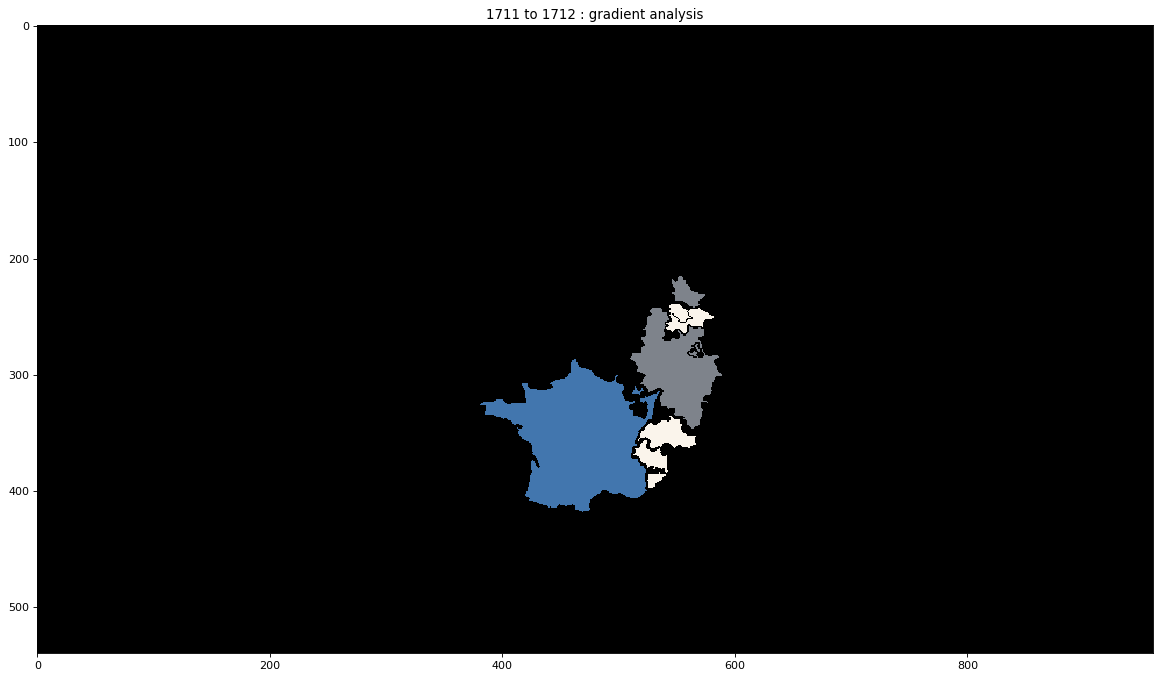

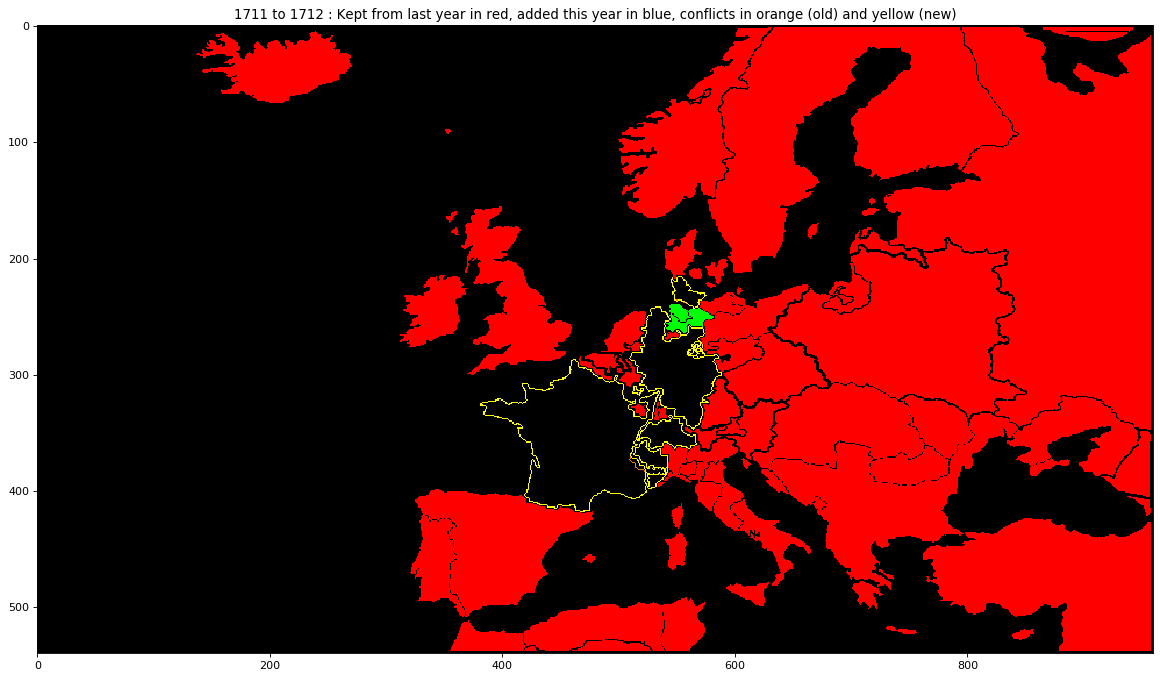

shape conflicts : (8, 2), len merged : 8


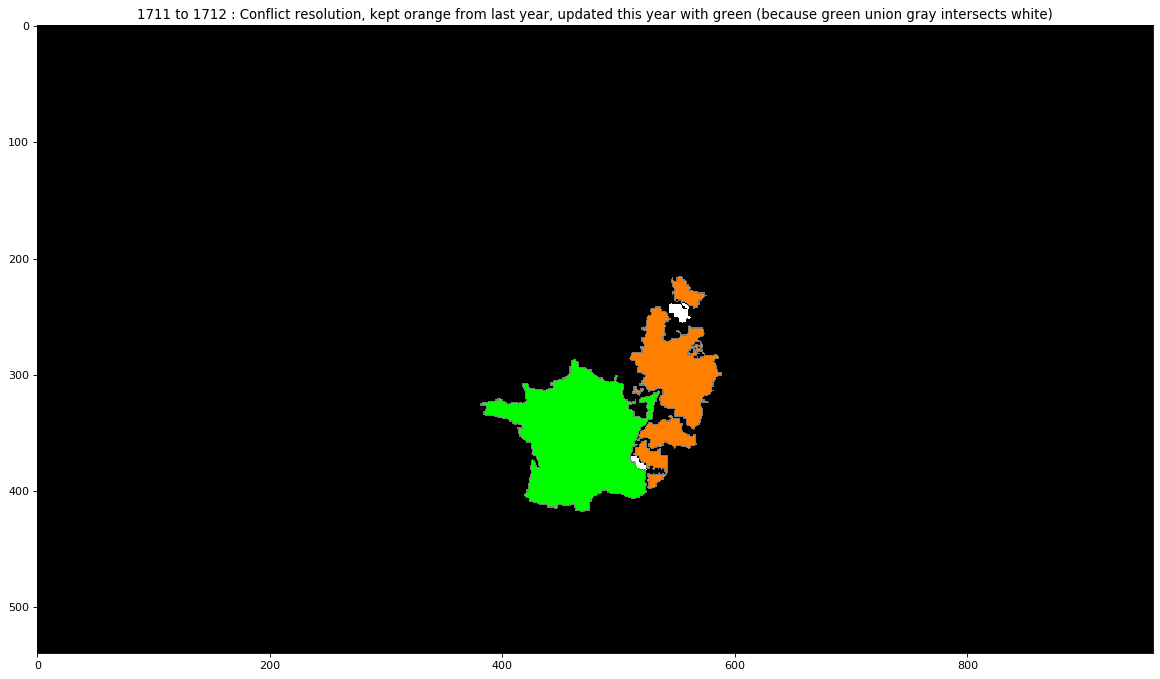

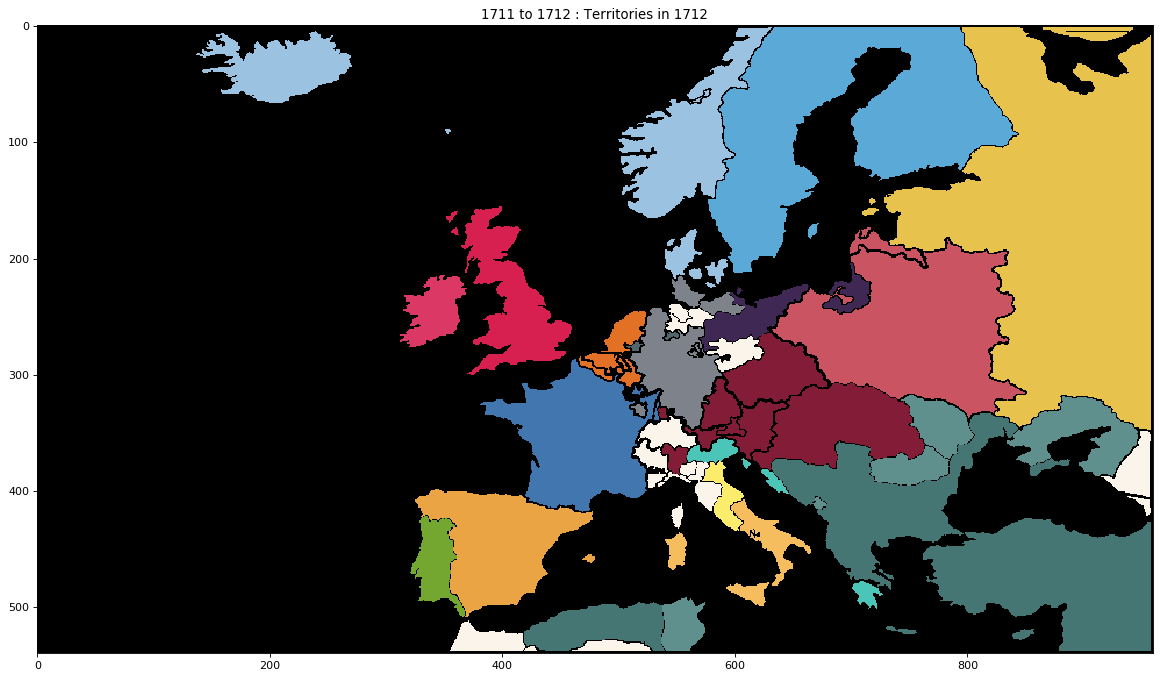

ignored 1 based on ignored_colors 


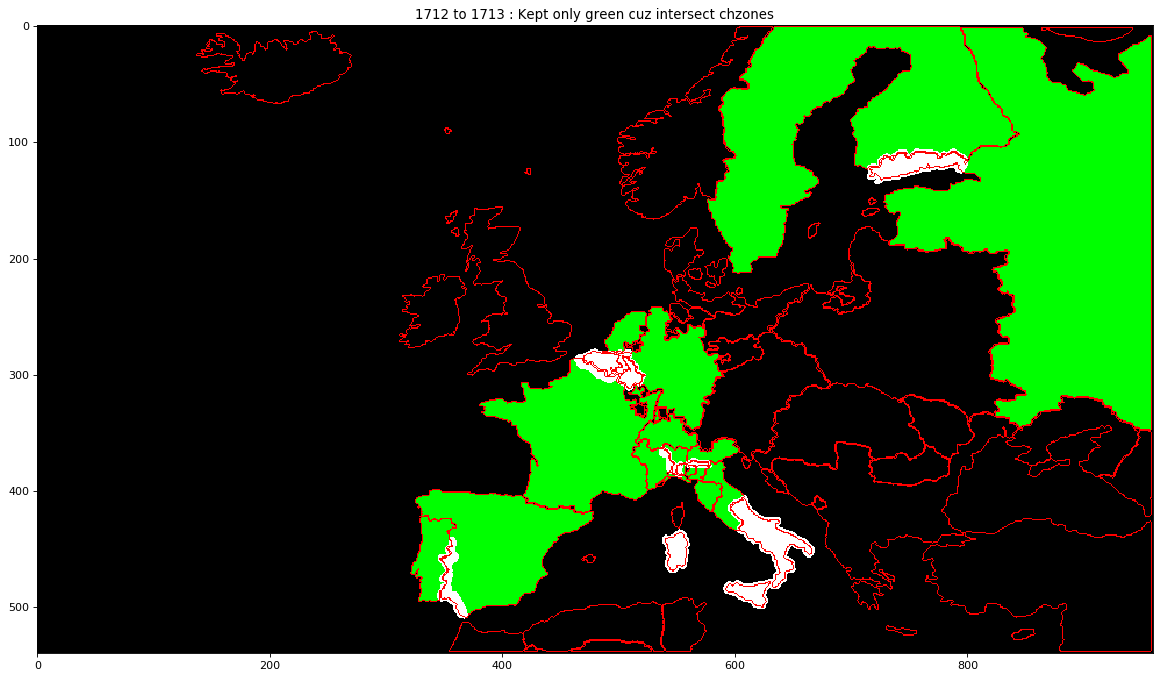


extract color and mask took 6.841198921203613
split territory took 7.090394735336304


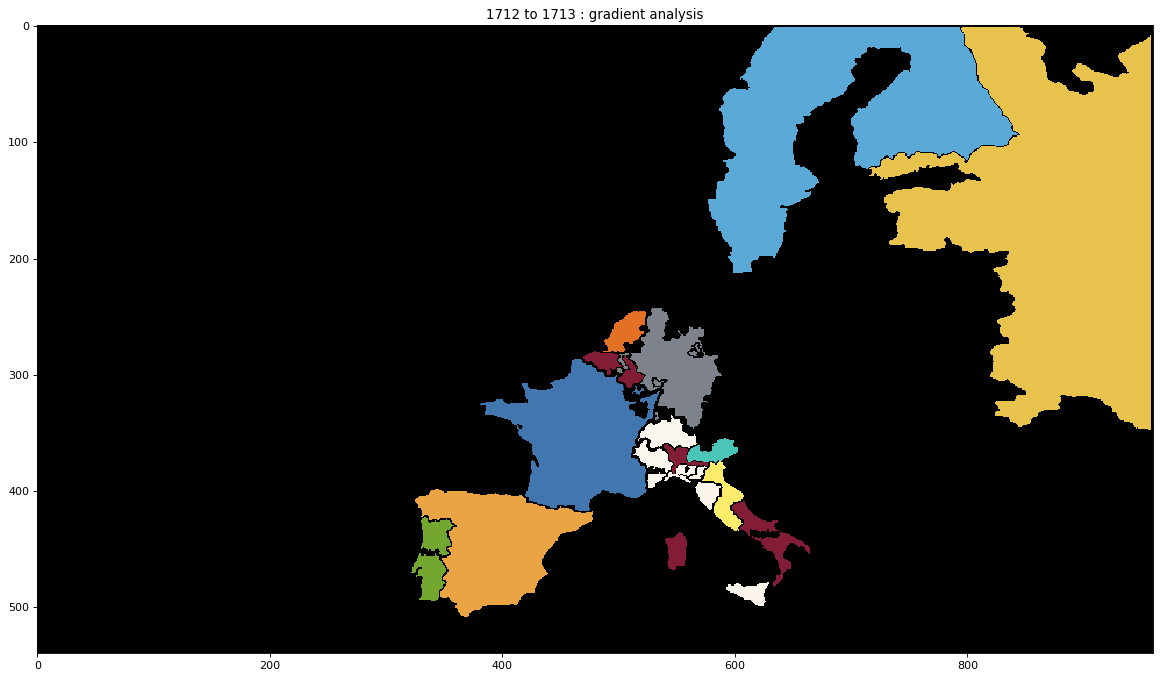

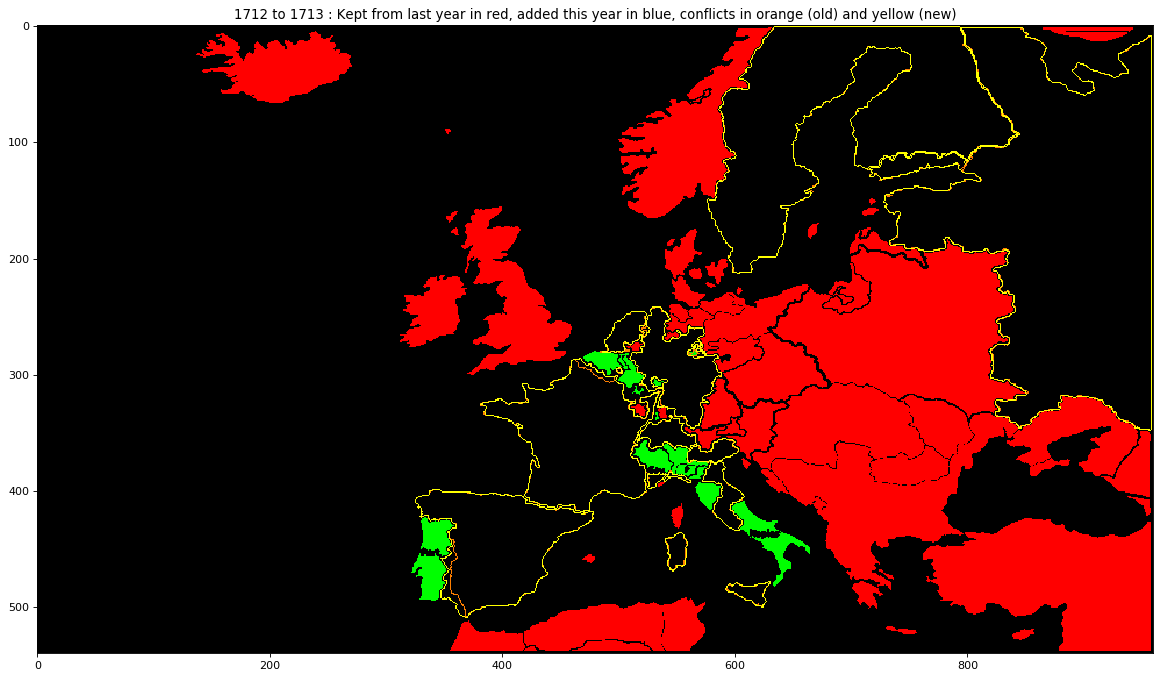

shape conflicts : (15, 2), len merged : 15


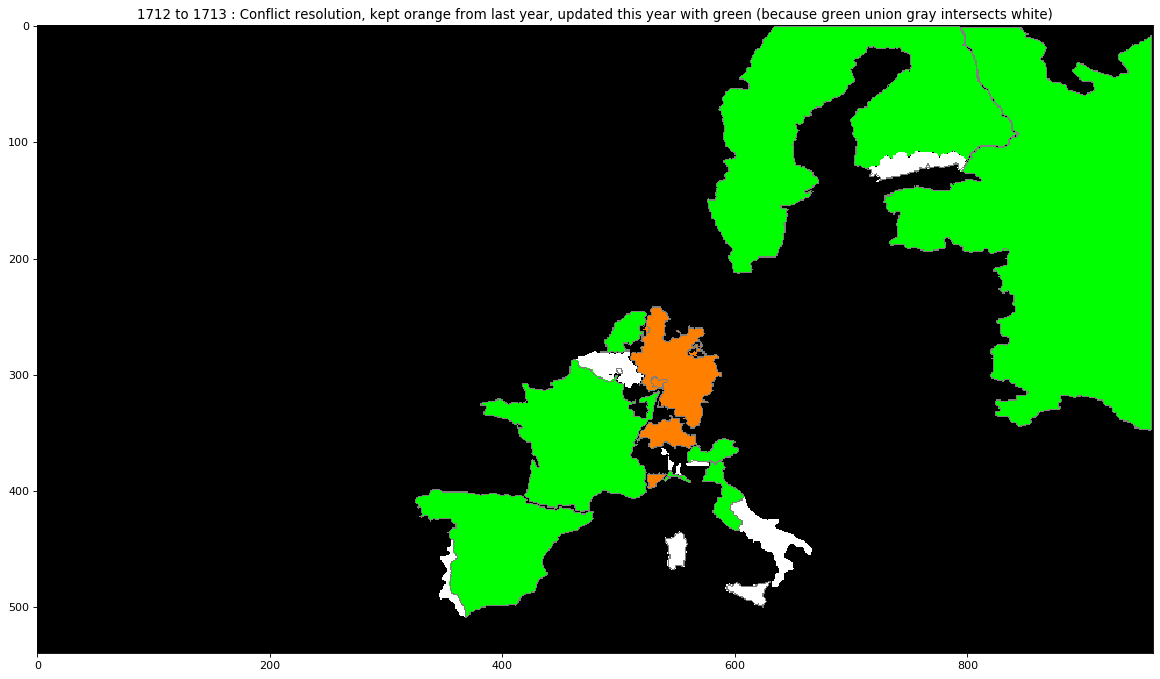

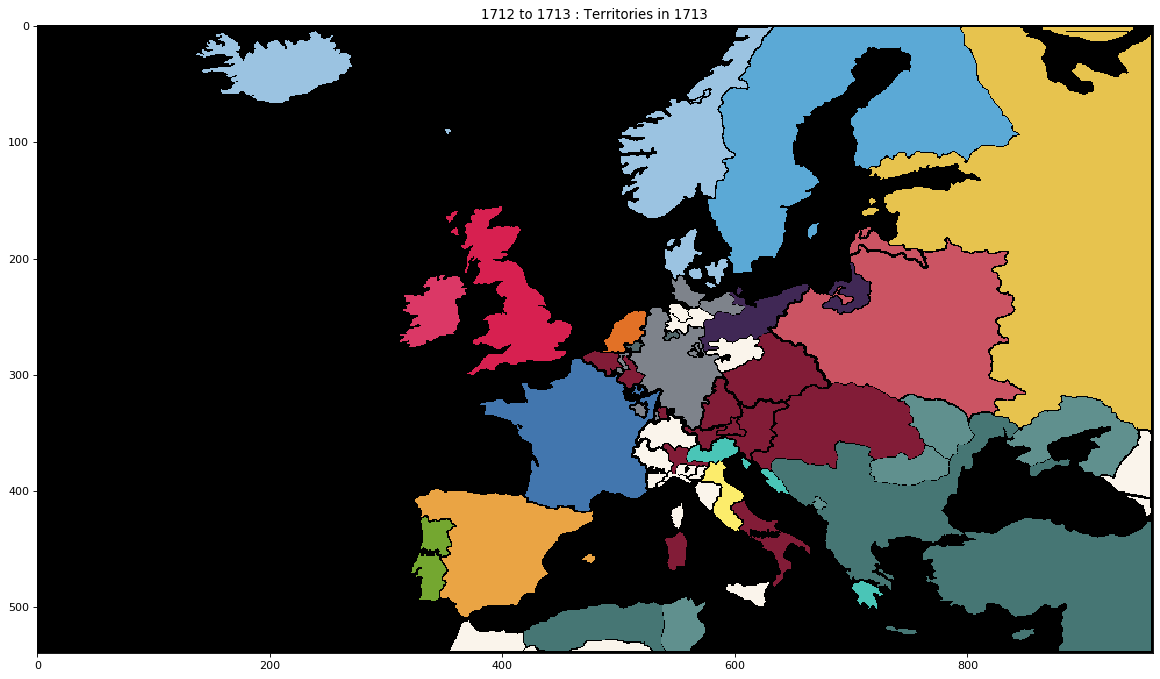

ignored 1 based on ignored_colors 


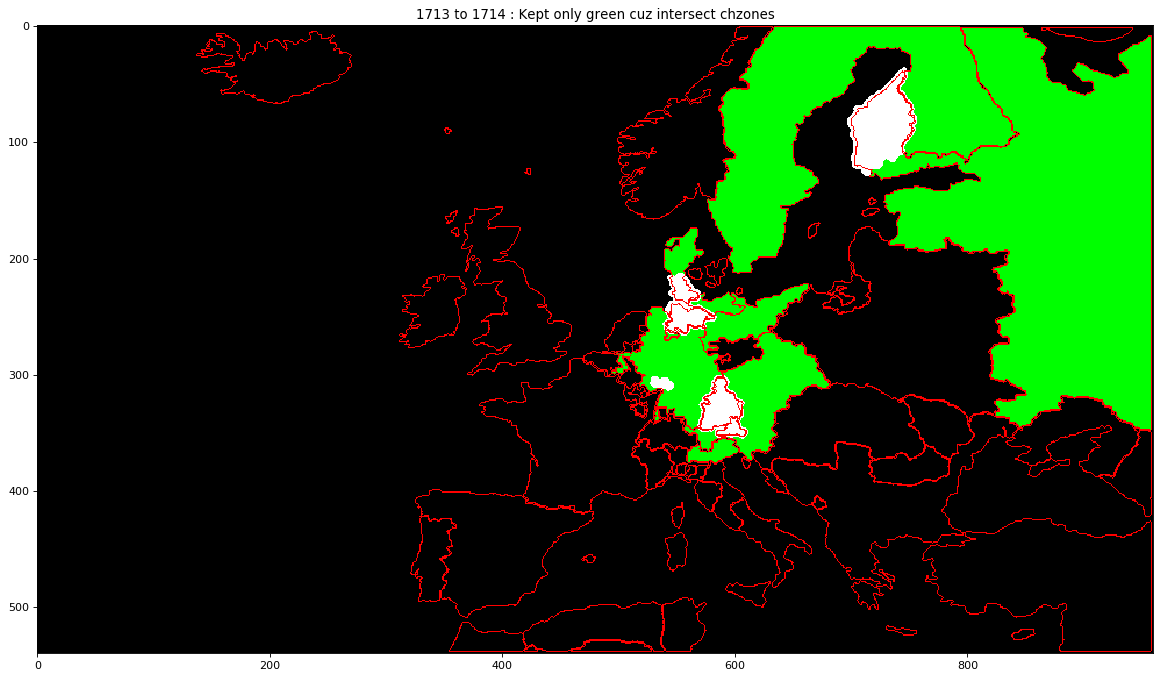


extract color and mask took 6.250834703445435
split territory took 4.512676477432251


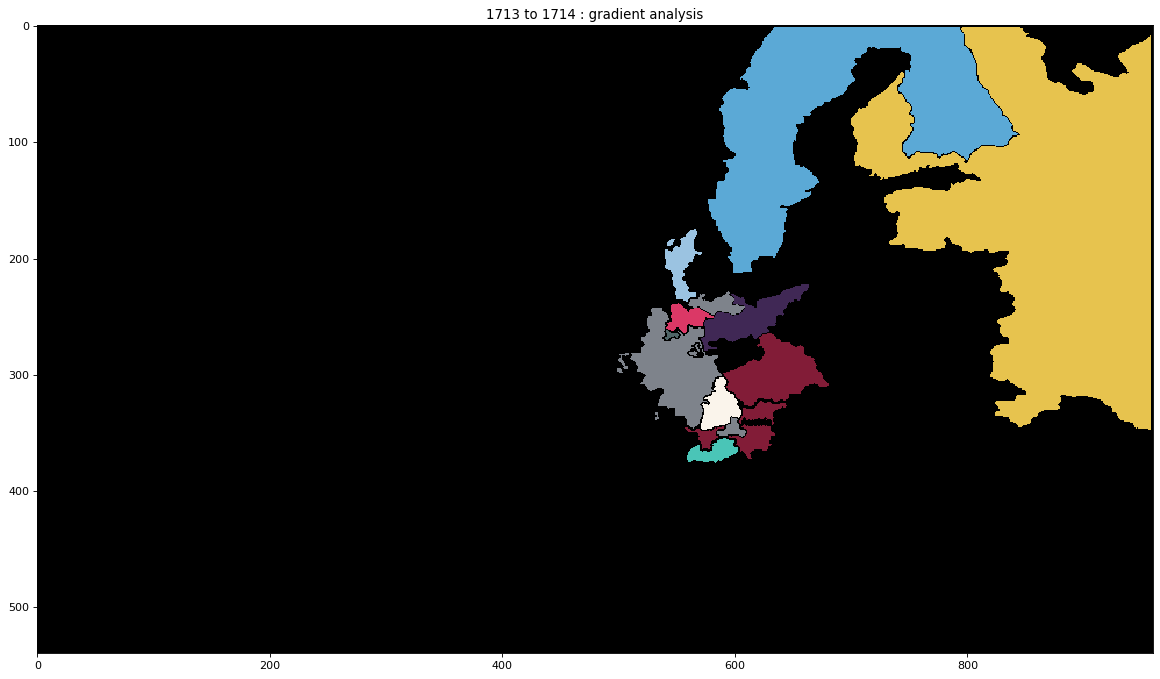

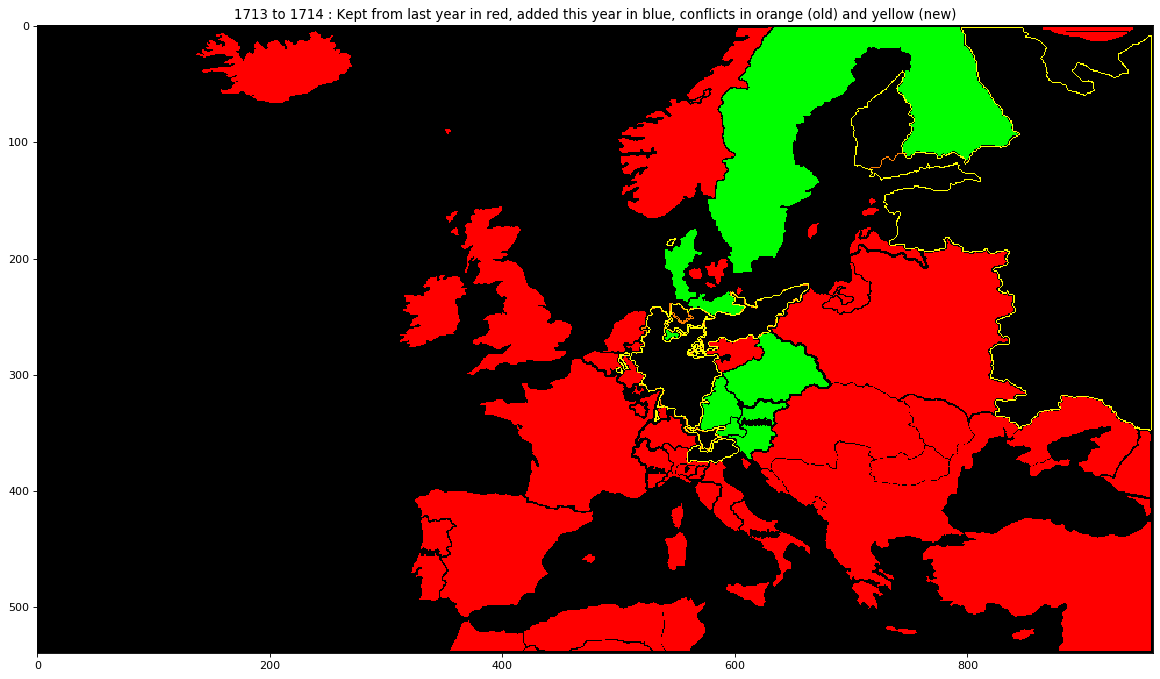

shape conflicts : (12, 2), len merged : 12


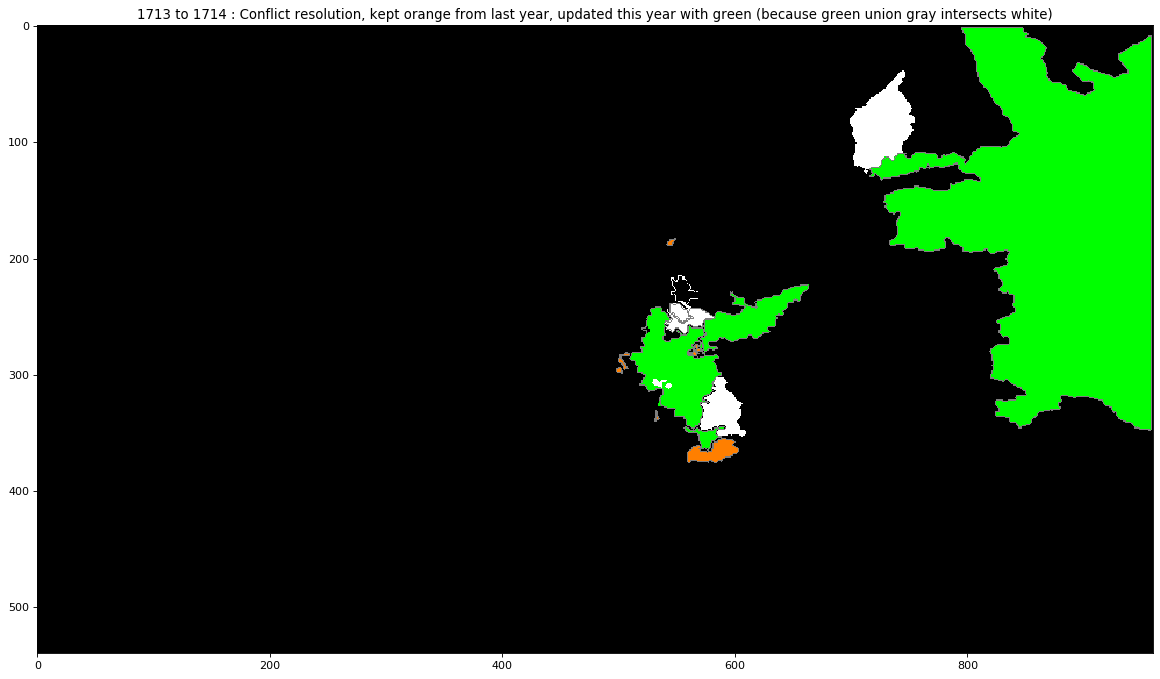

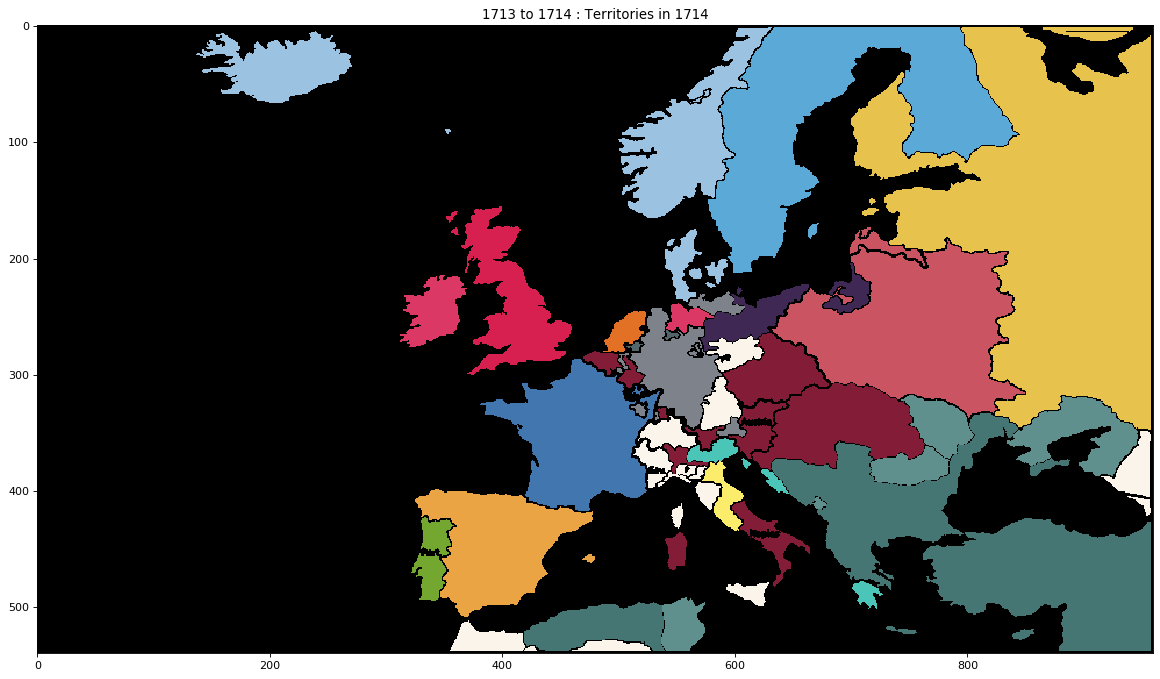

ignored 1 based on ignored_colors 


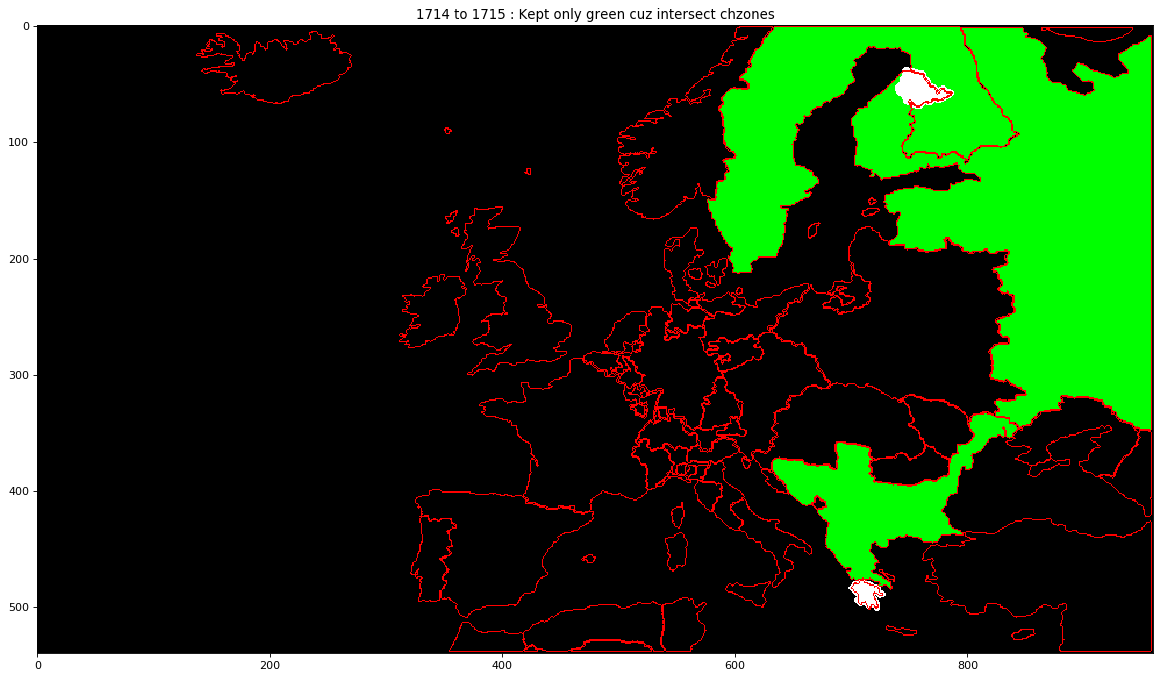


extract color and mask took 7.4728546142578125
split territory took 1.4792115688323975


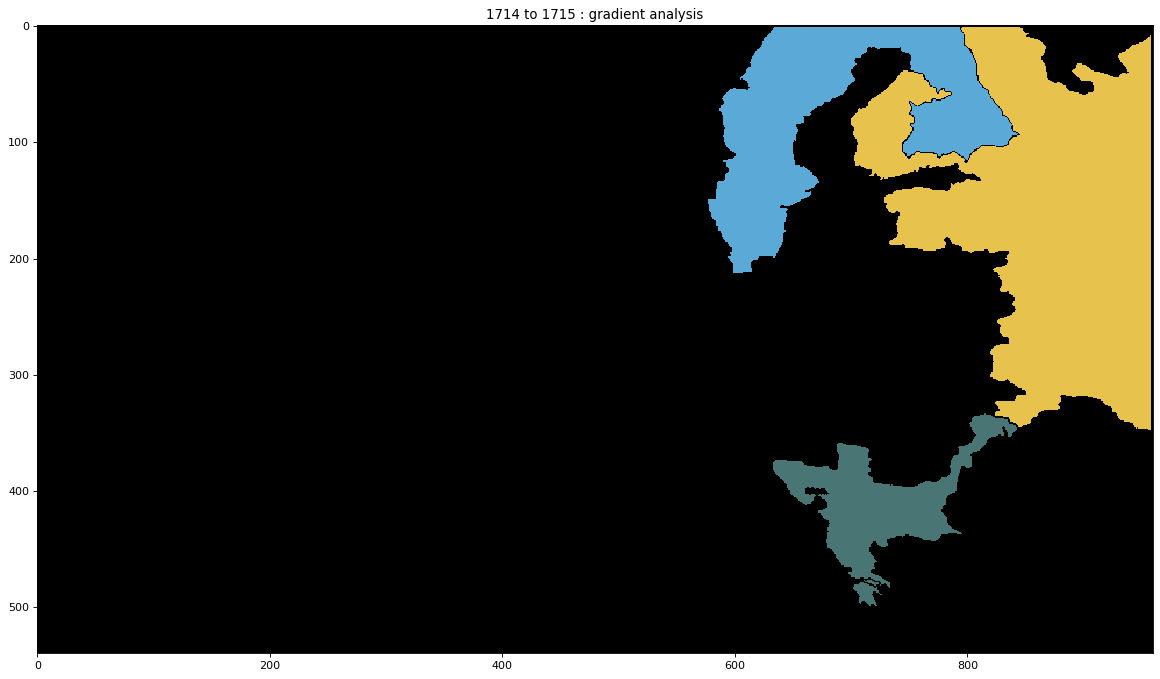

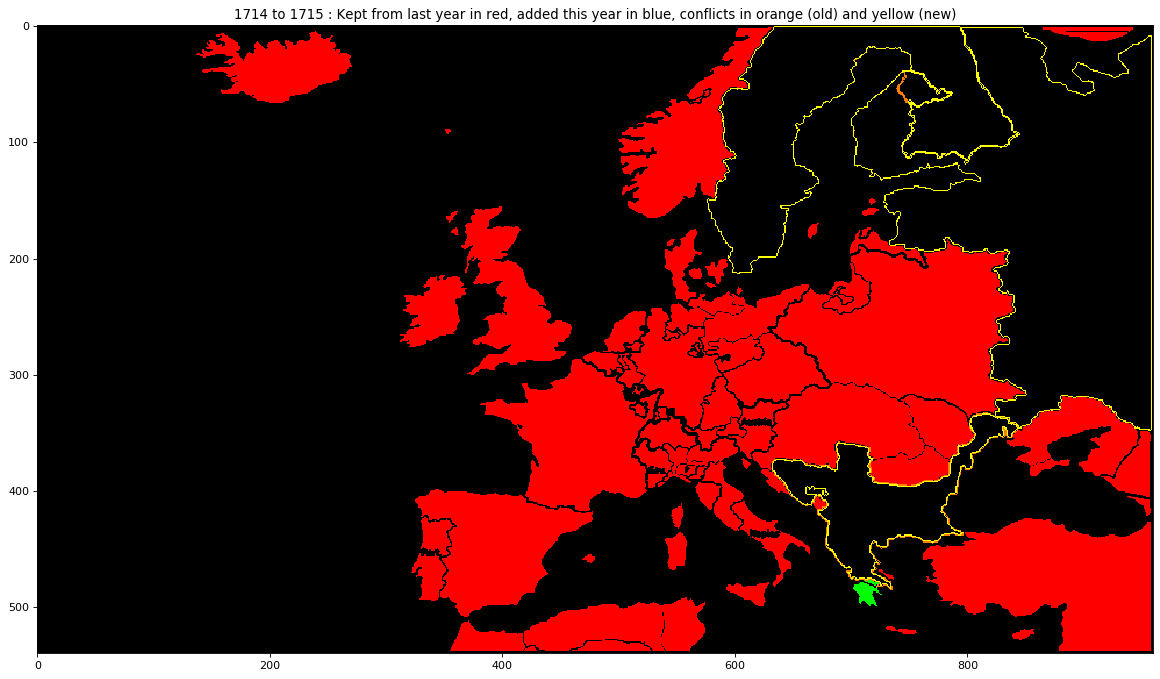

shape conflicts : (3, 2), len merged : 3


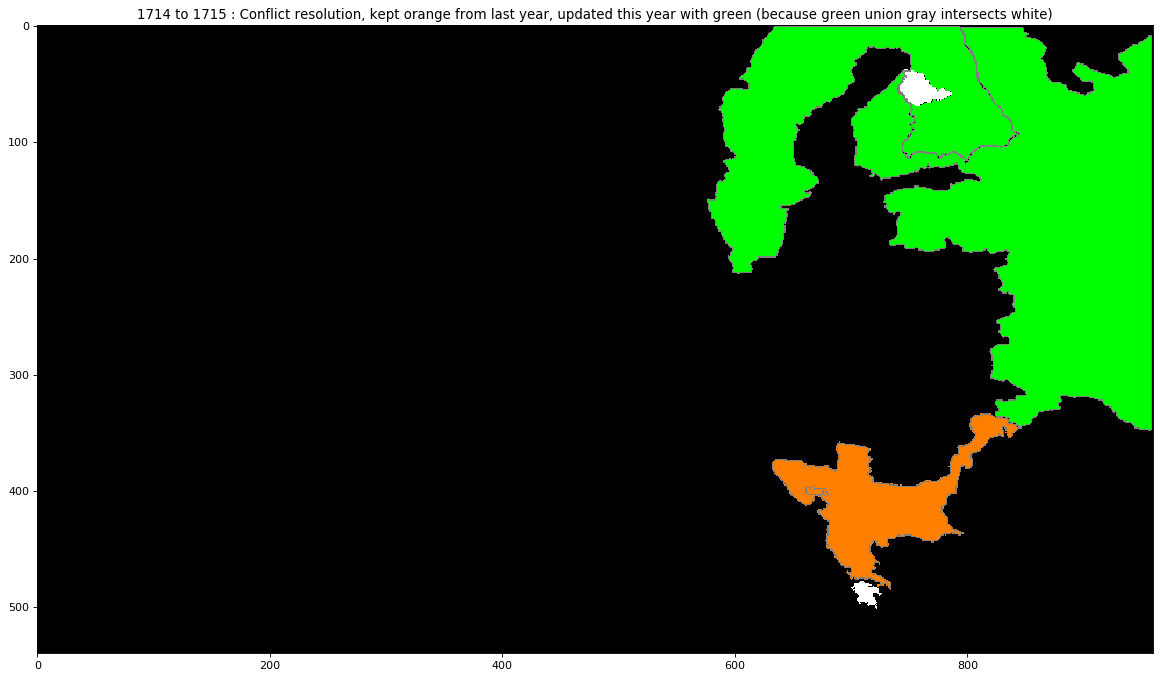

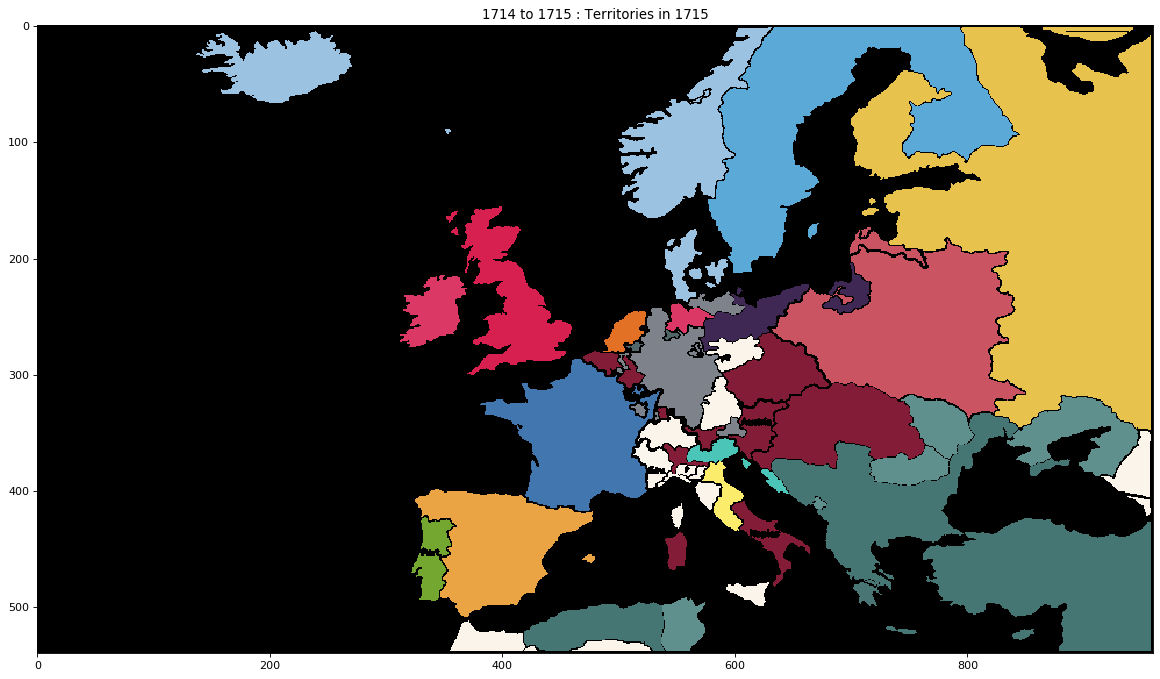

ignored 1 based on ignored_colors 


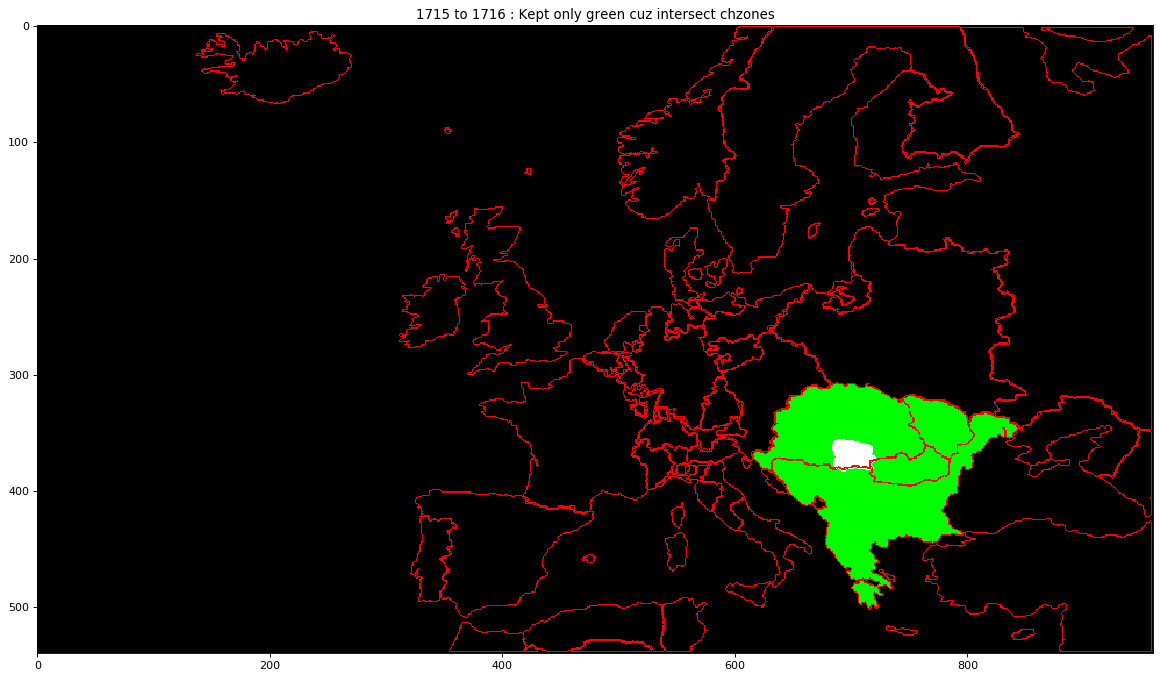


extract color and mask took 1.1309173107147217
split territory took 1.268378496170044


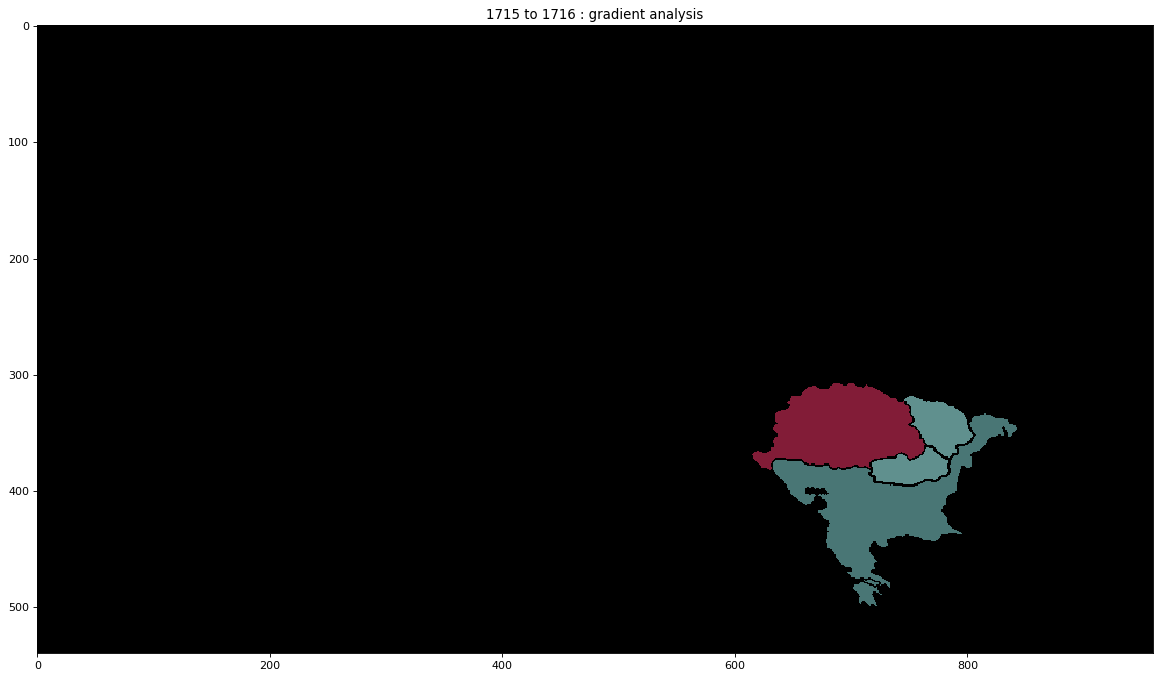

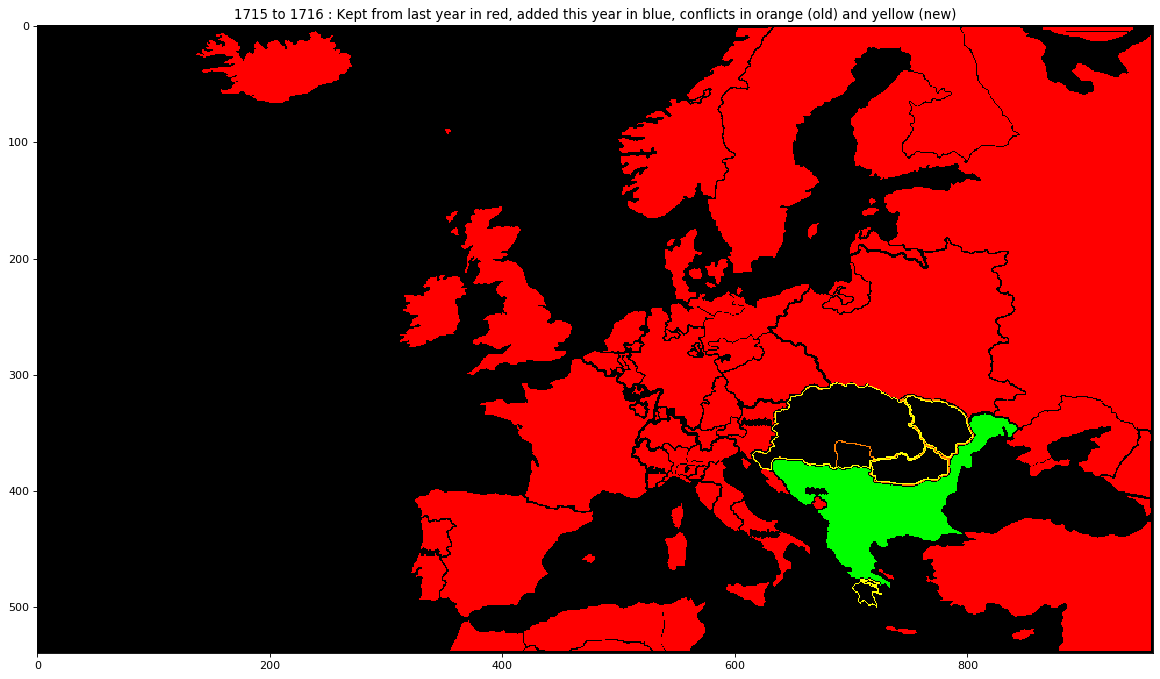

shape conflicts : (5, 2), len merged : 5


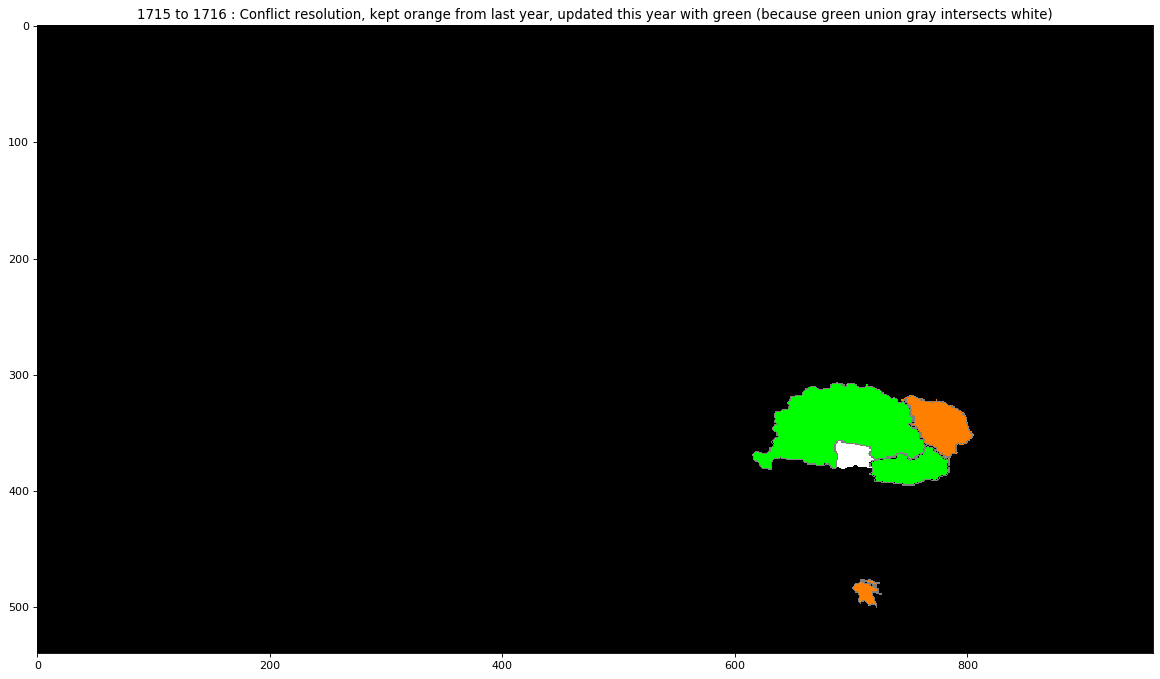

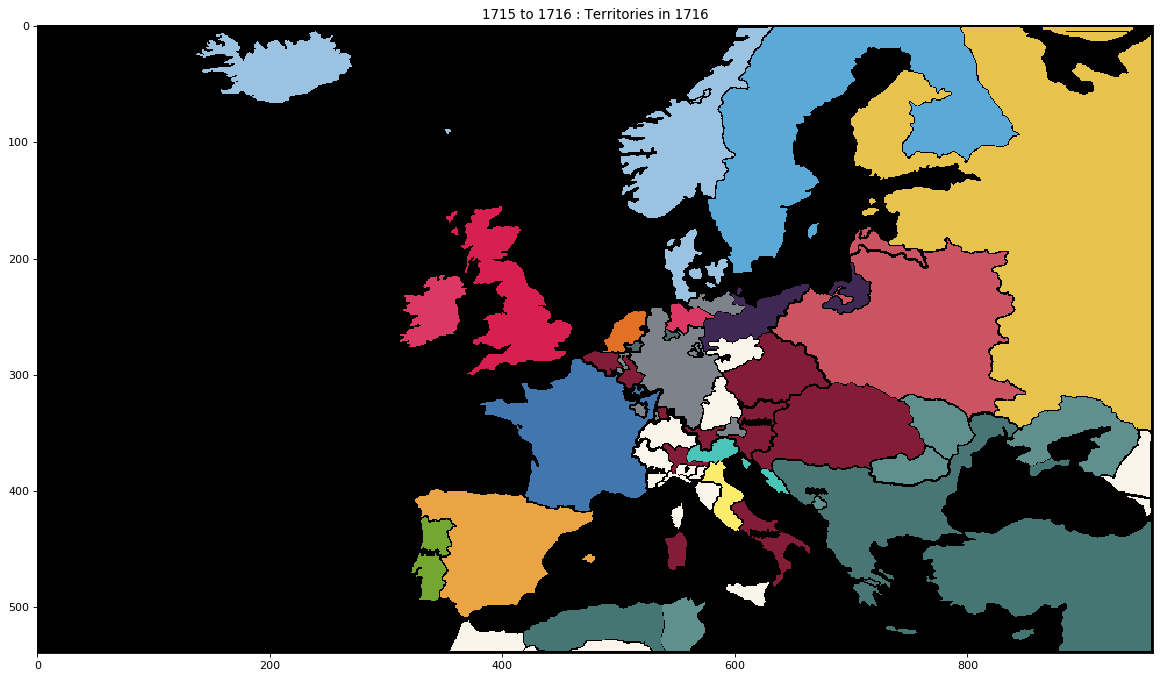

ignored 1 based on ignored_colors 


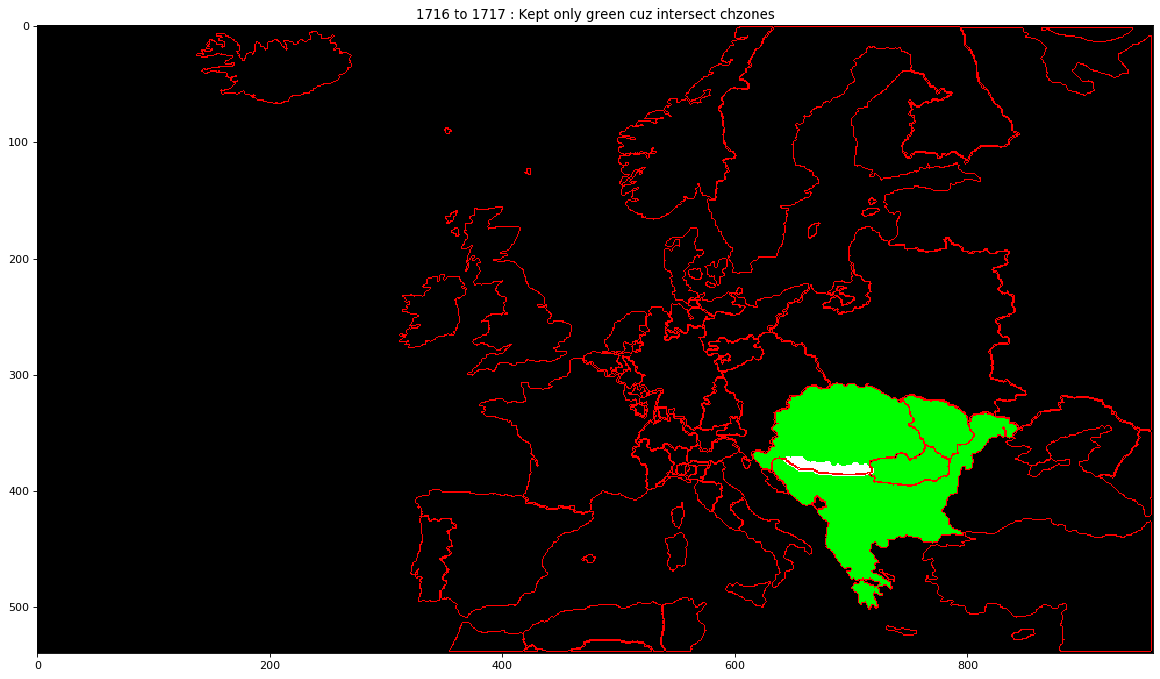


extract color and mask took 1.1393201351165771
split territory took 1.1510508060455322


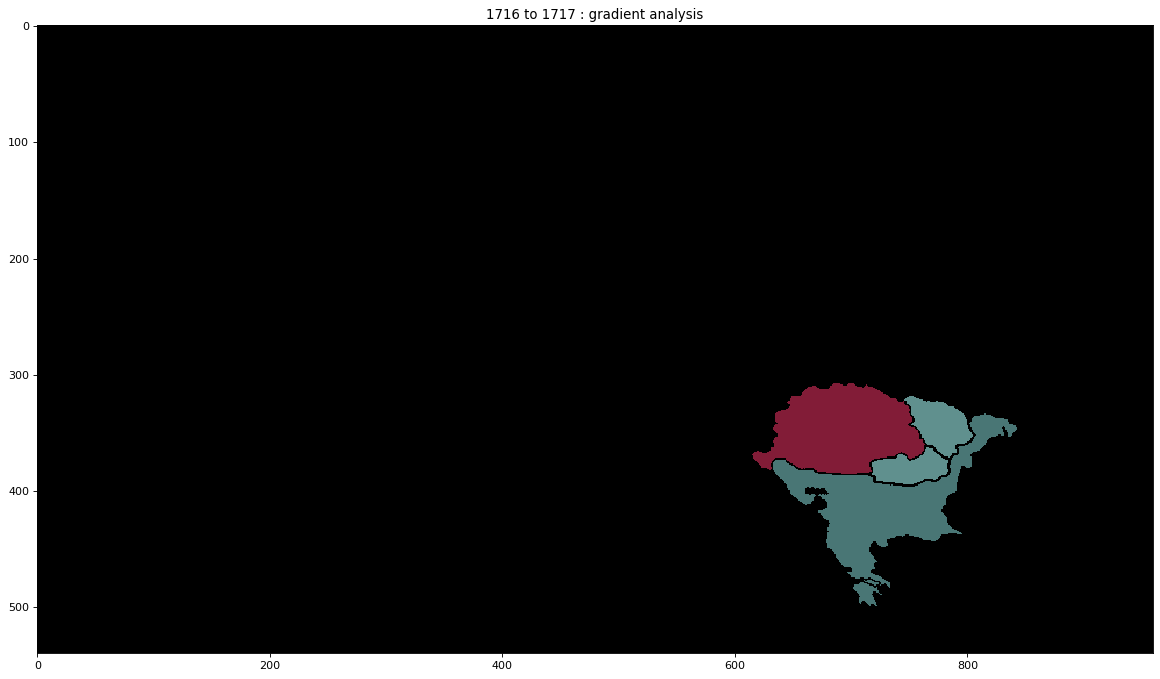

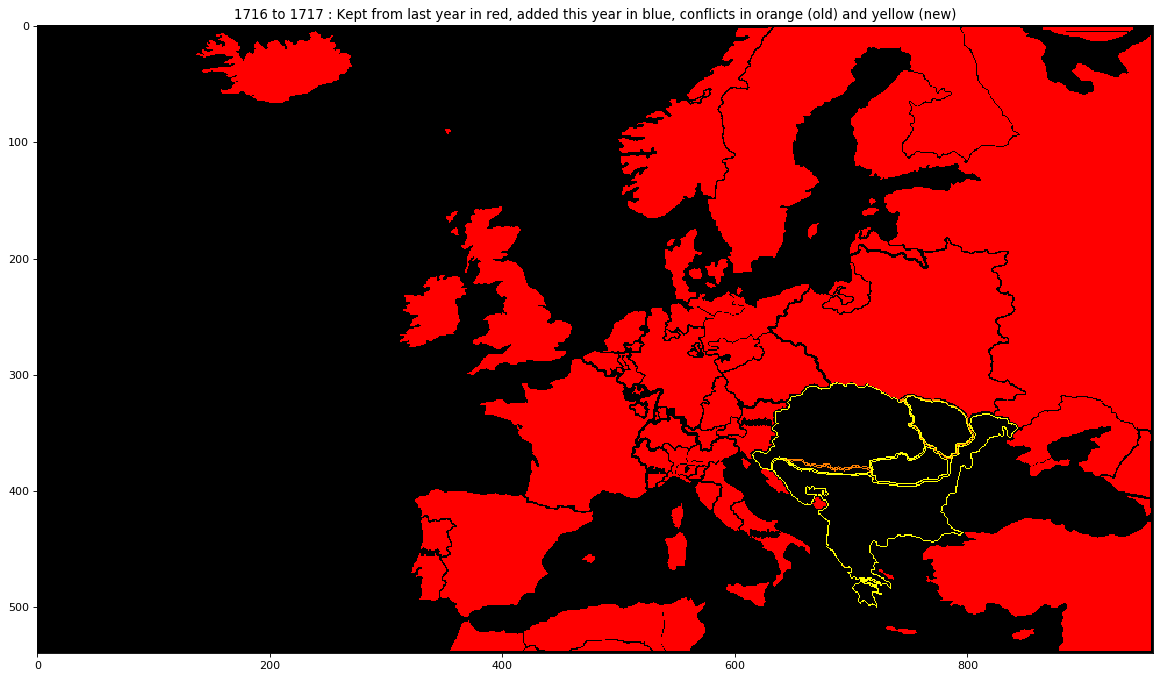

shape conflicts : (6, 2), len merged : 6


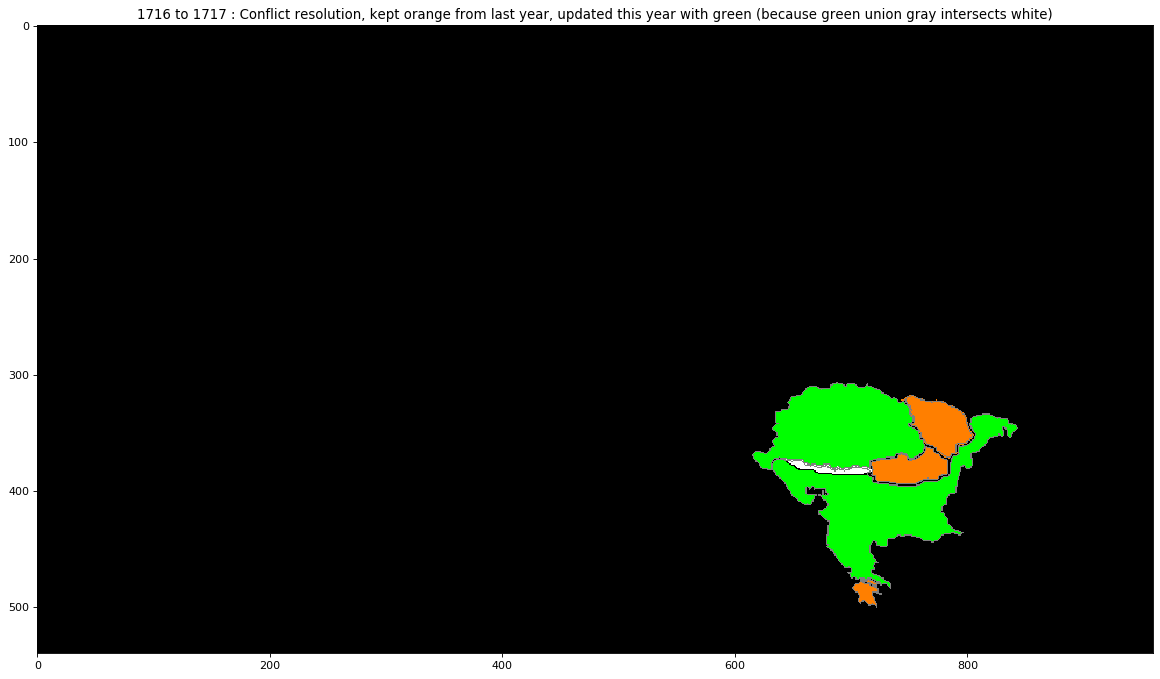

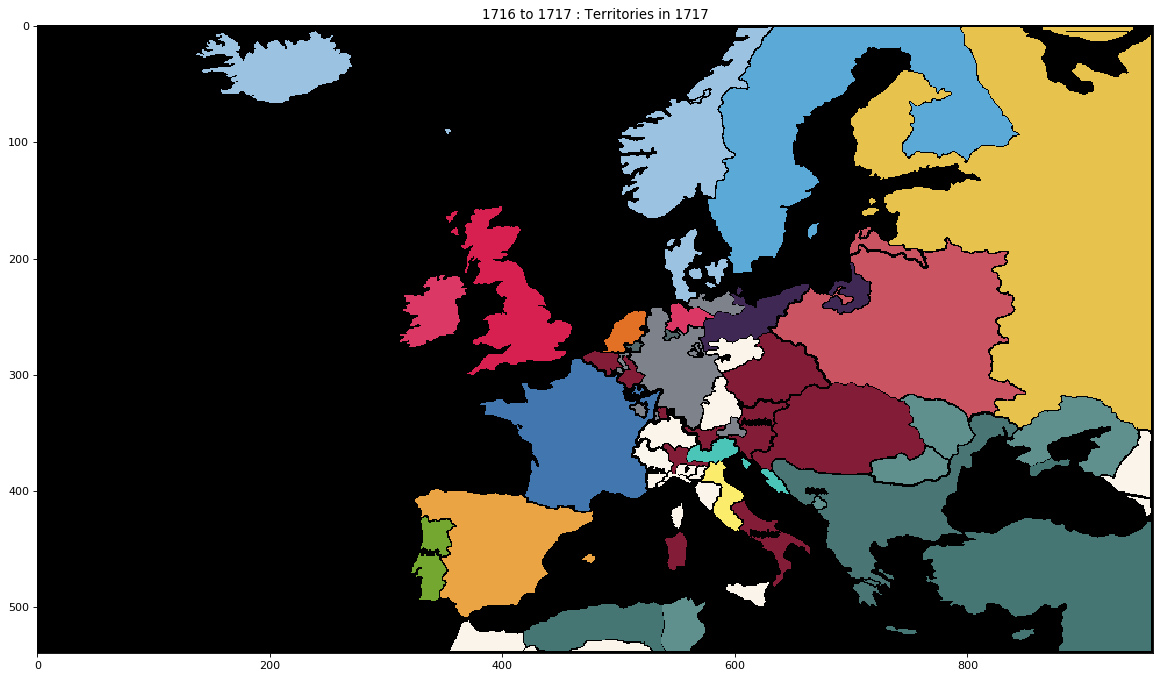

ignored 1 based on ignored_colors 


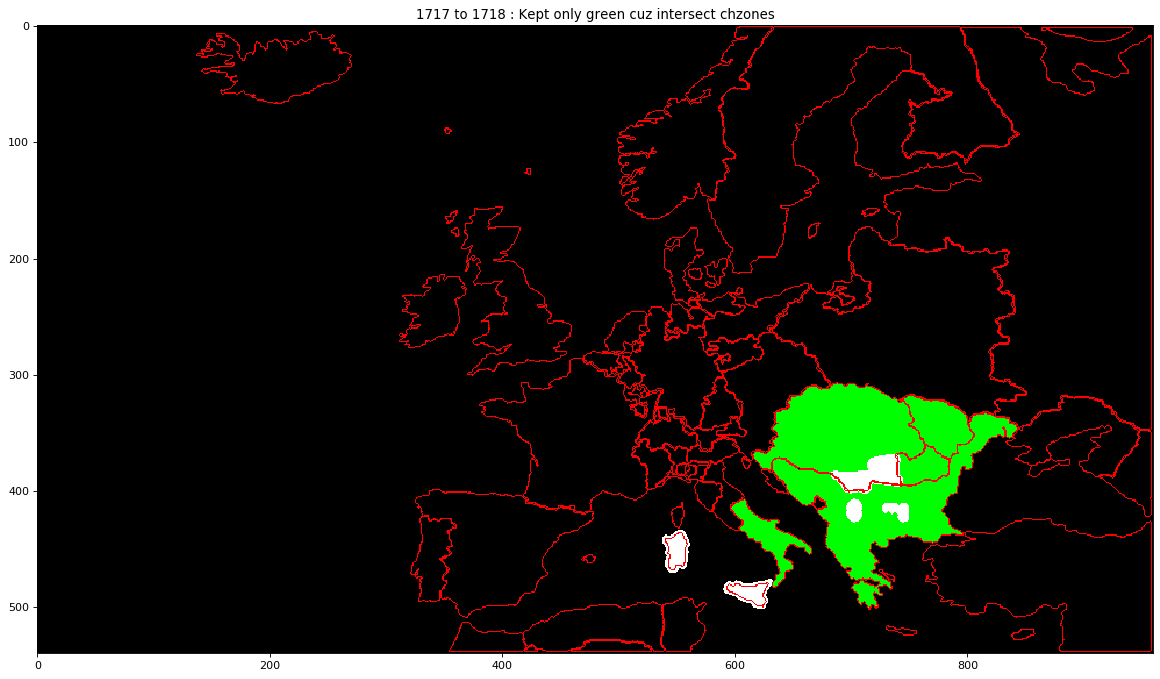


extract color and mask took 1.3437201976776123
split territory took 2.328334331512451


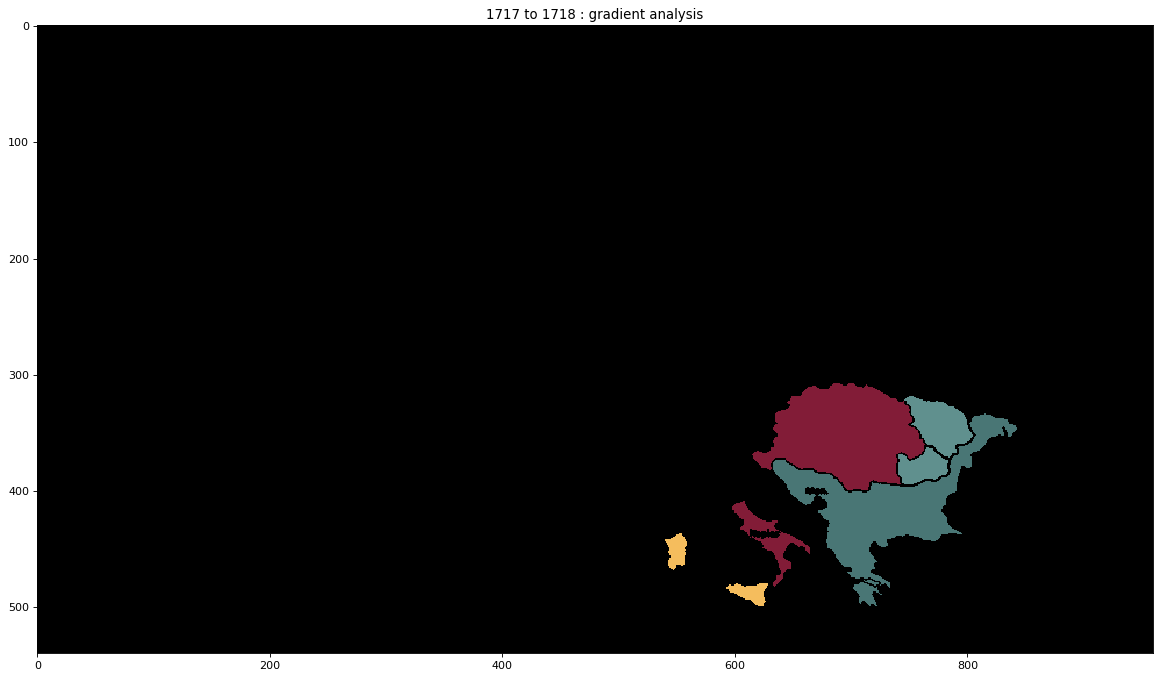

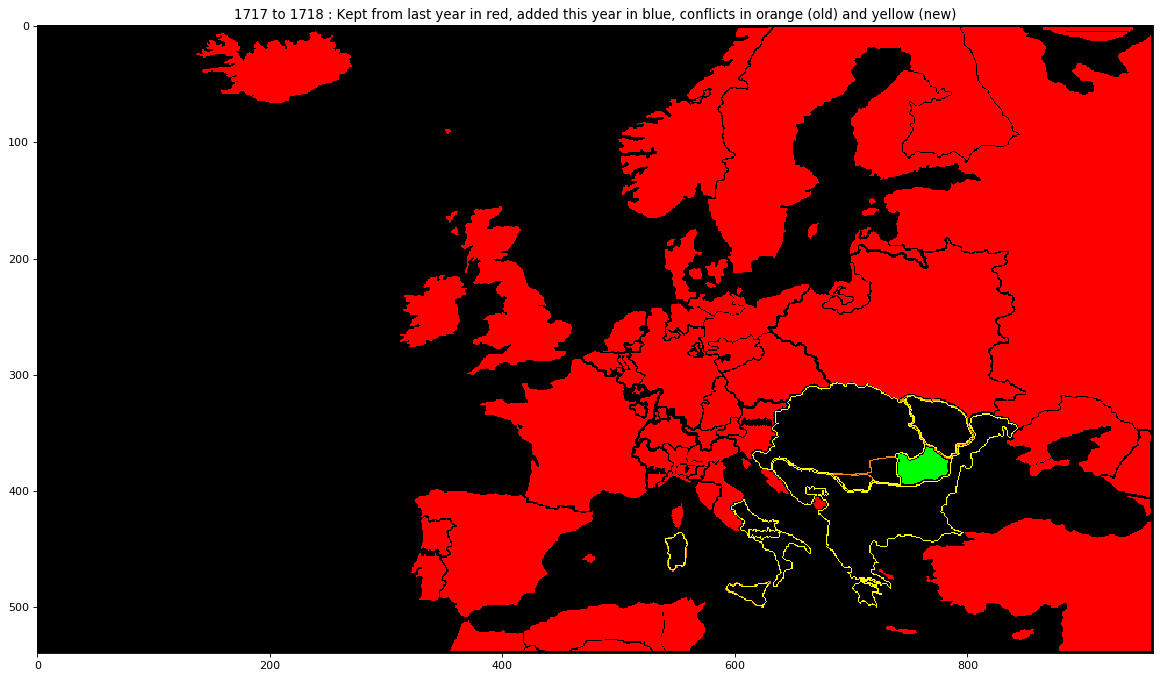

shape conflicts : (9, 2), len merged : 9


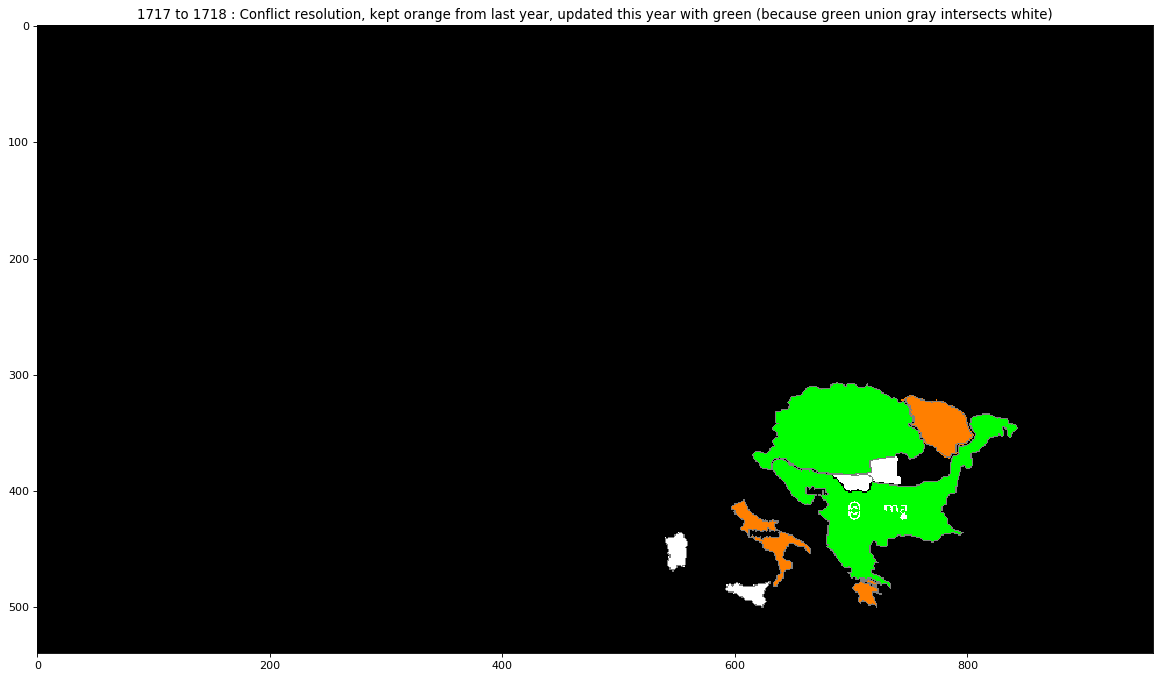

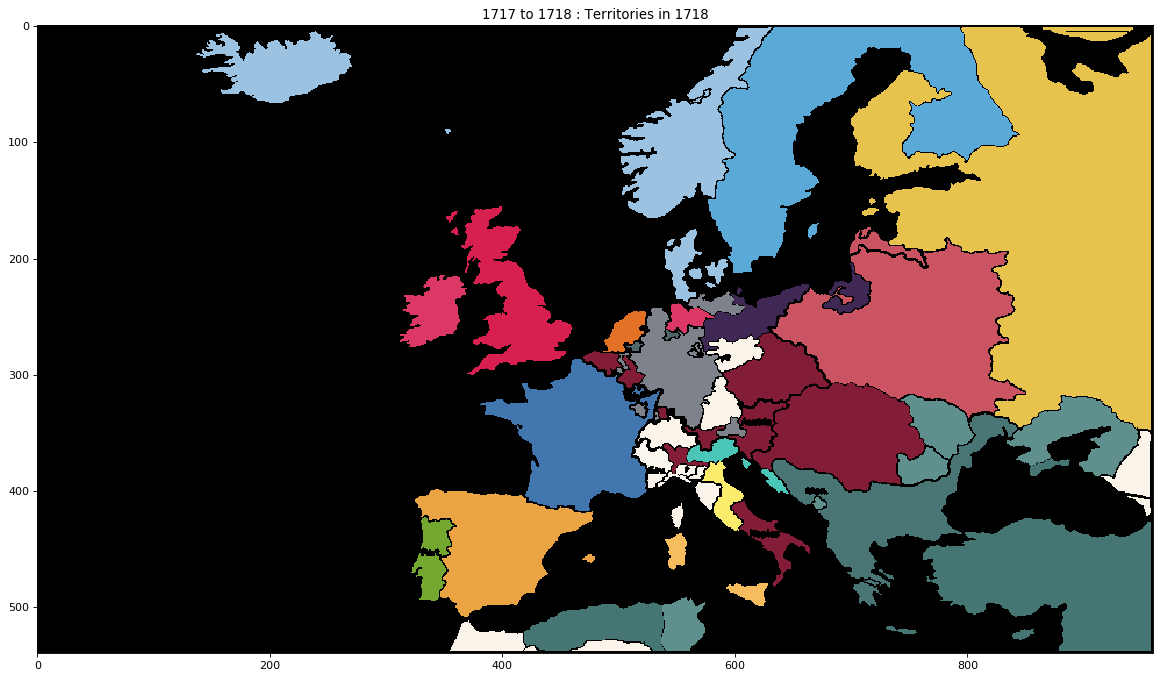

ignored 1 based on ignored_colors 


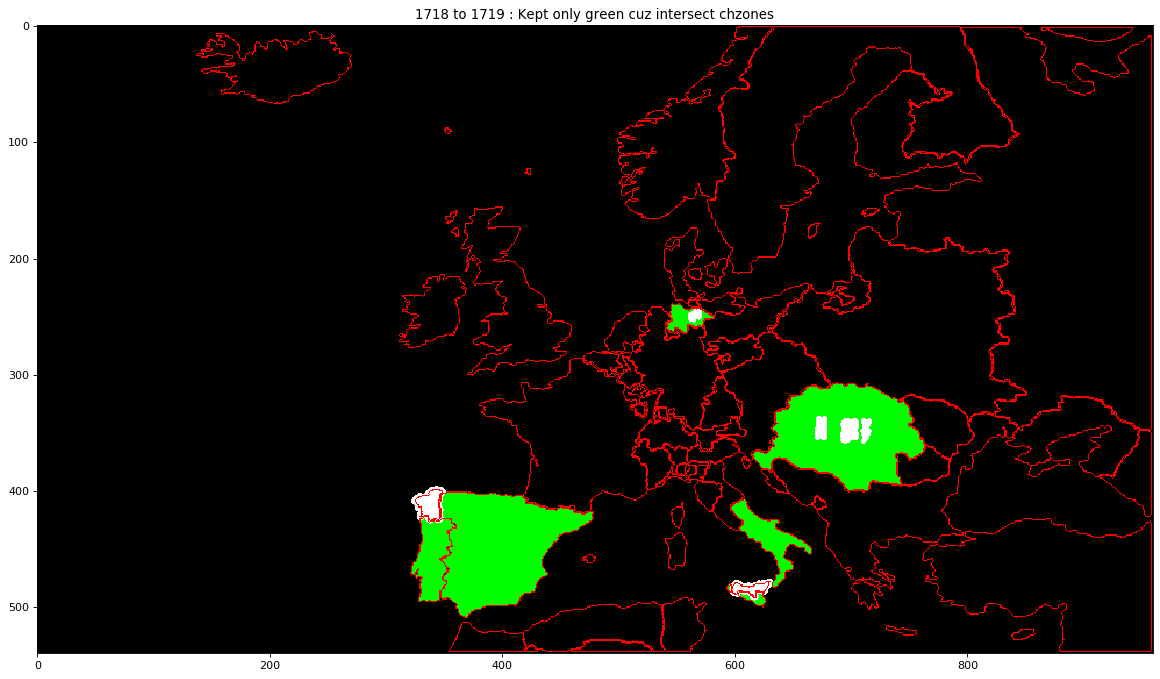


extract color and mask took 0.9103922843933105
split territory took 3.2713472843170166


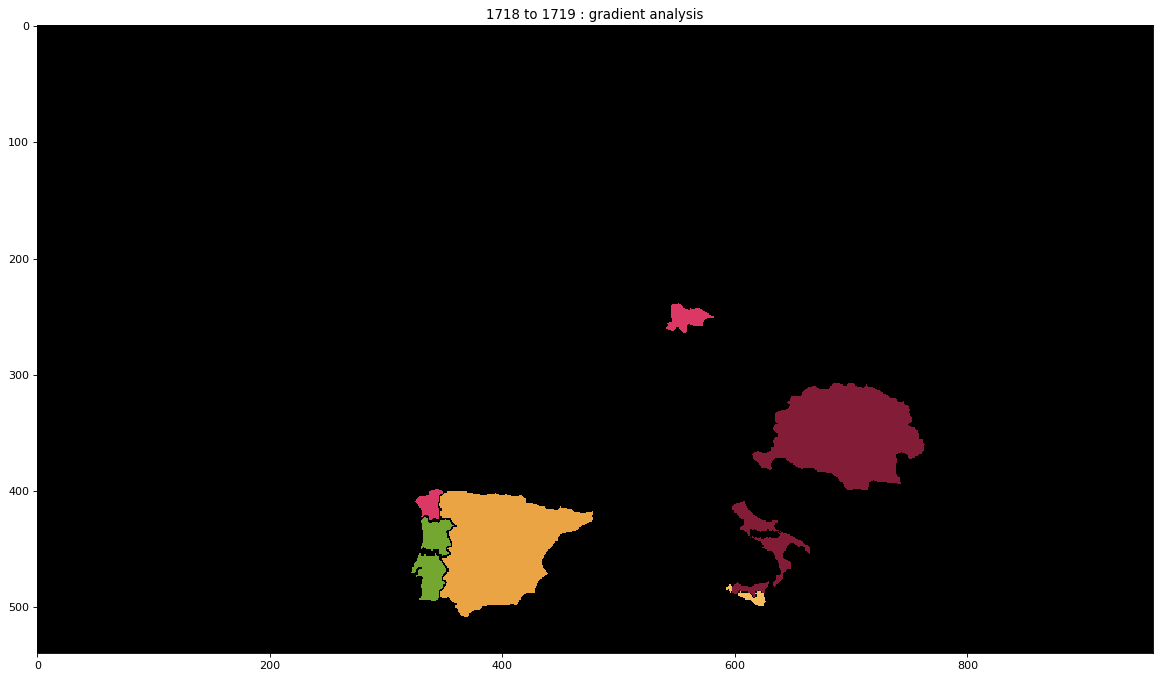

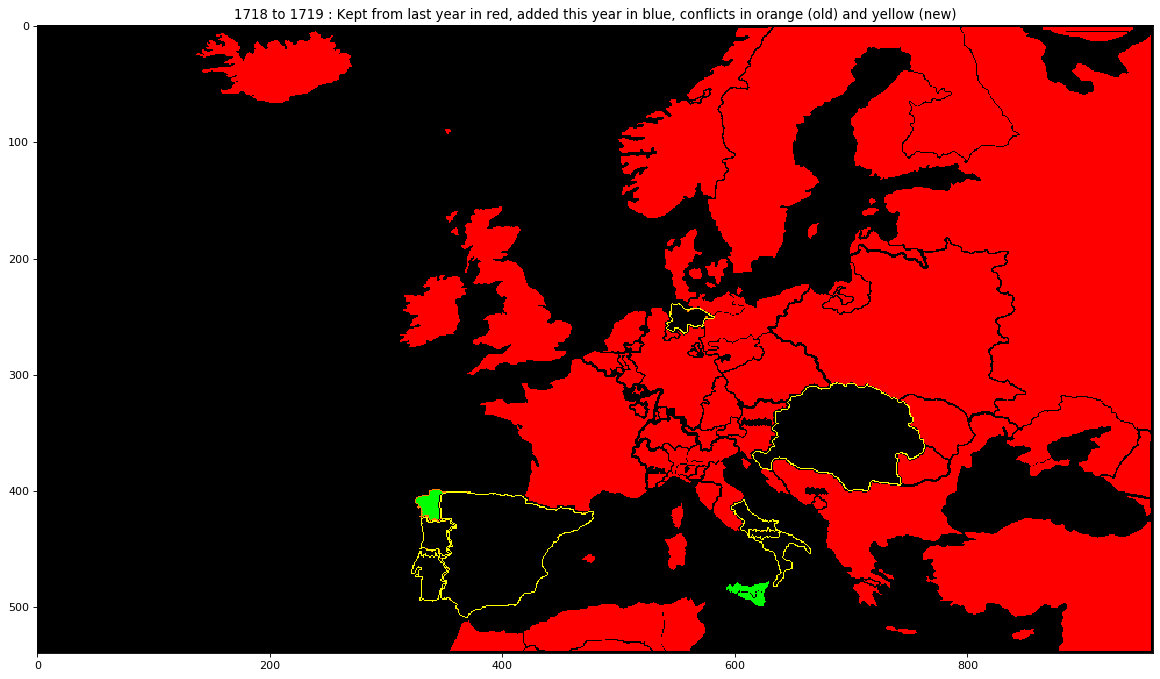

shape conflicts : (7, 2), len merged : 7


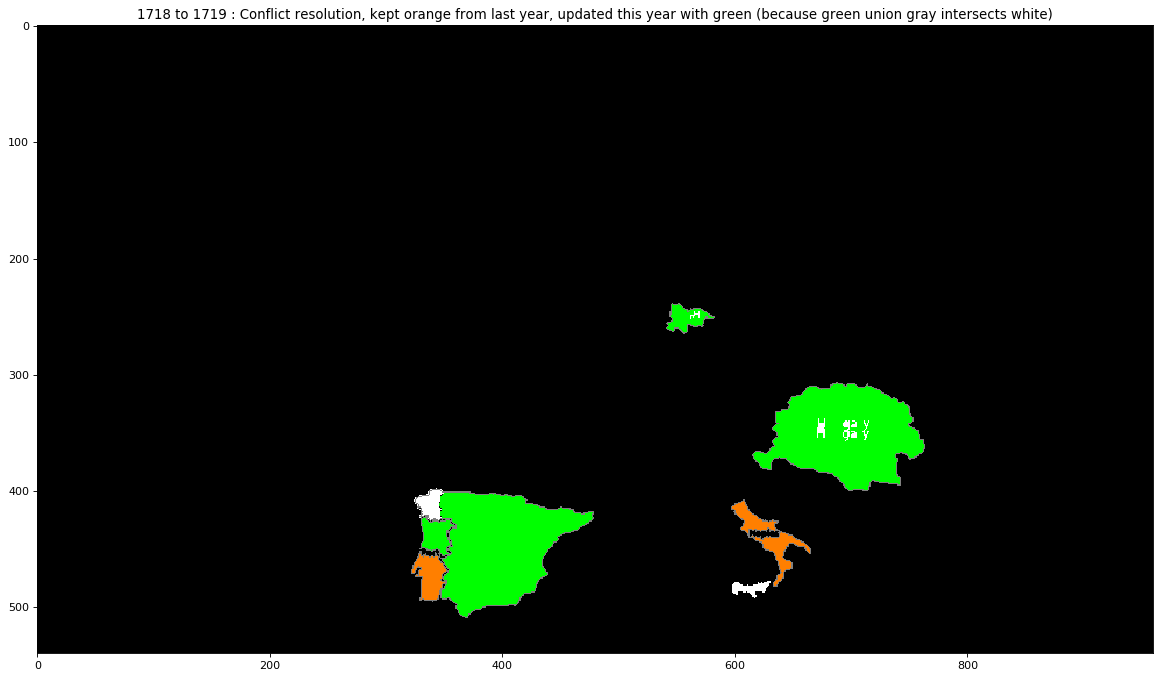

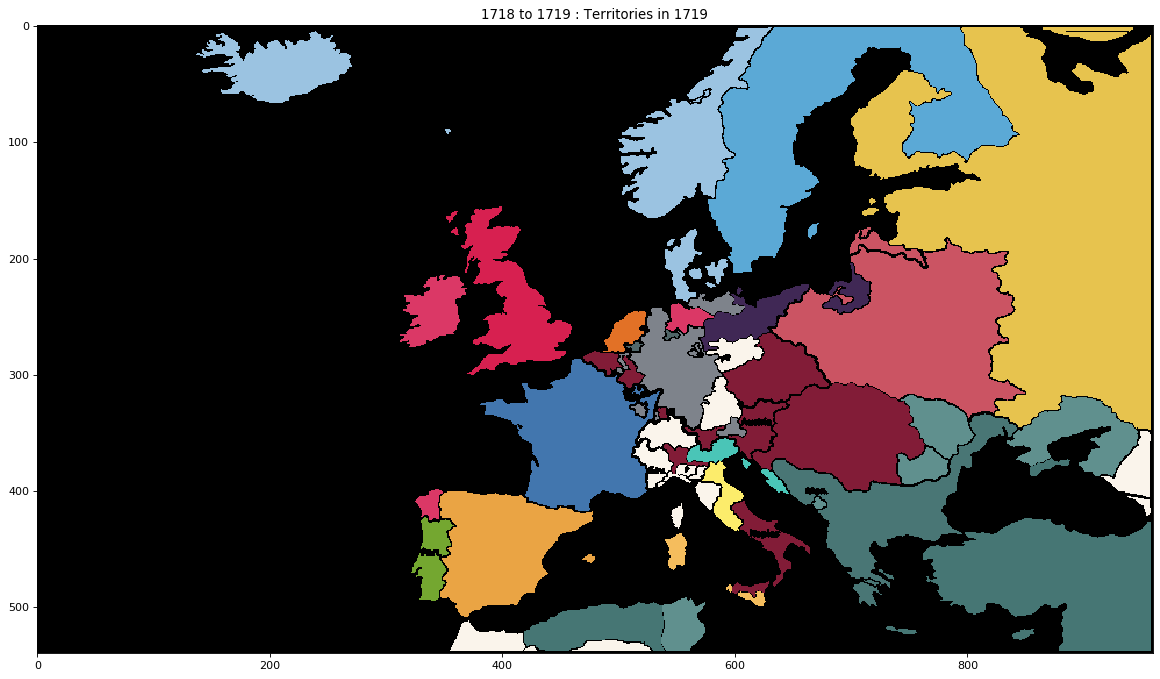

ignored 1 based on ignored_colors 


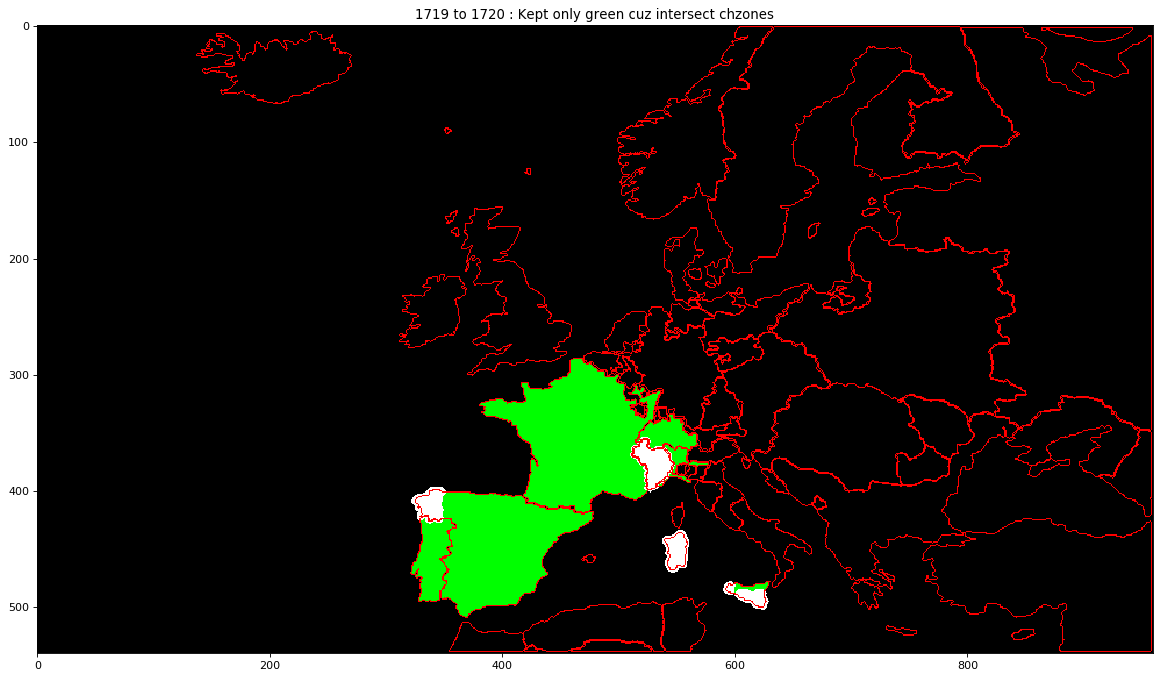


extract color and mask took 1.1888163089752197
split territory took 3.6475908756256104


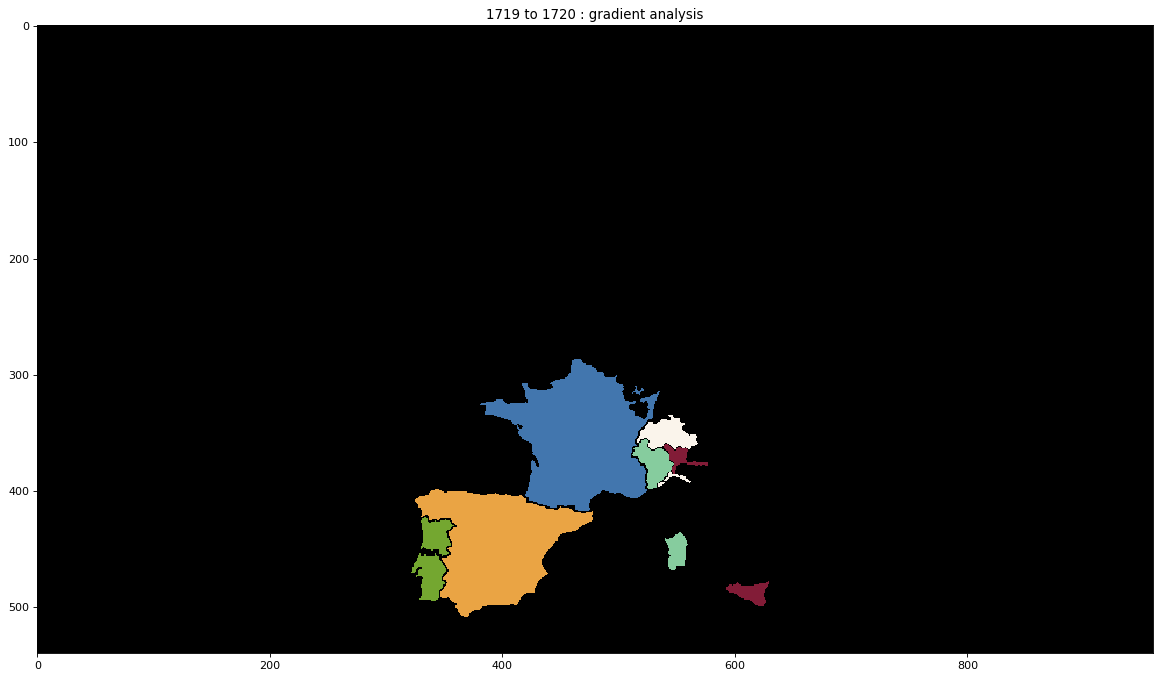

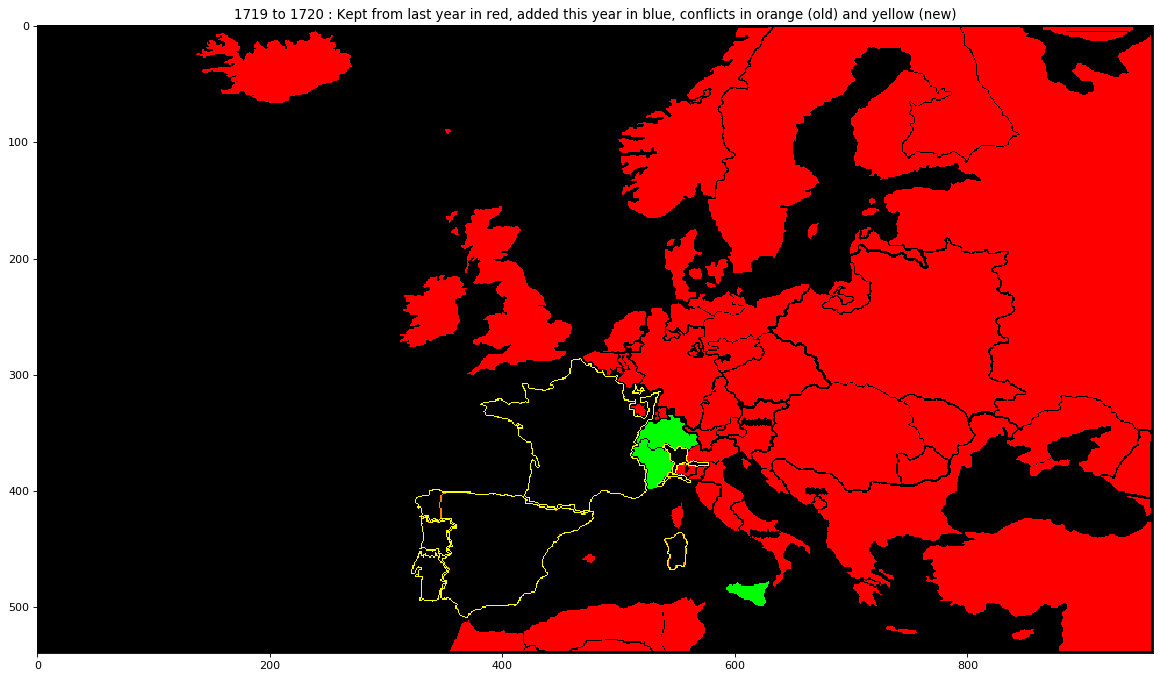

shape conflicts : (9, 2), len merged : 9


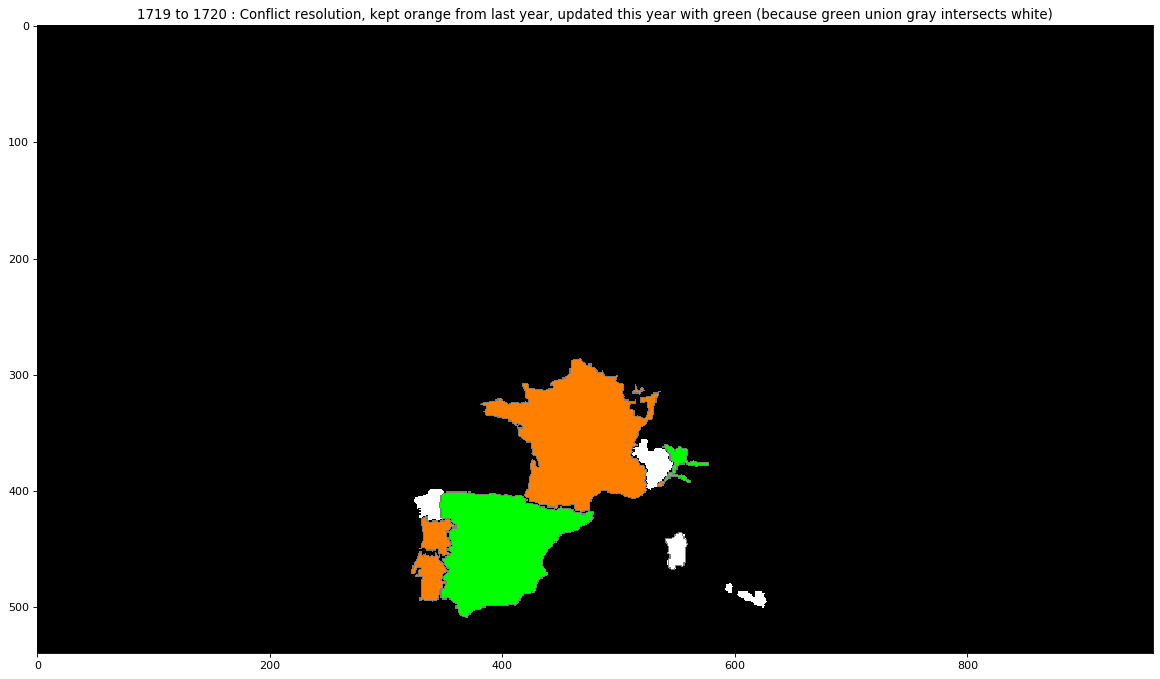

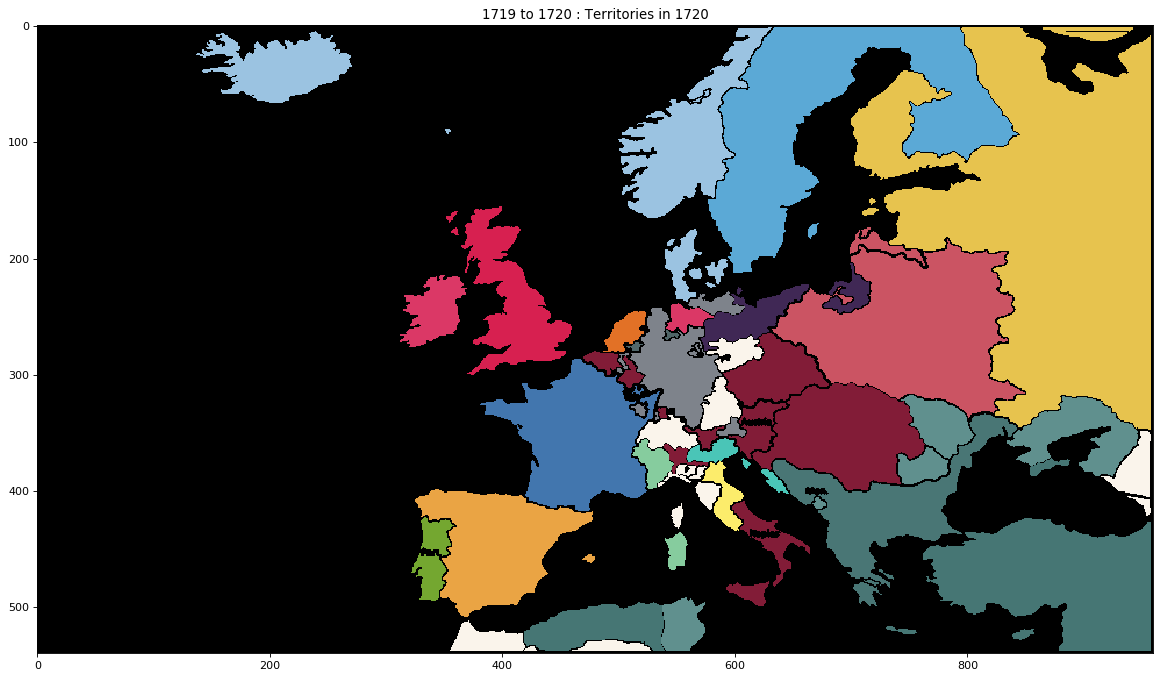

ignored 1 based on ignored_colors 


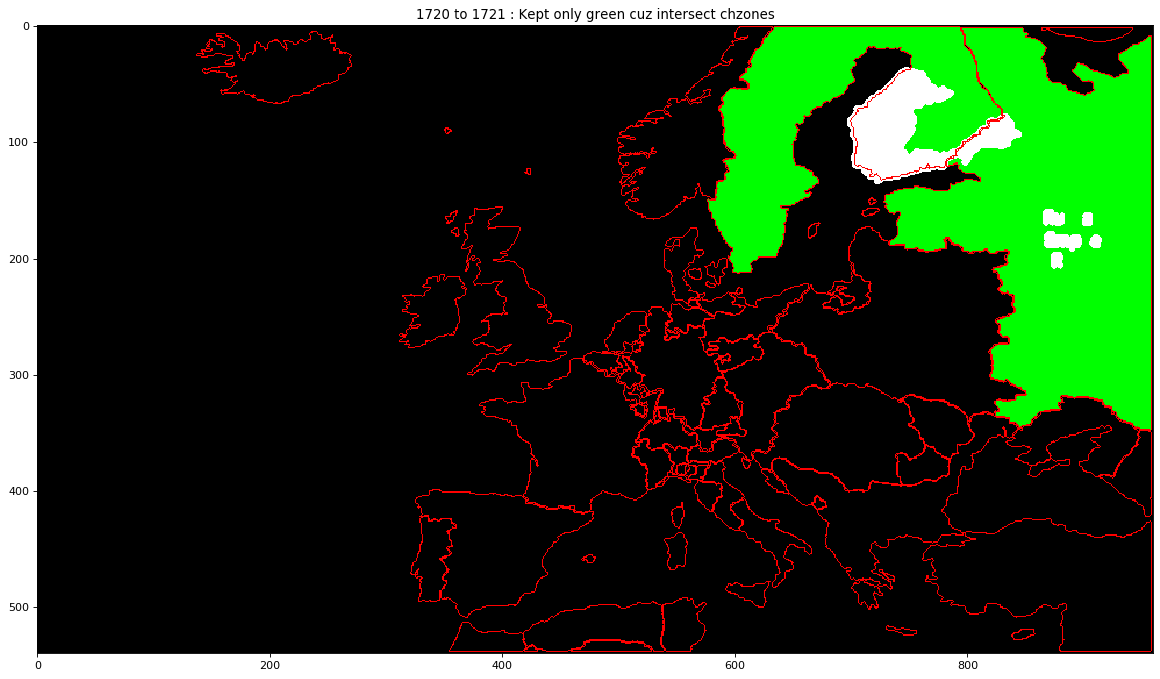


extract color and mask took 4.183872938156128
split territory took 0.8460934162139893


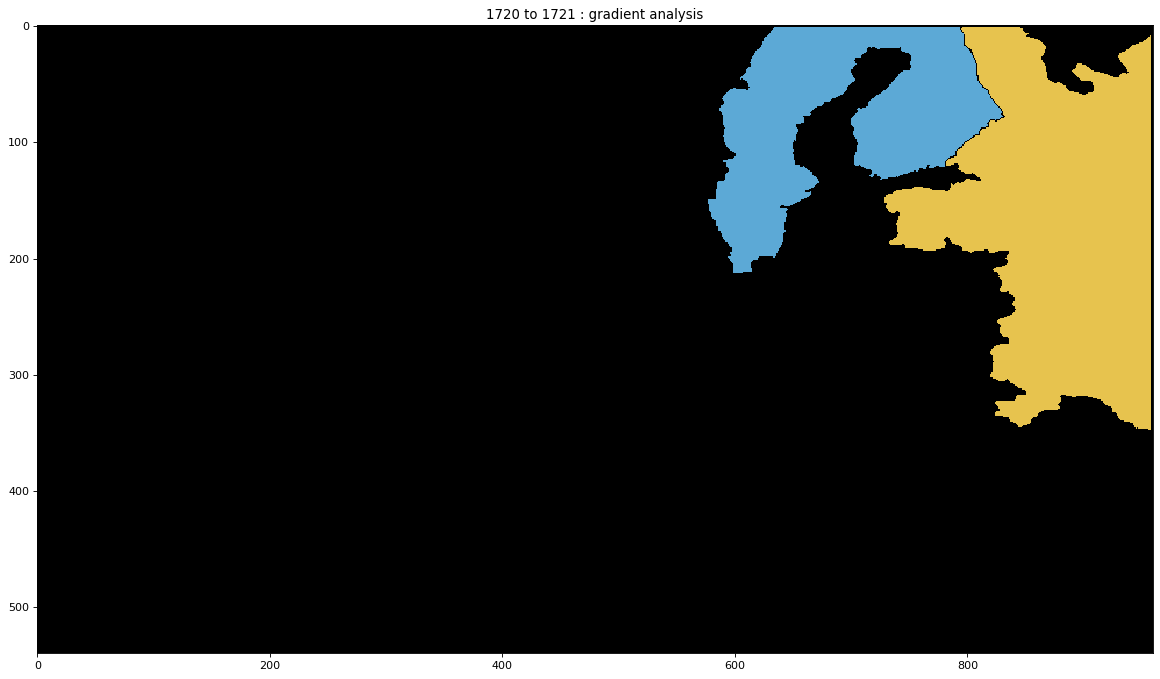

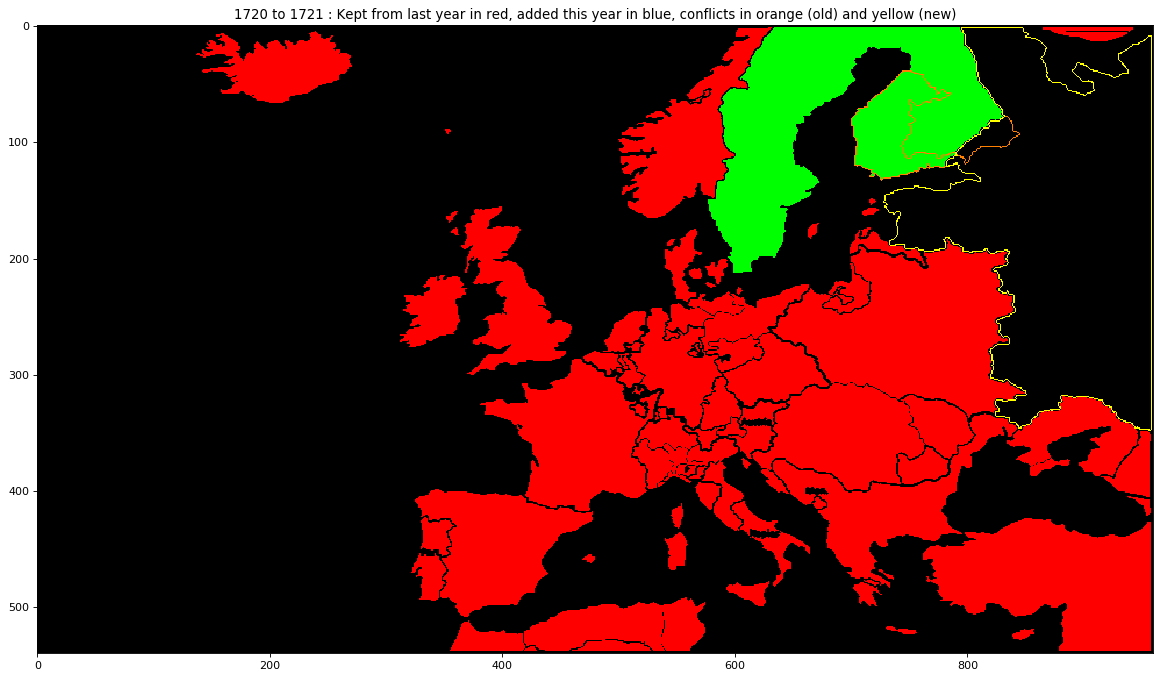

shape conflicts : (1, 2), len merged : 1


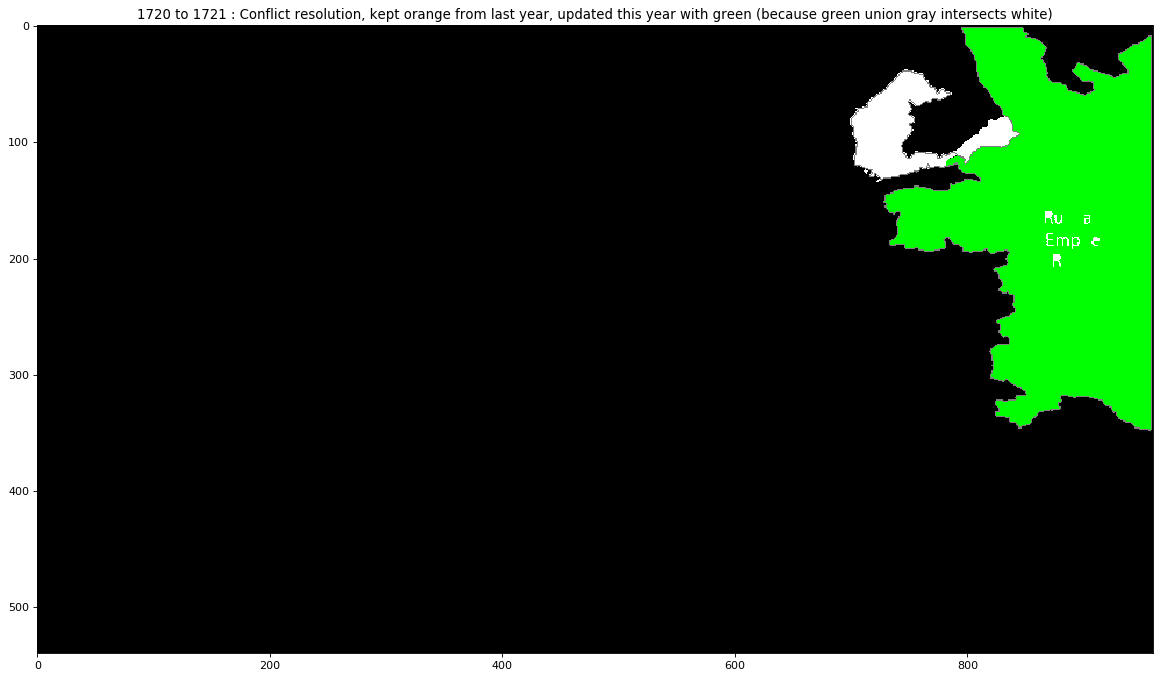

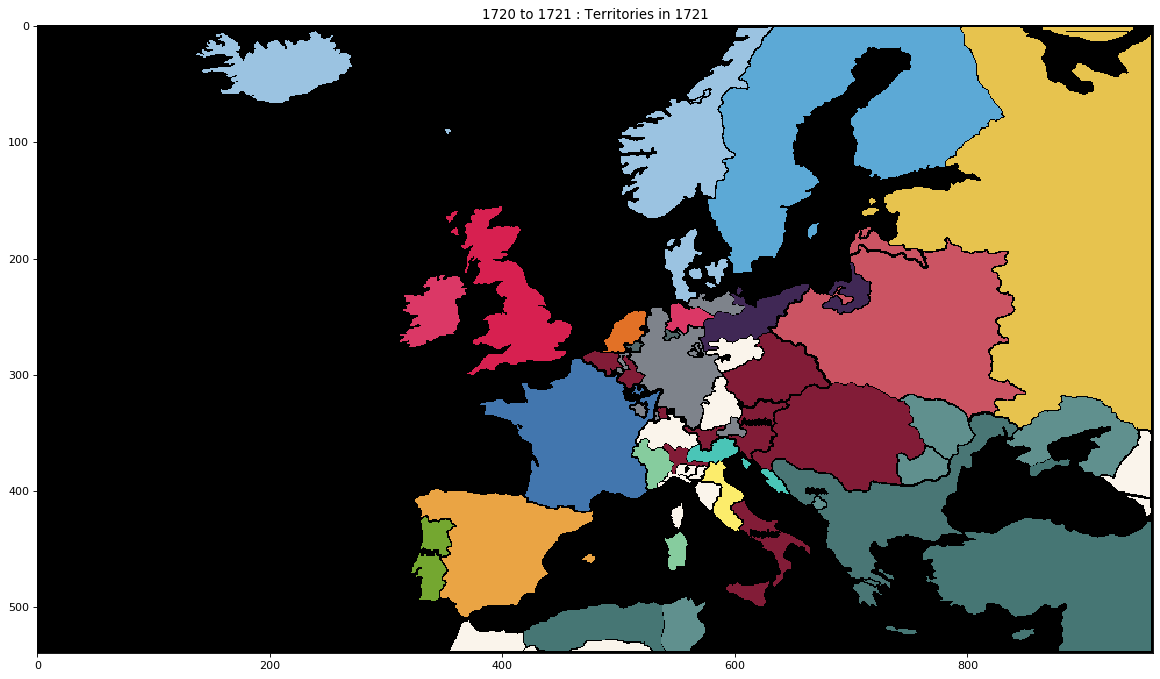

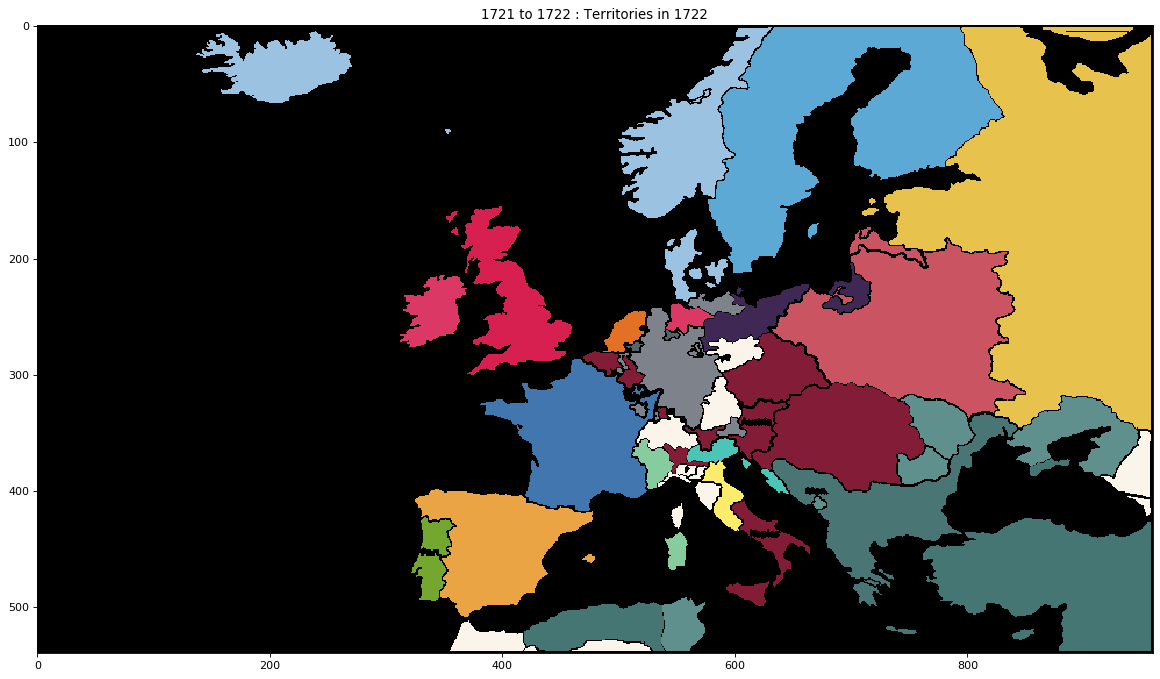

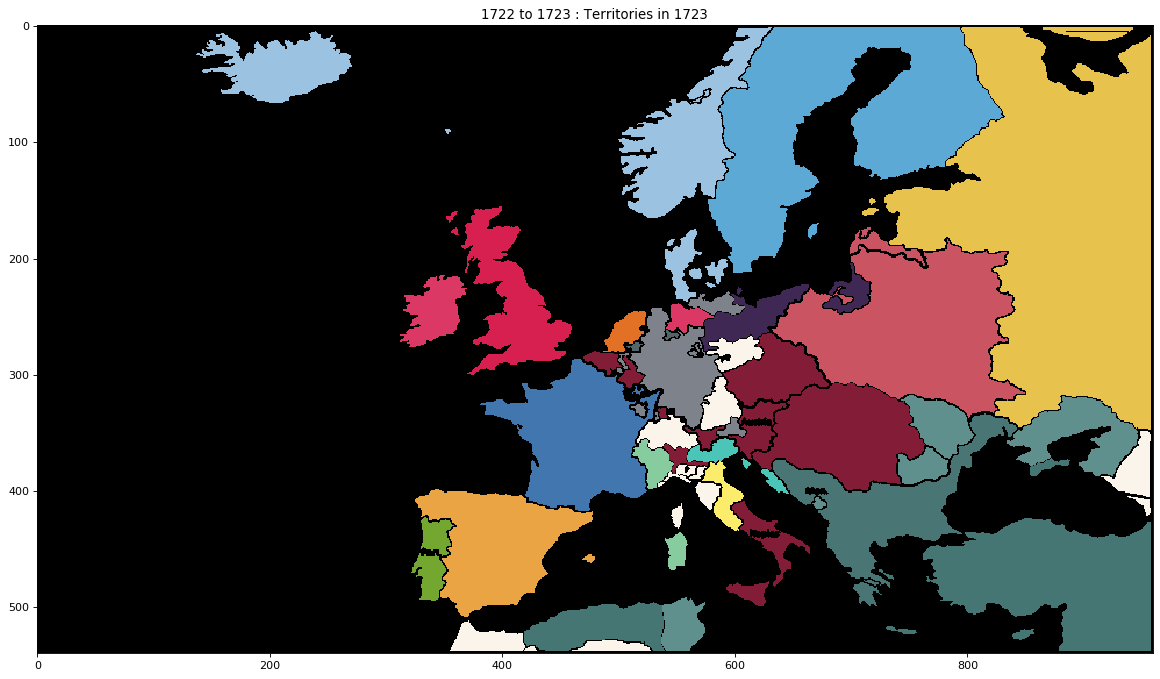

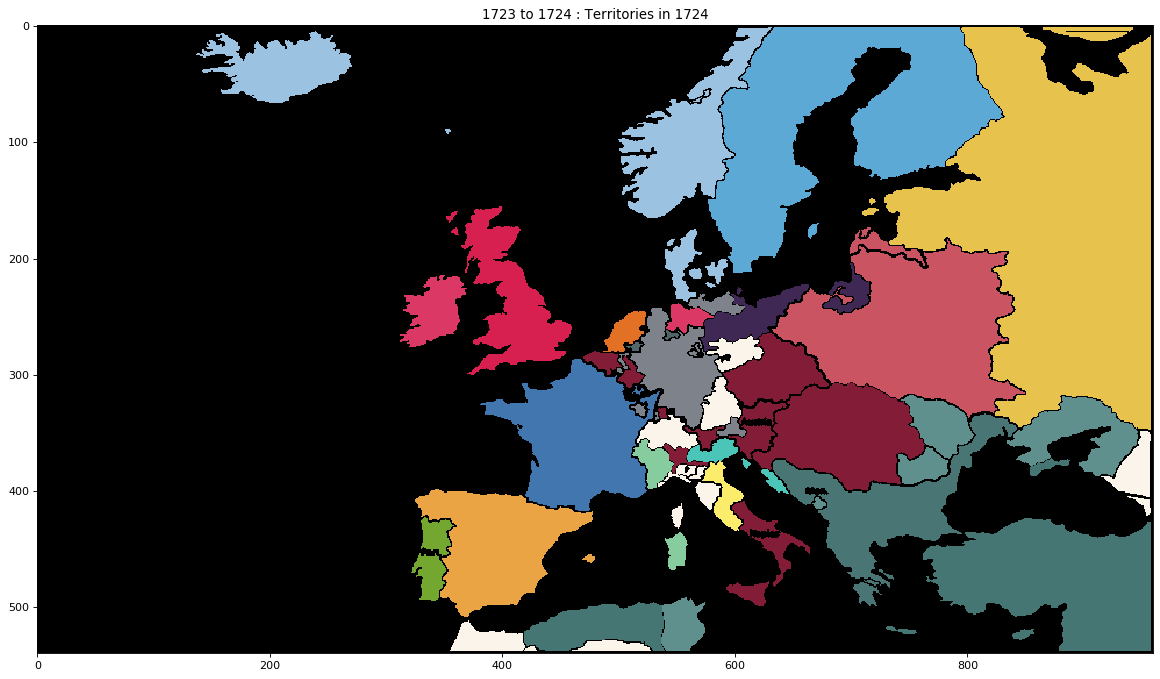

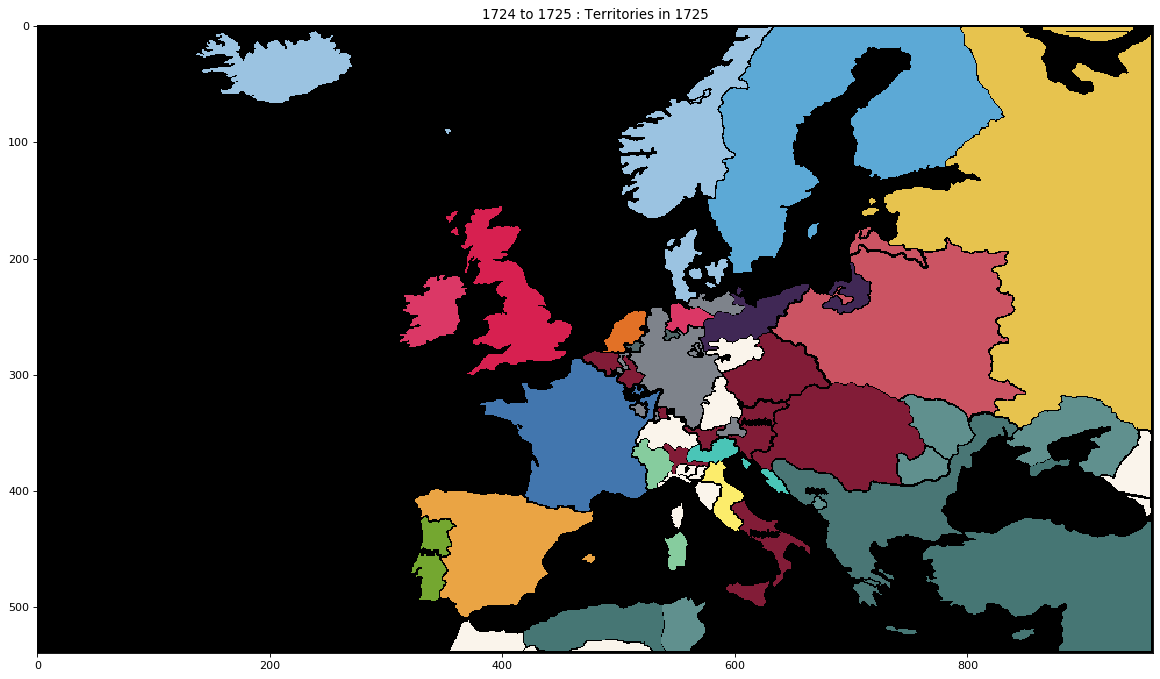

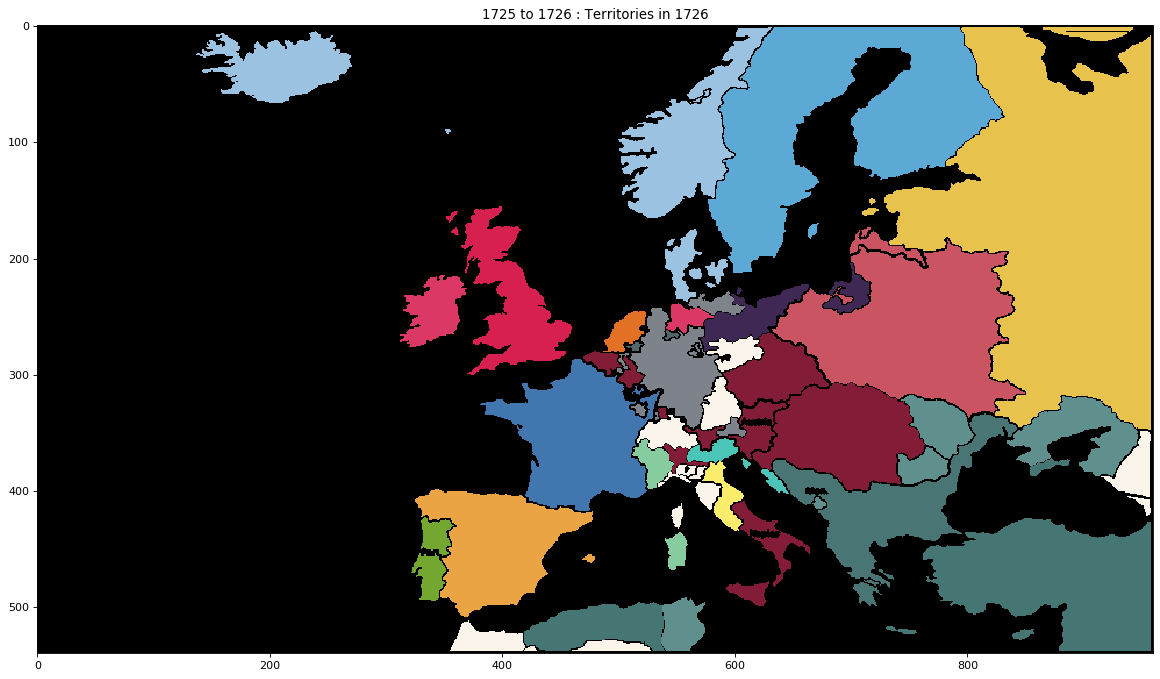

ignored 1 based on ignored_colors 


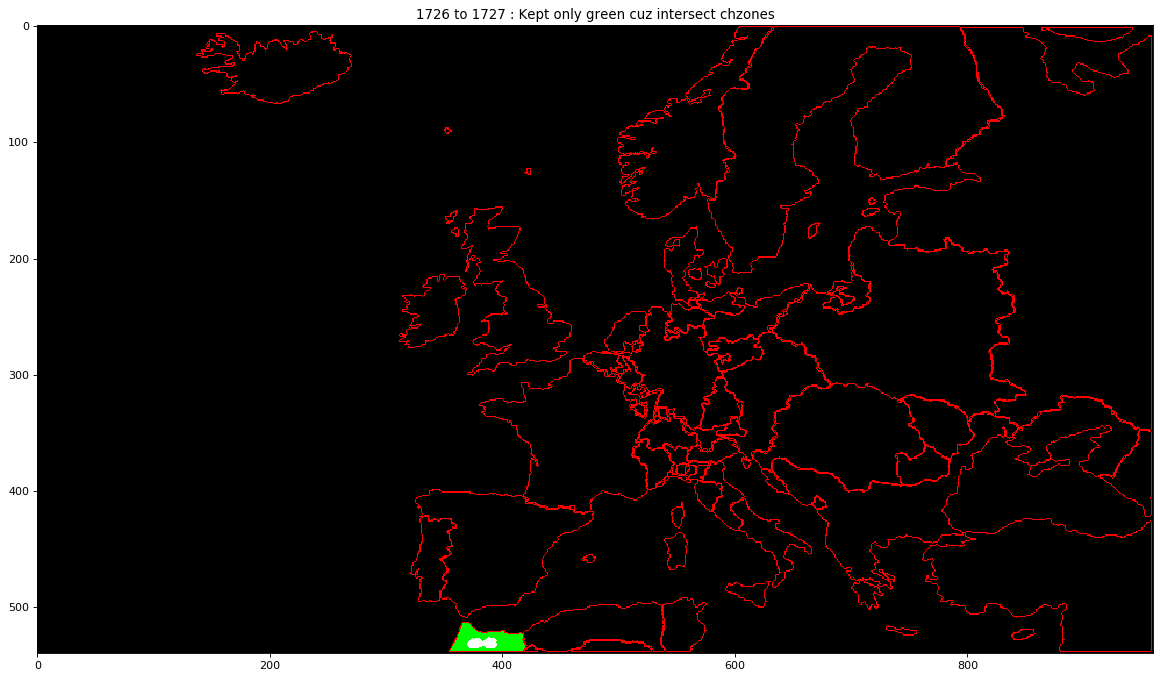


extract color and mask took 0.06463503837585449
split territory took 0.36177968978881836


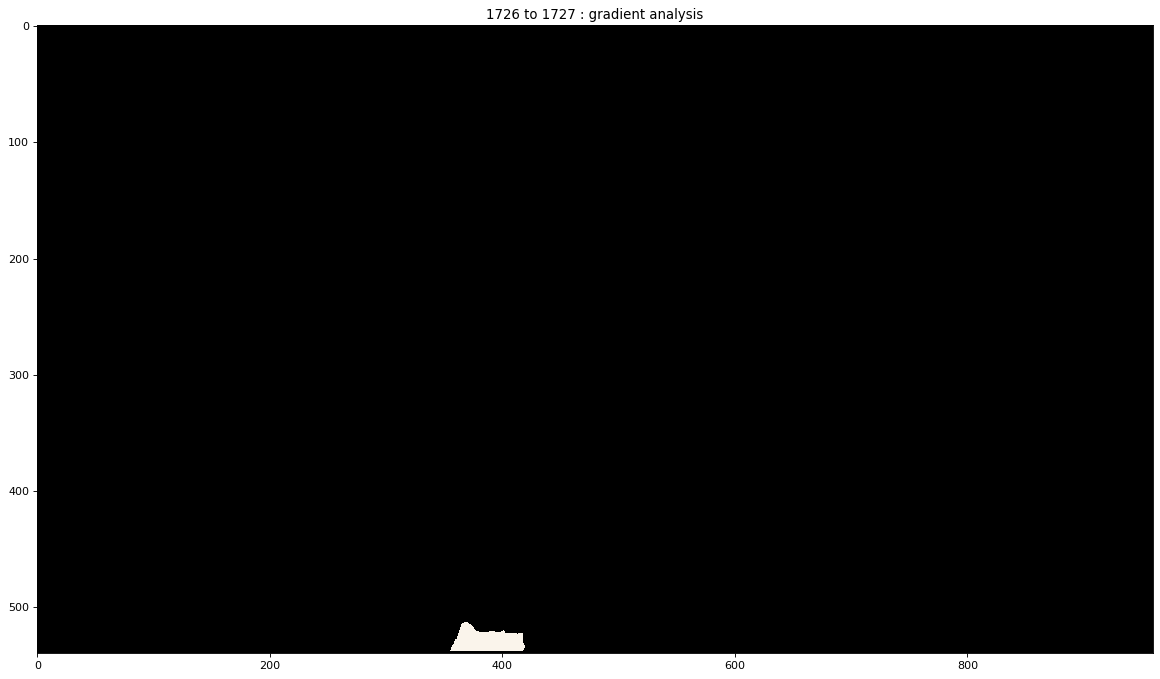

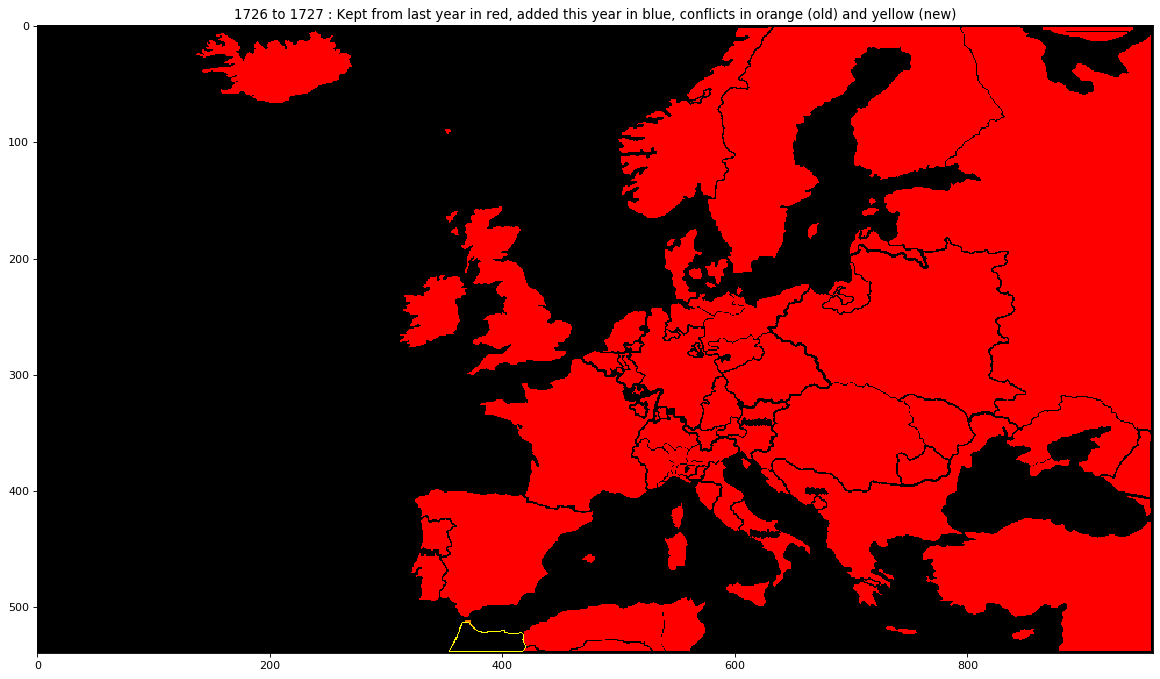

shape conflicts : (1, 2), len merged : 1


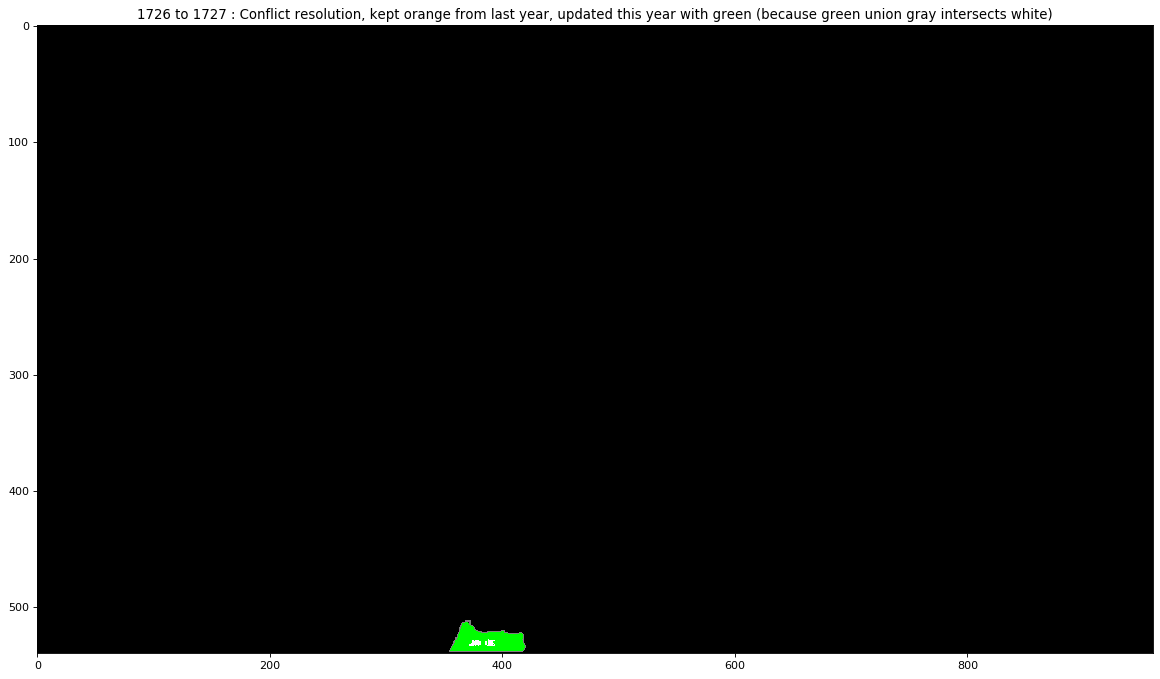

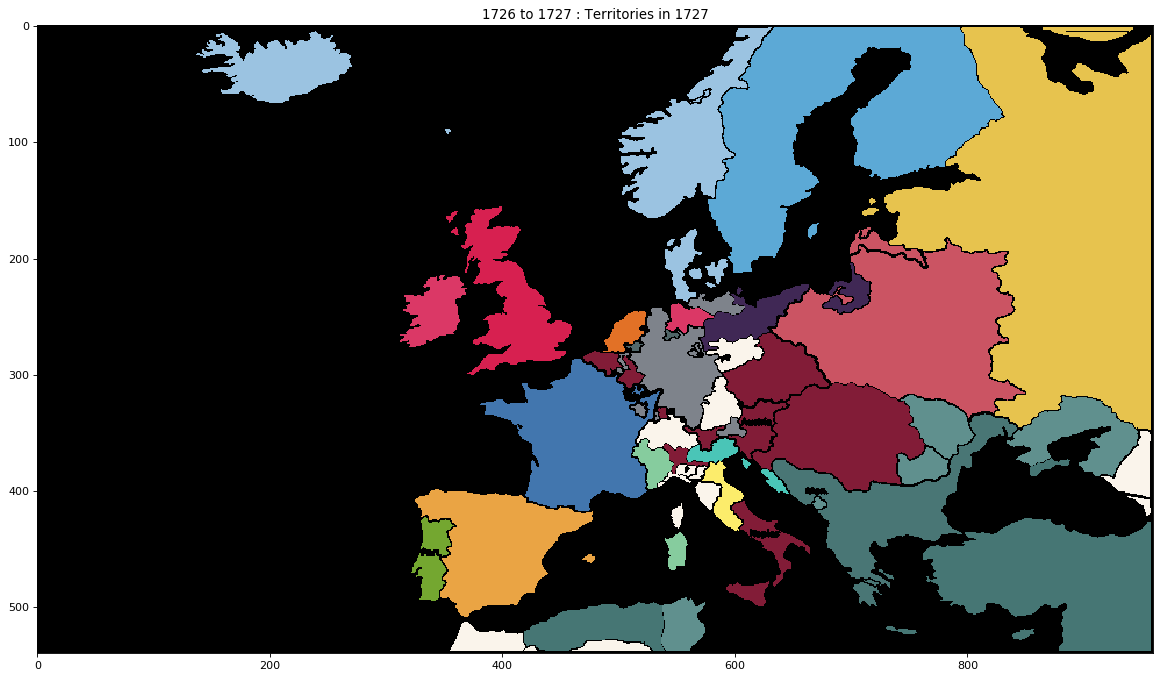

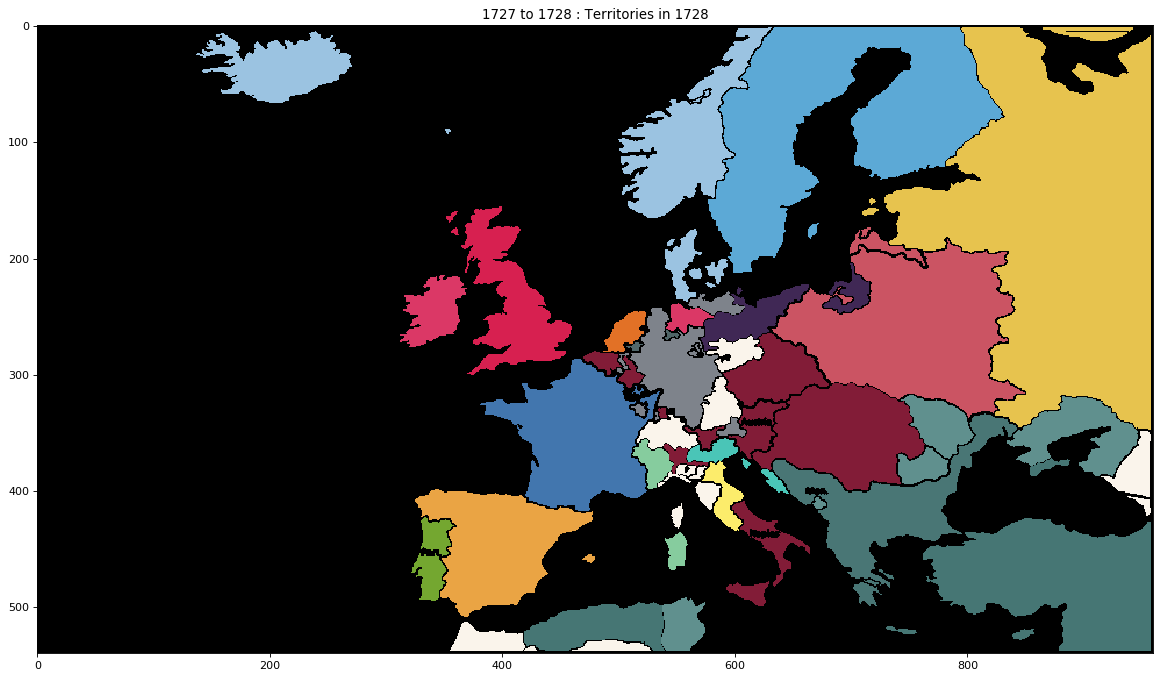

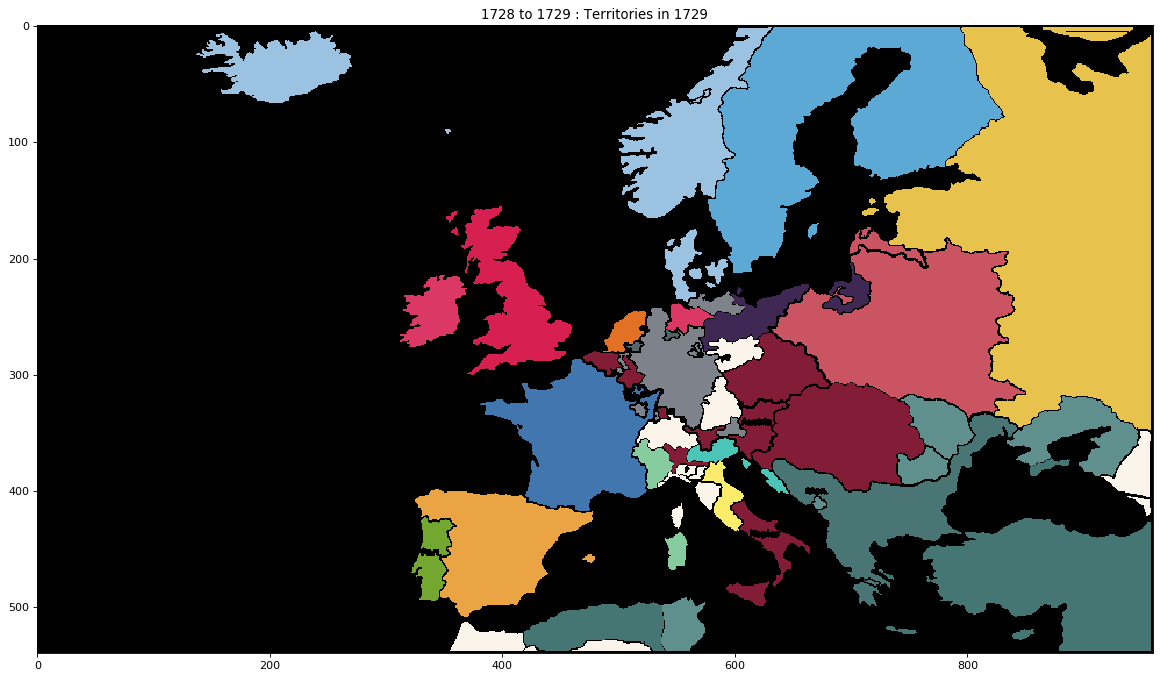

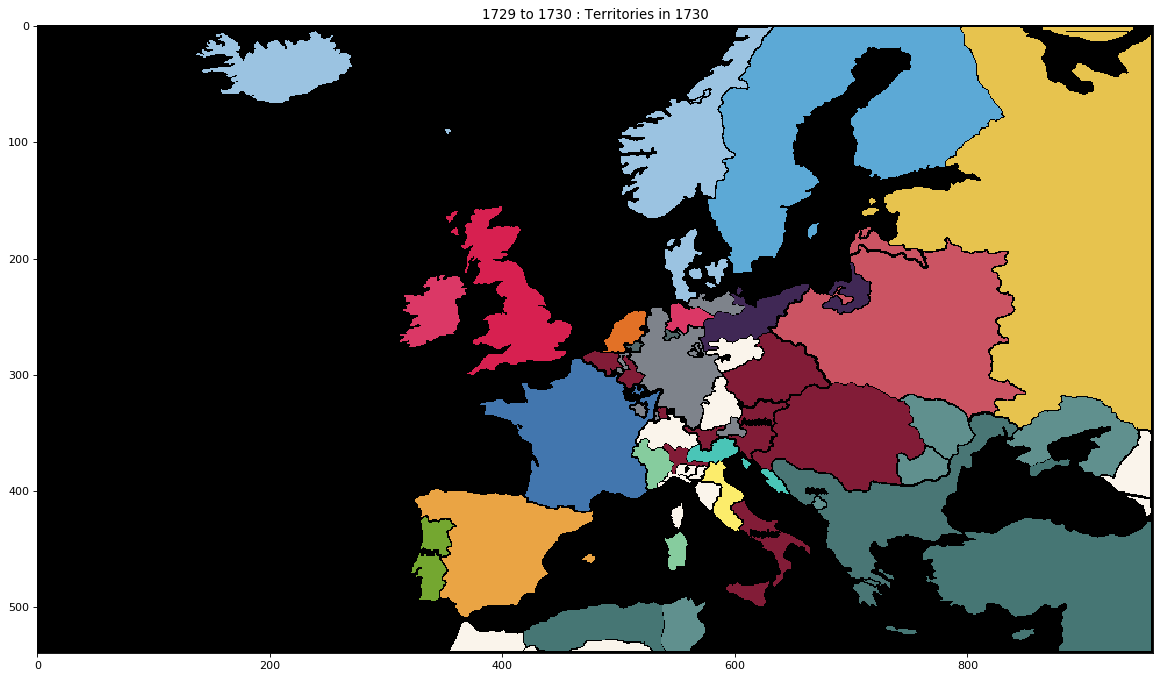

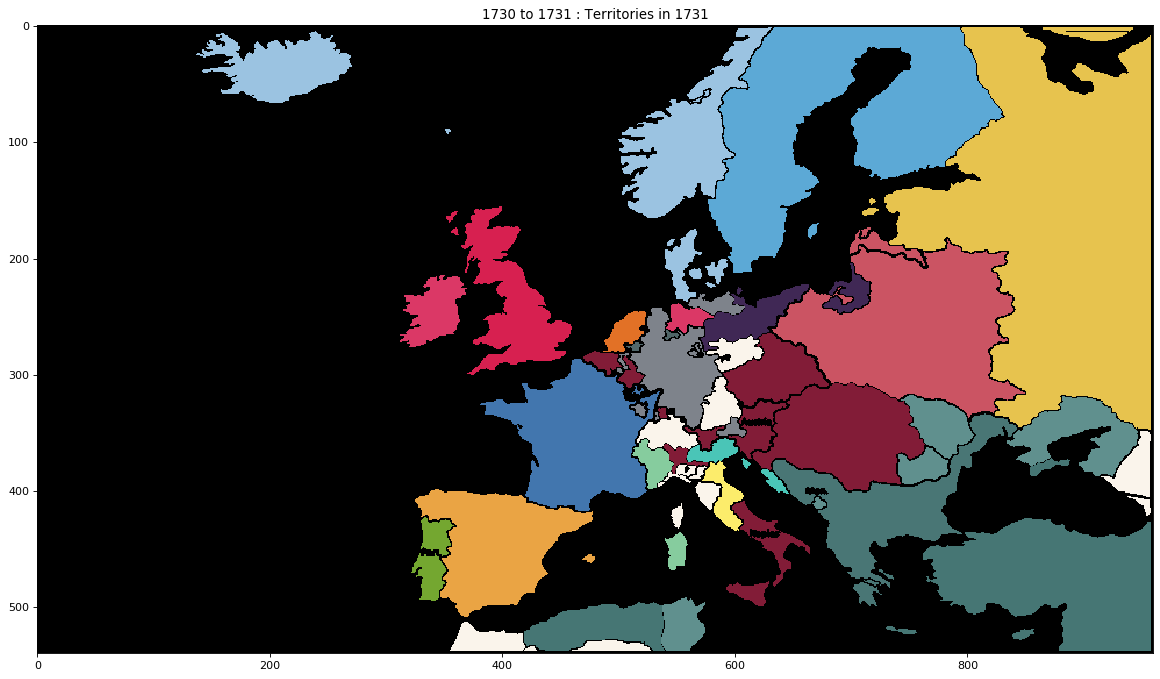

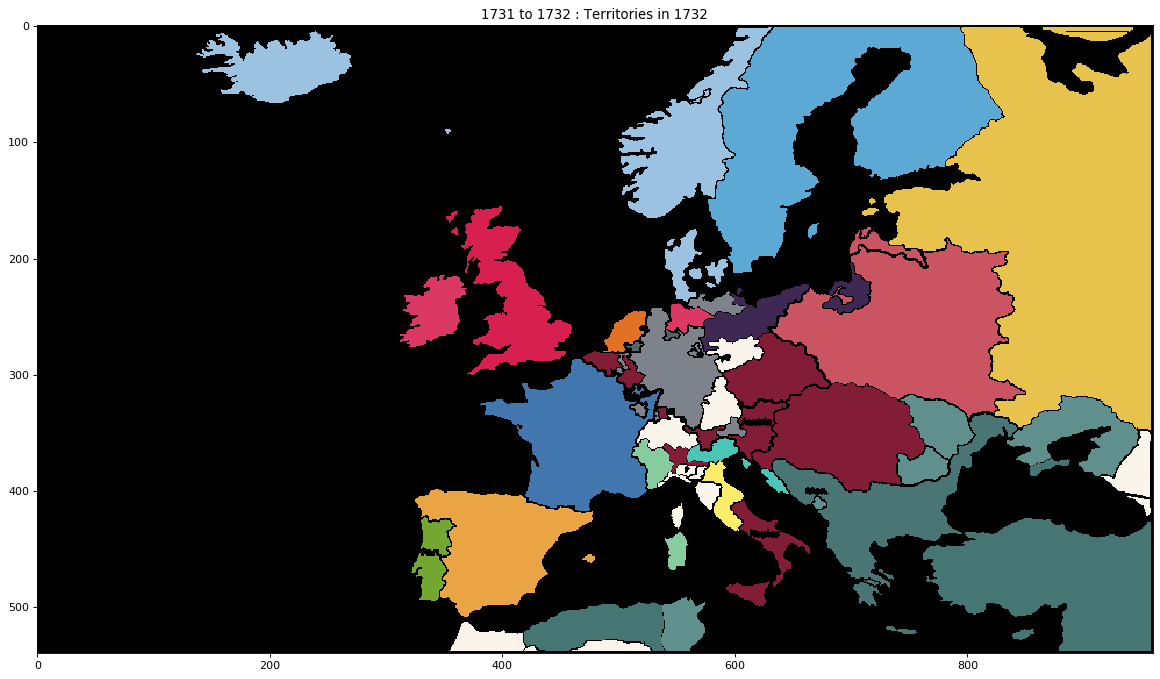

ignored 2 based on ignored_colors 


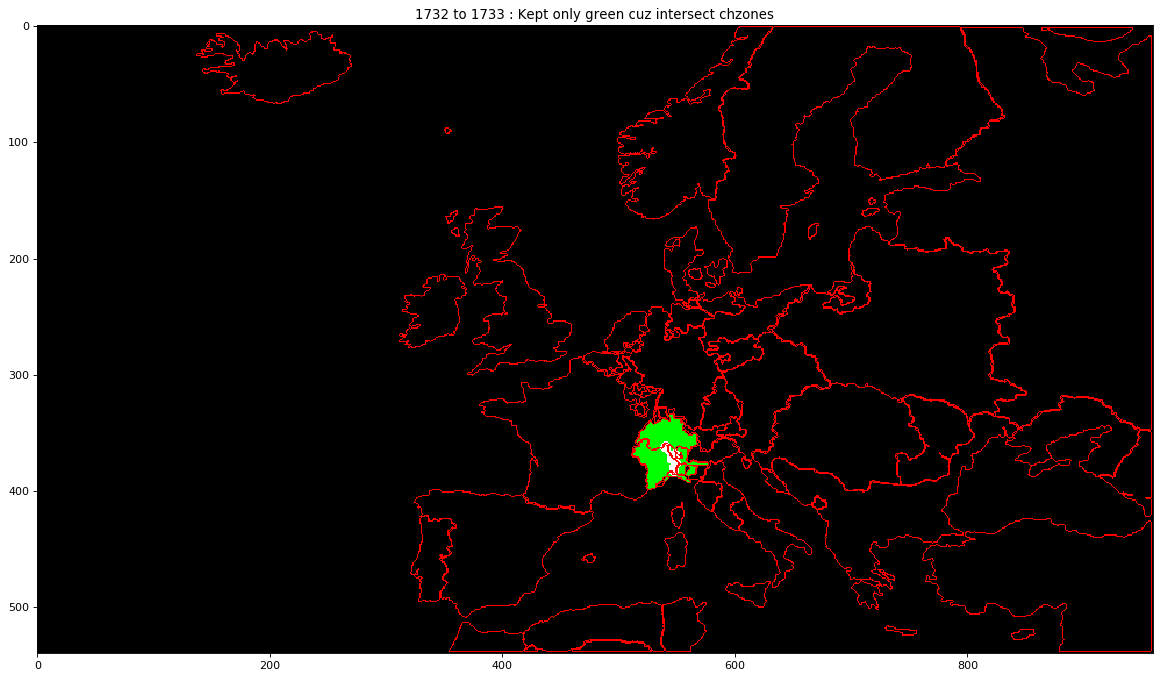


extract color and mask took 0.26402831077575684
split territory took 1.4473483562469482


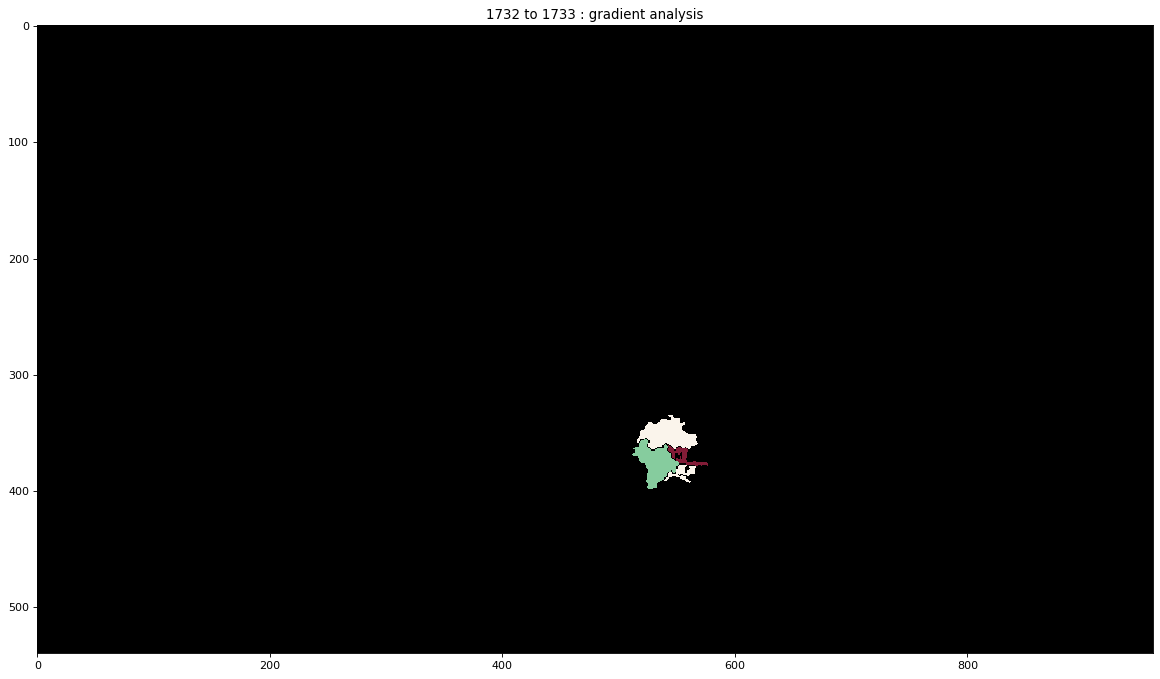

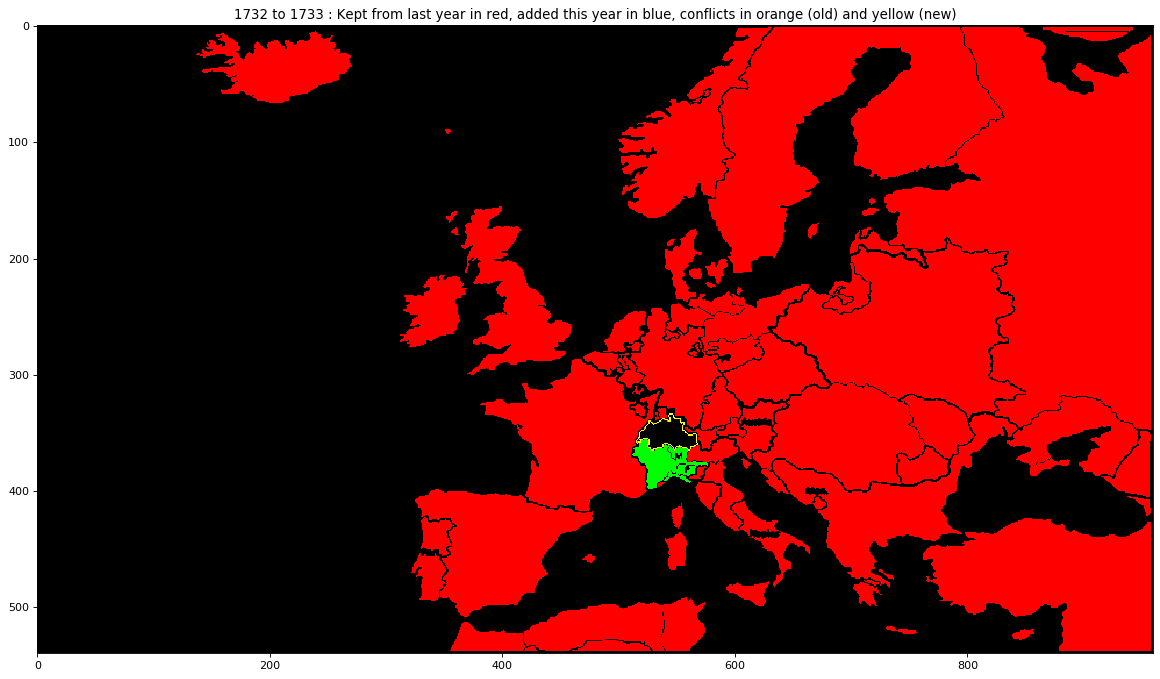

shape conflicts : (1, 2), len merged : 1


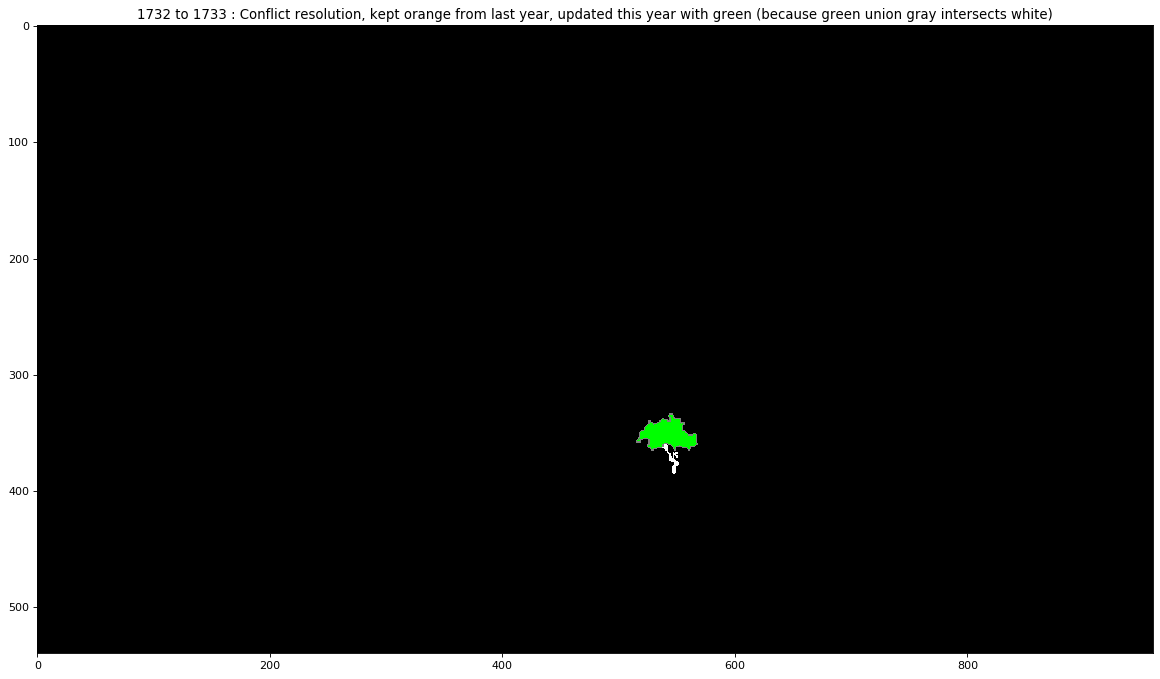

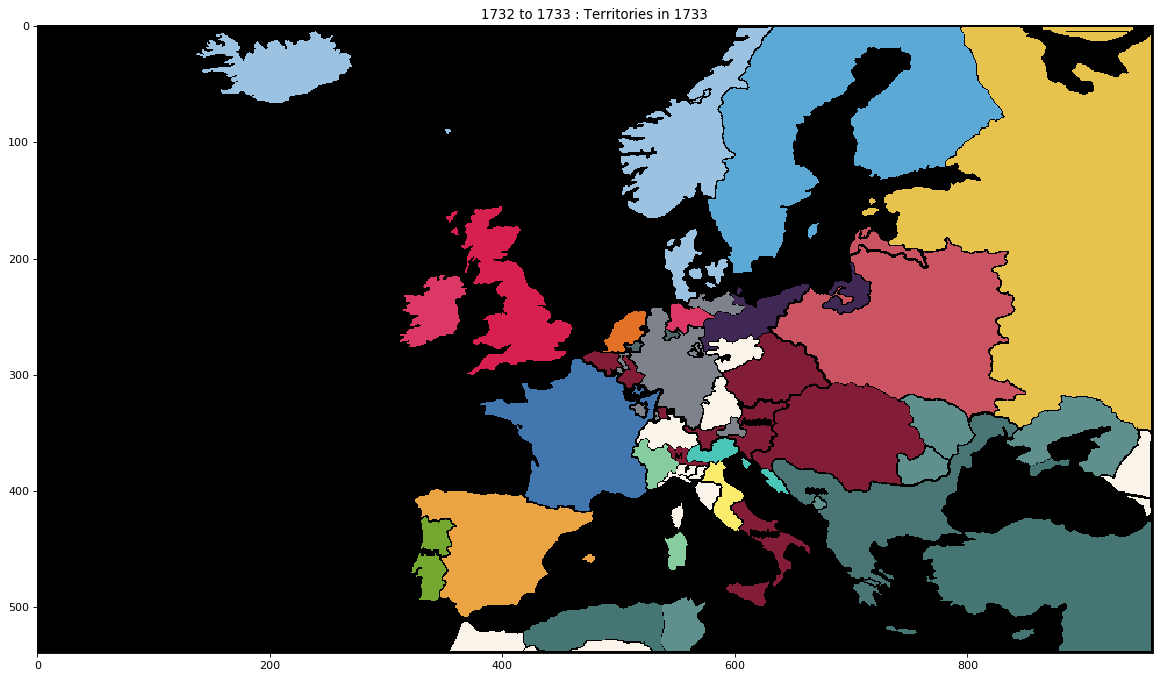

ignored 2 based on ignored_colors 


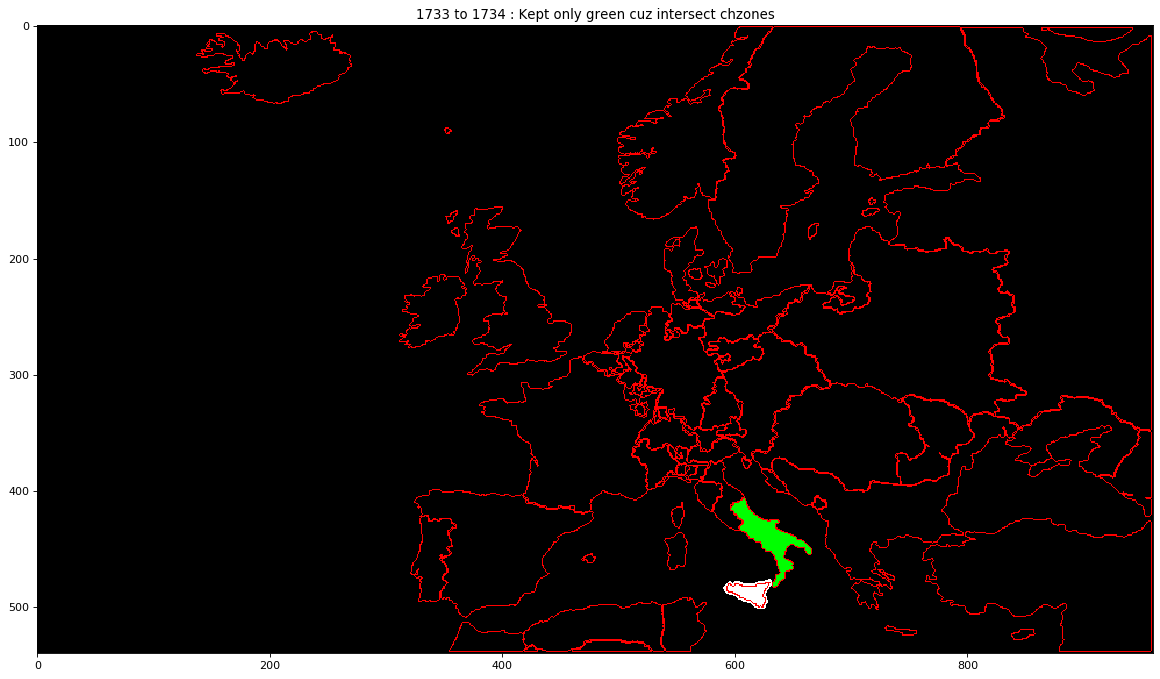


extract color and mask took 0.16110491752624512
split territory took 0.7270541191101074


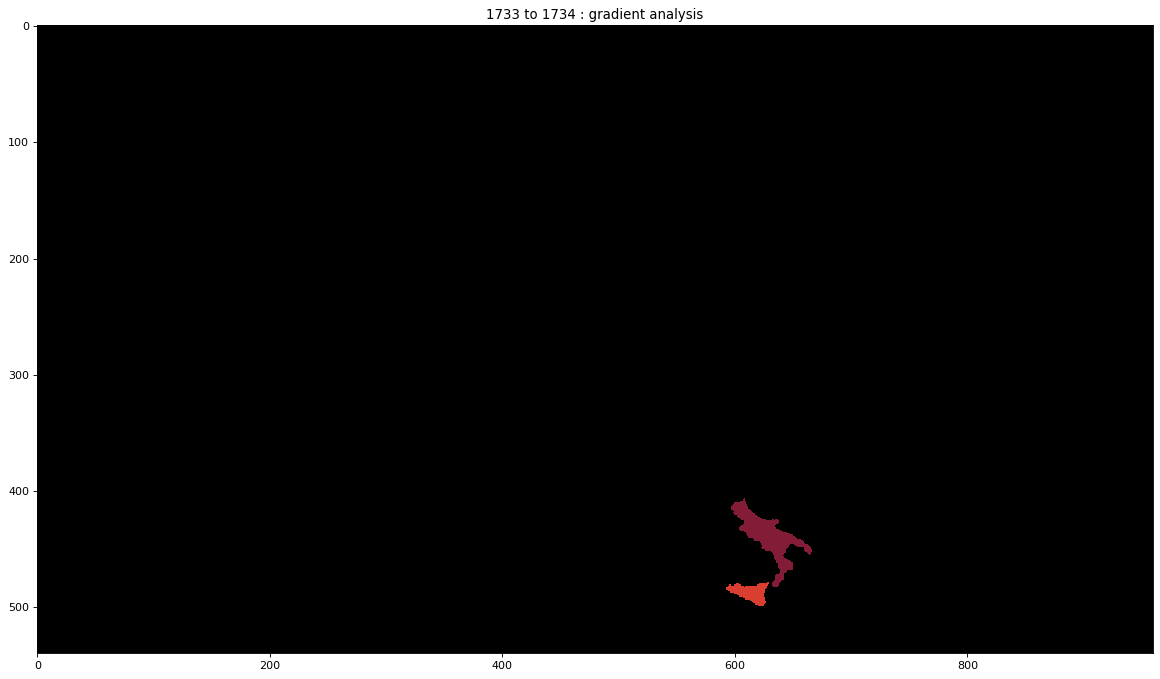

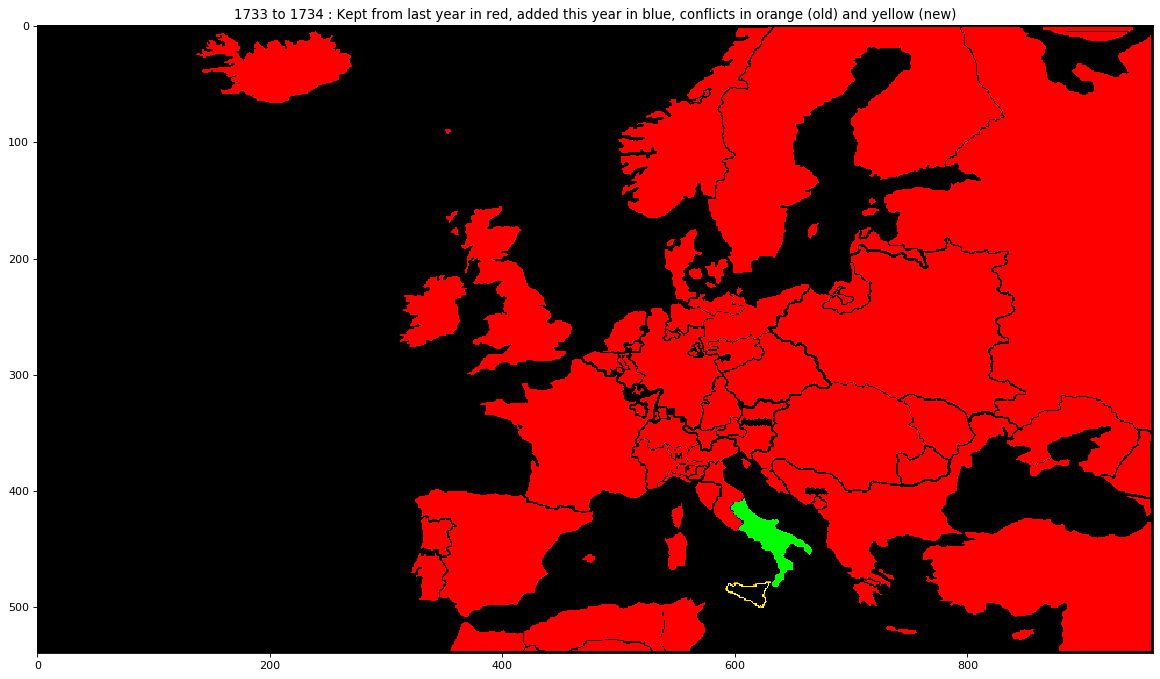

shape conflicts : (1, 2), len merged : 1


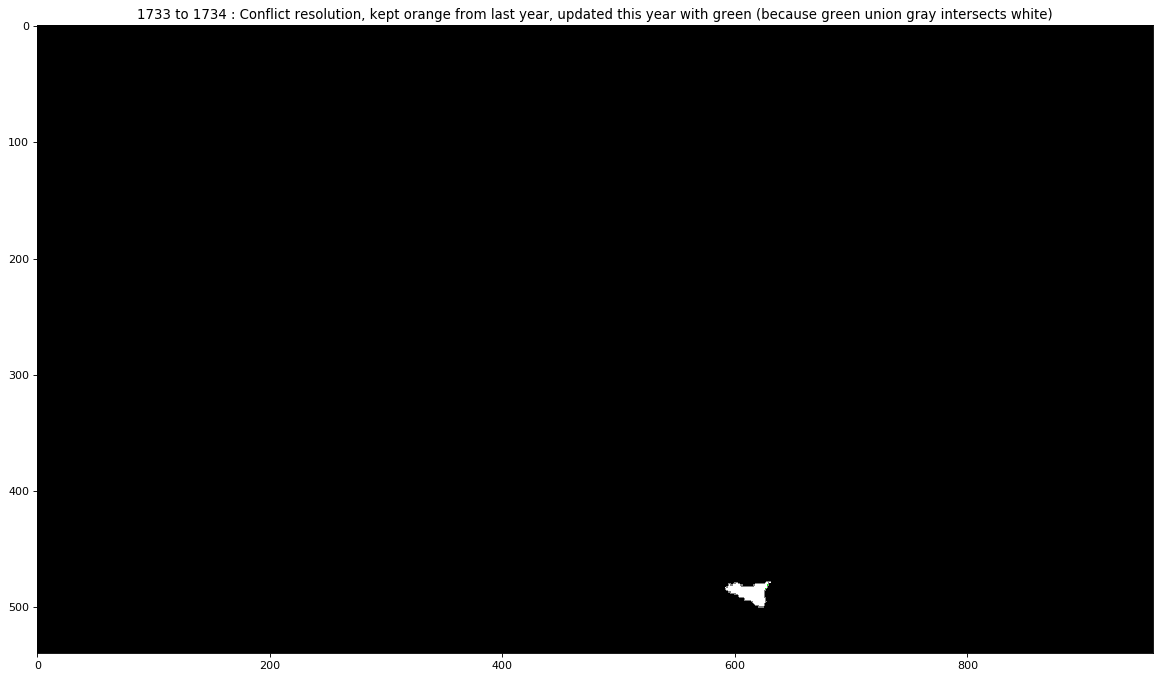

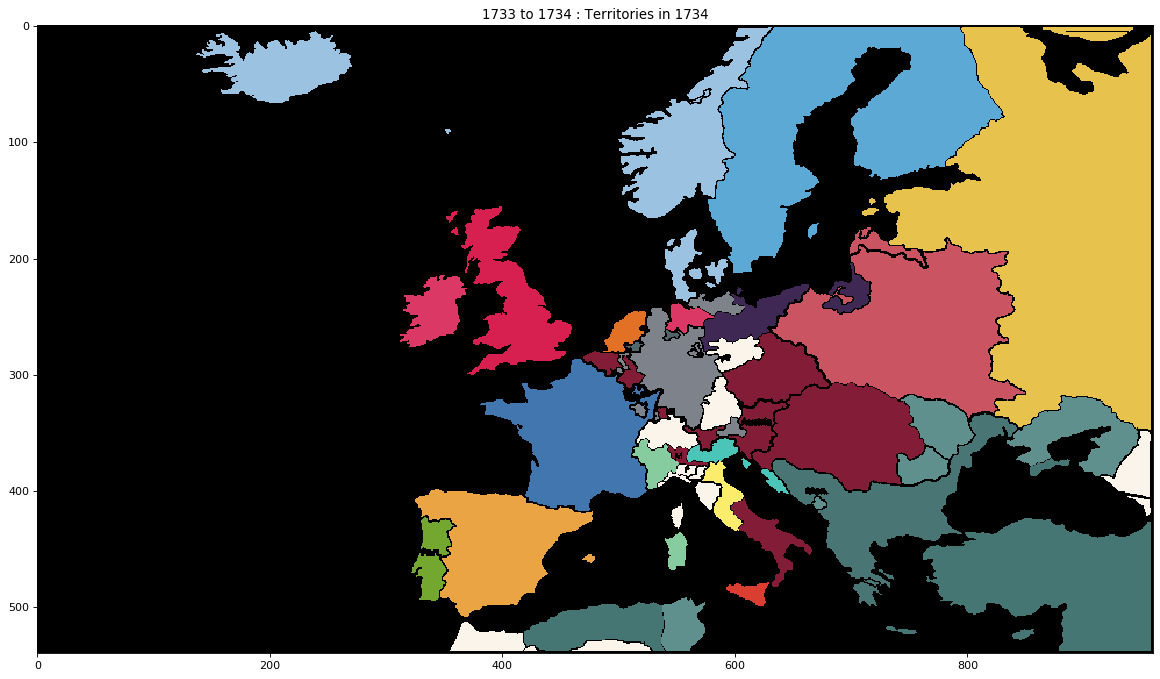

ignored 2 based on ignored_colors 


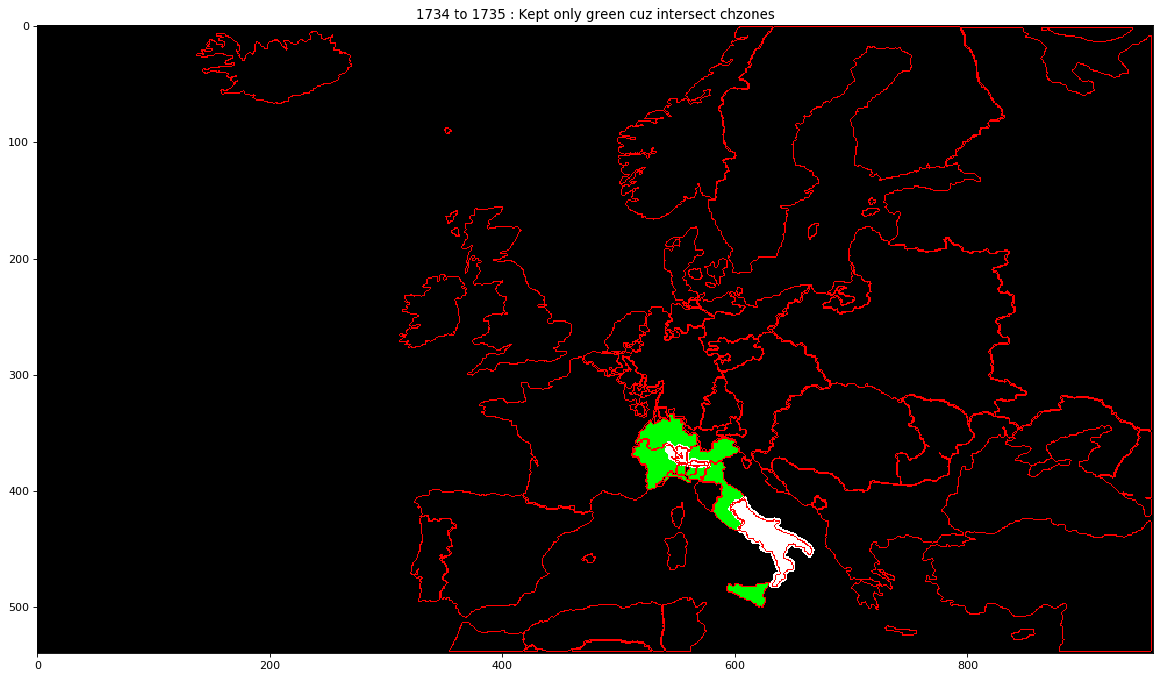


extract color and mask took 0.5558257102966309
split territory took 2.9018757343292236


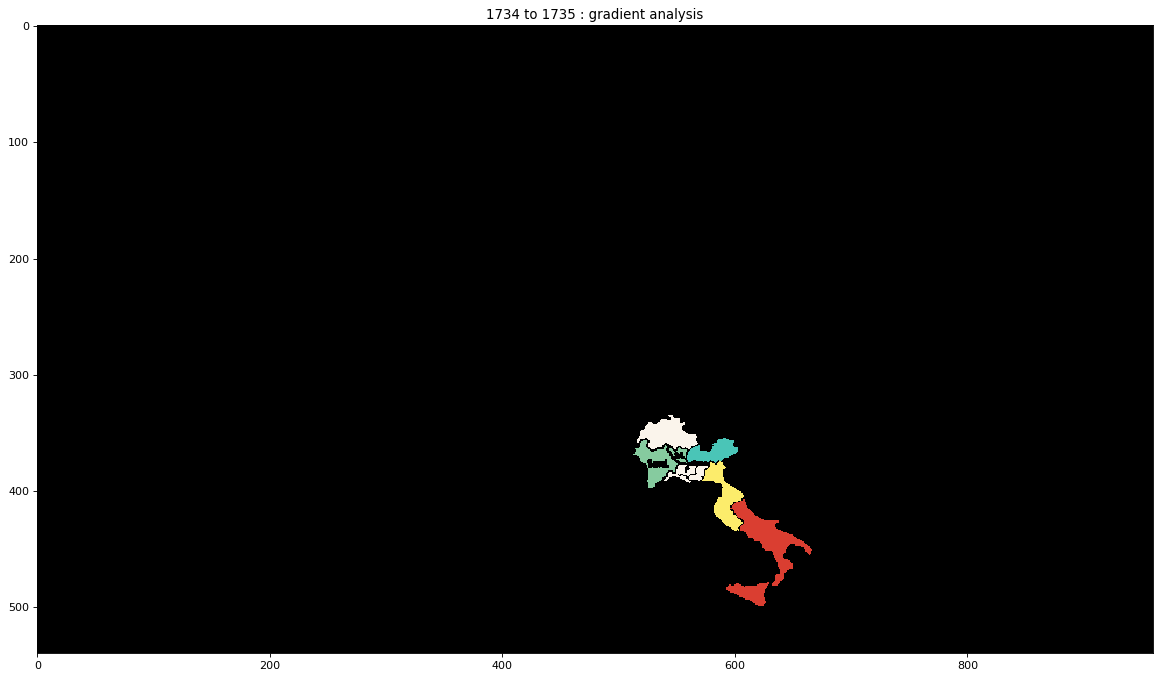

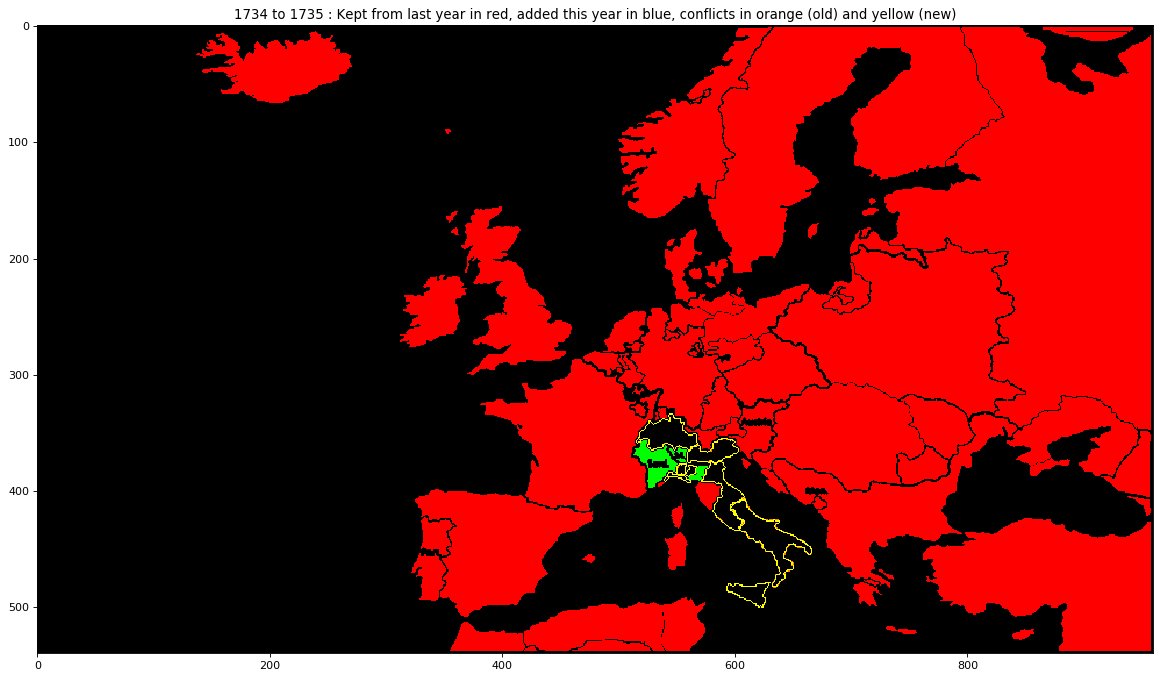

shape conflicts : (6, 2), len merged : 6


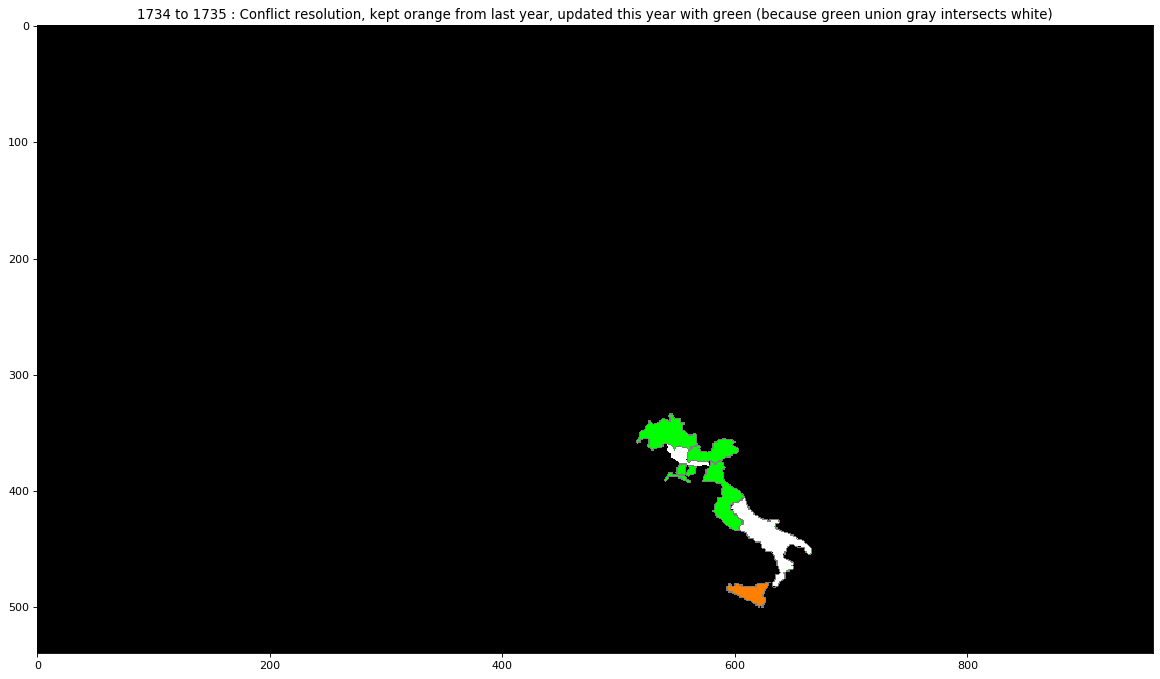

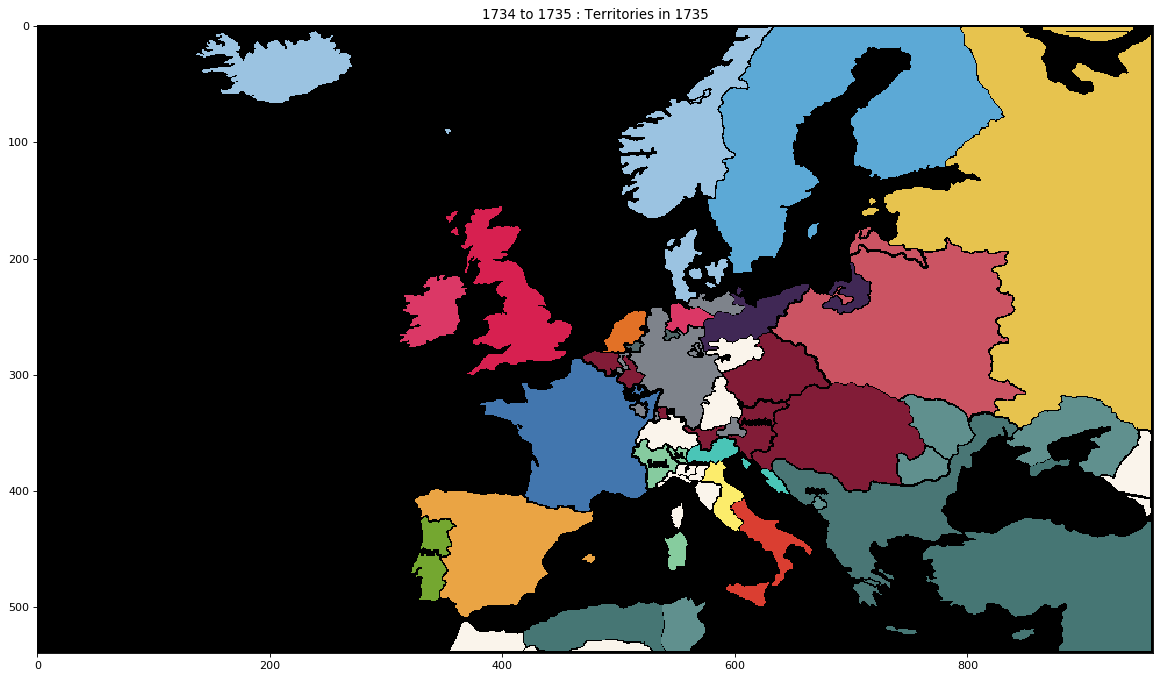

ignored 2 based on ignored_colors 


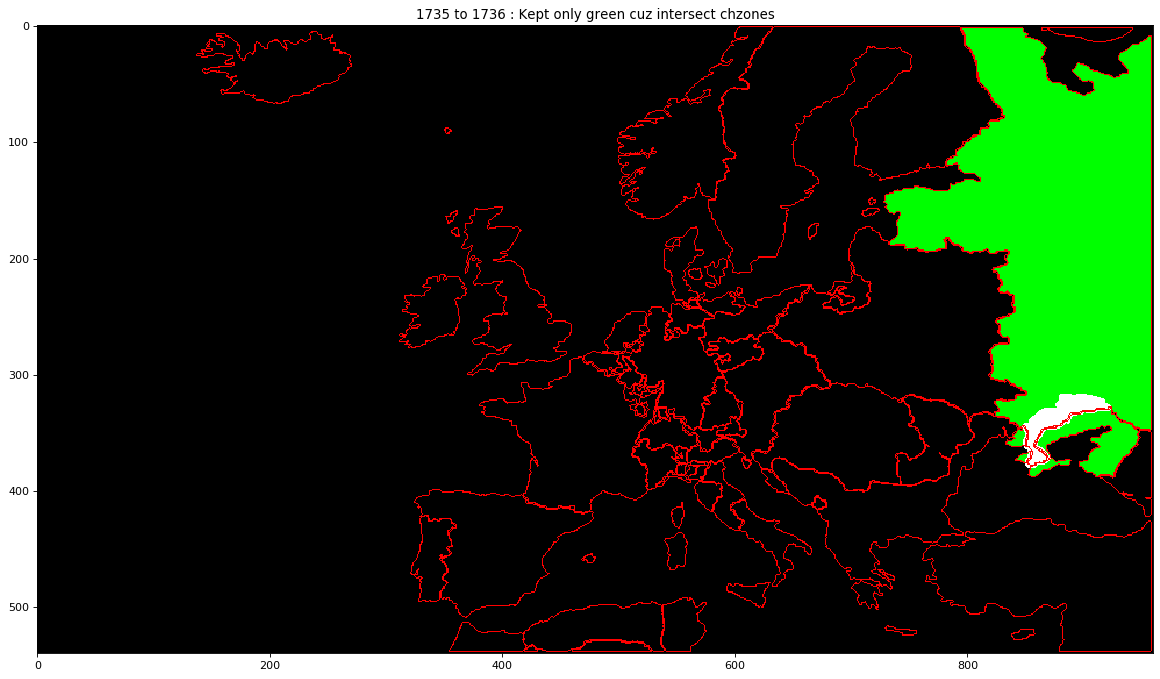


extract color and mask took 3.2132394313812256
split territory took 1.8777611255645752


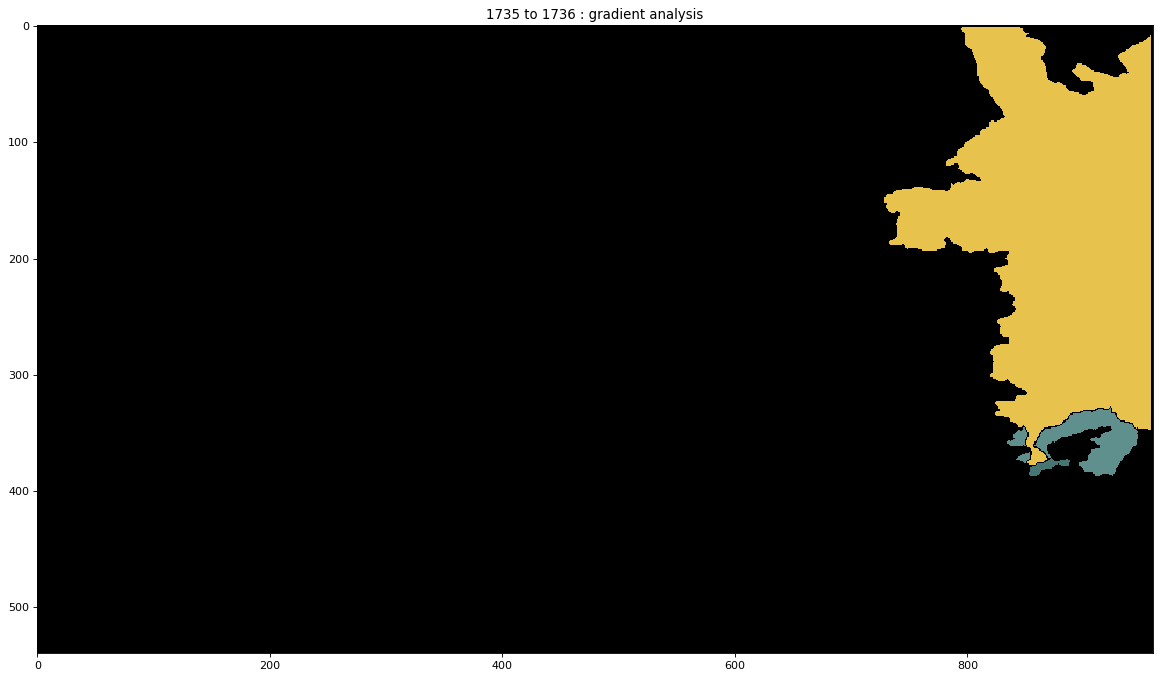

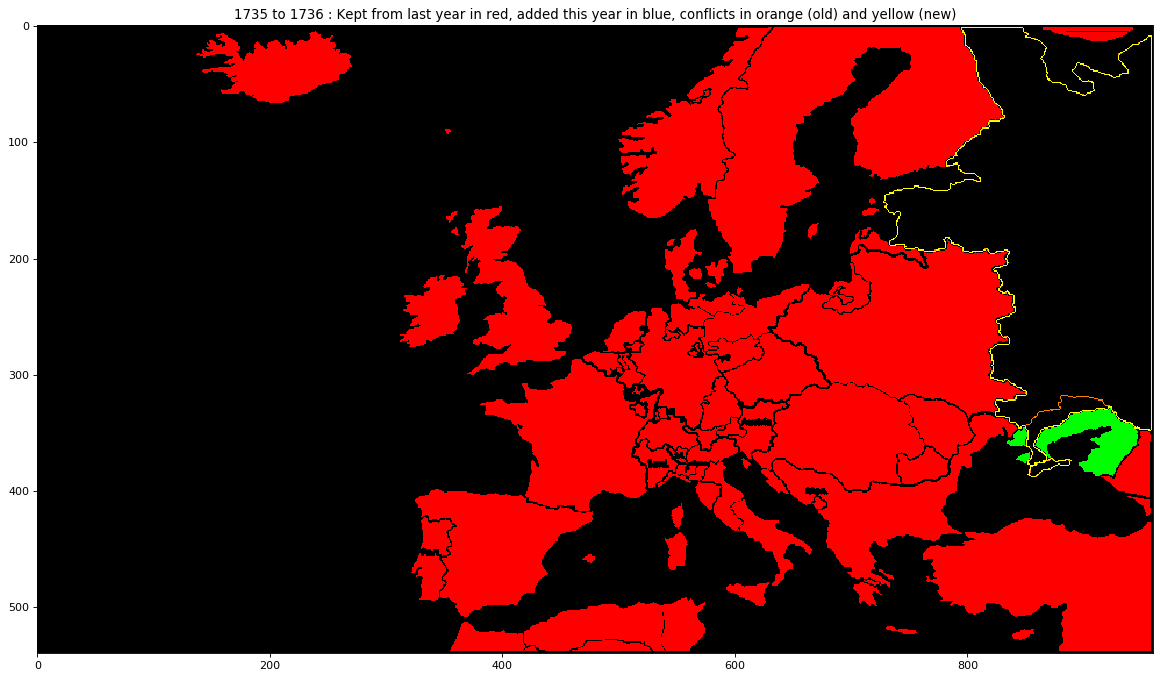

shape conflicts : (2, 2), len merged : 2


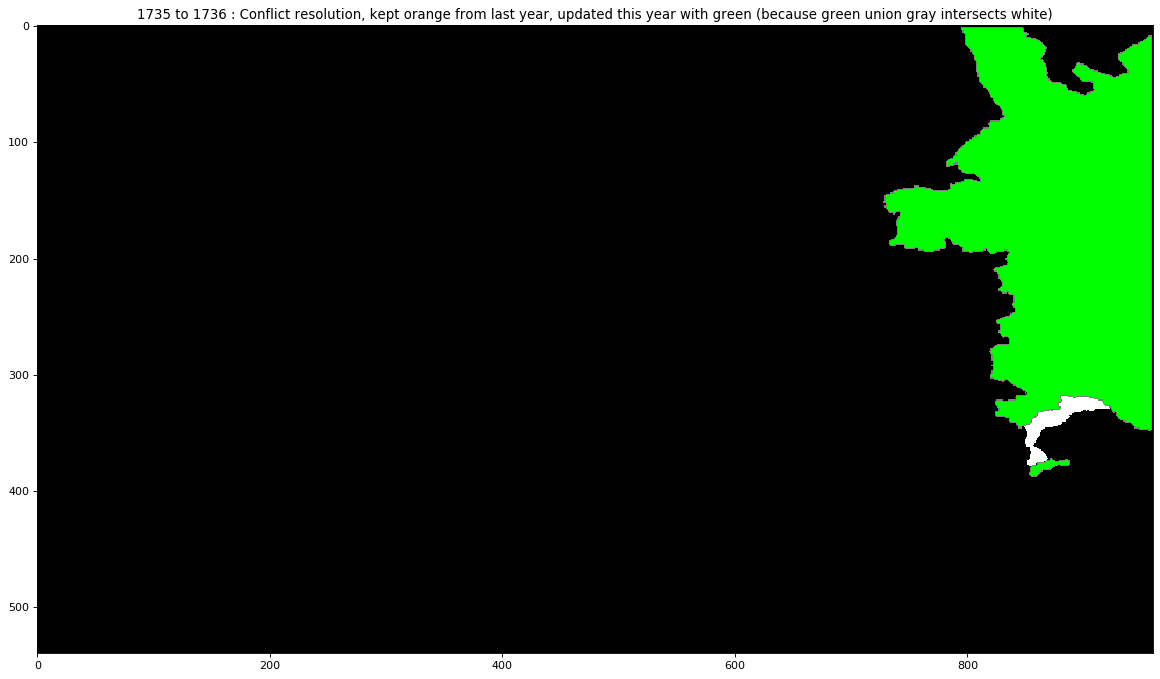

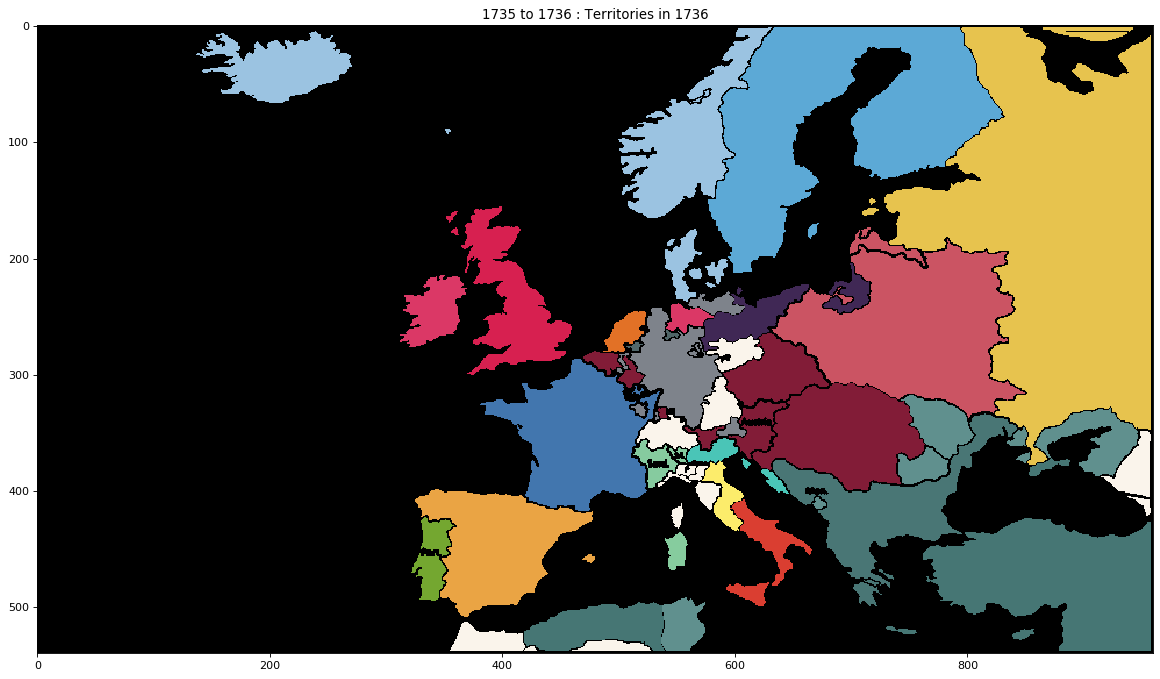

ignored 2 based on ignored_colors 


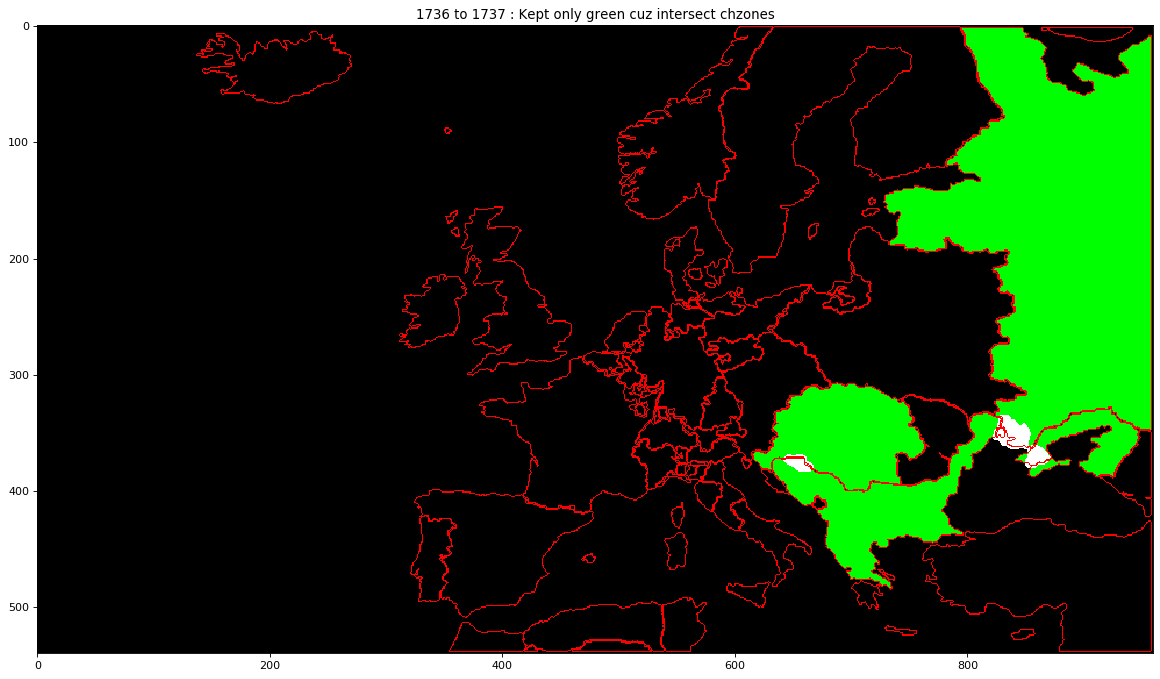


extract color and mask took 3.8305776119232178
split territory took 2.044644832611084


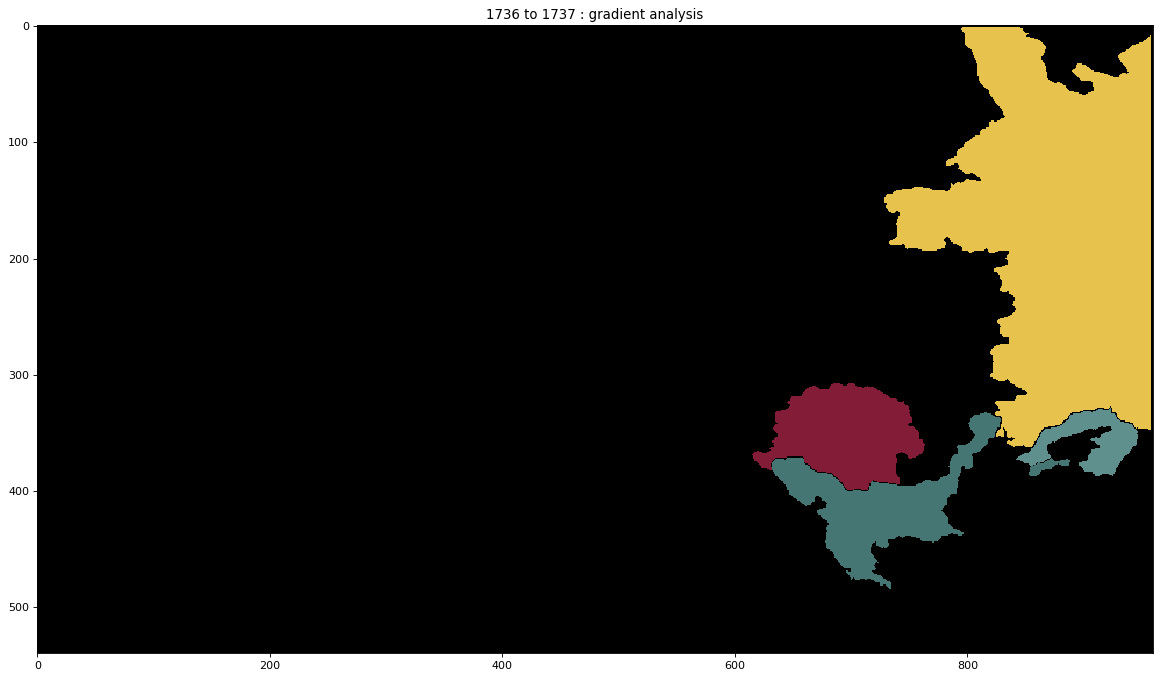

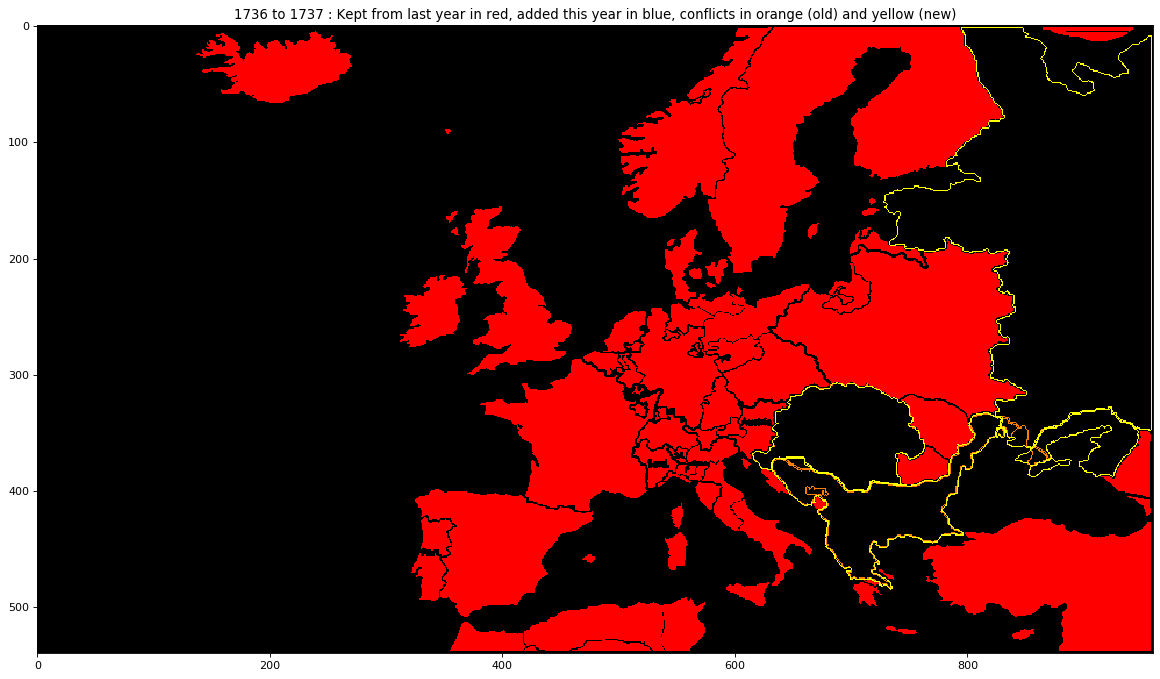

shape conflicts : (5, 2), len merged : 5


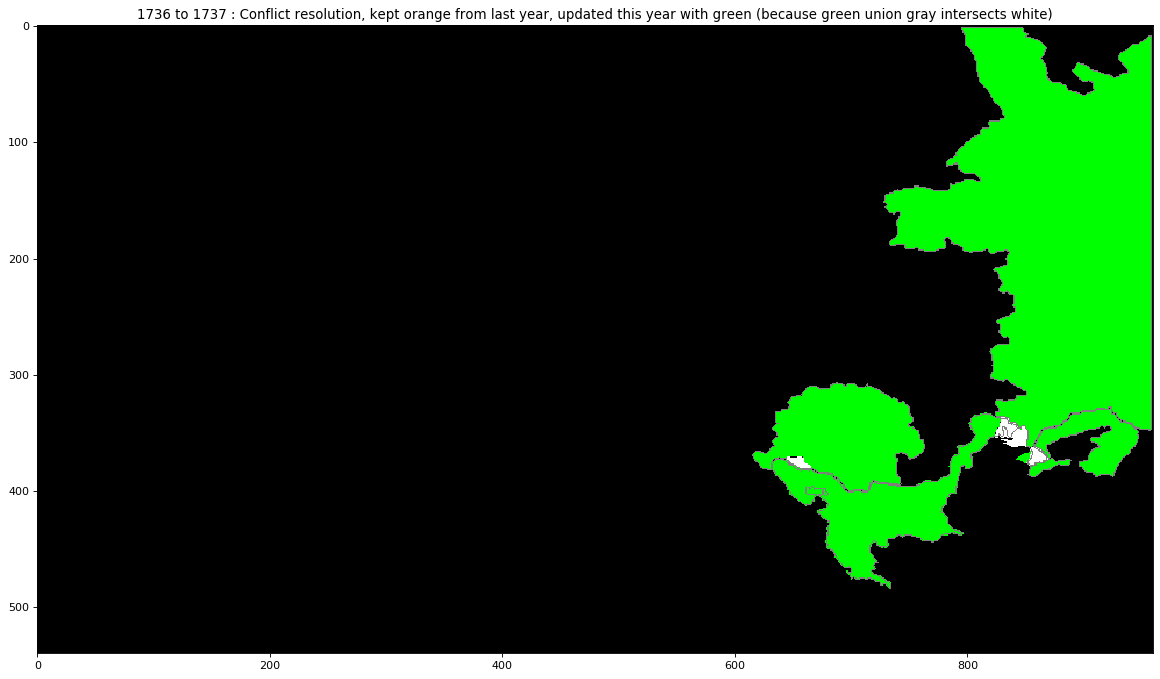

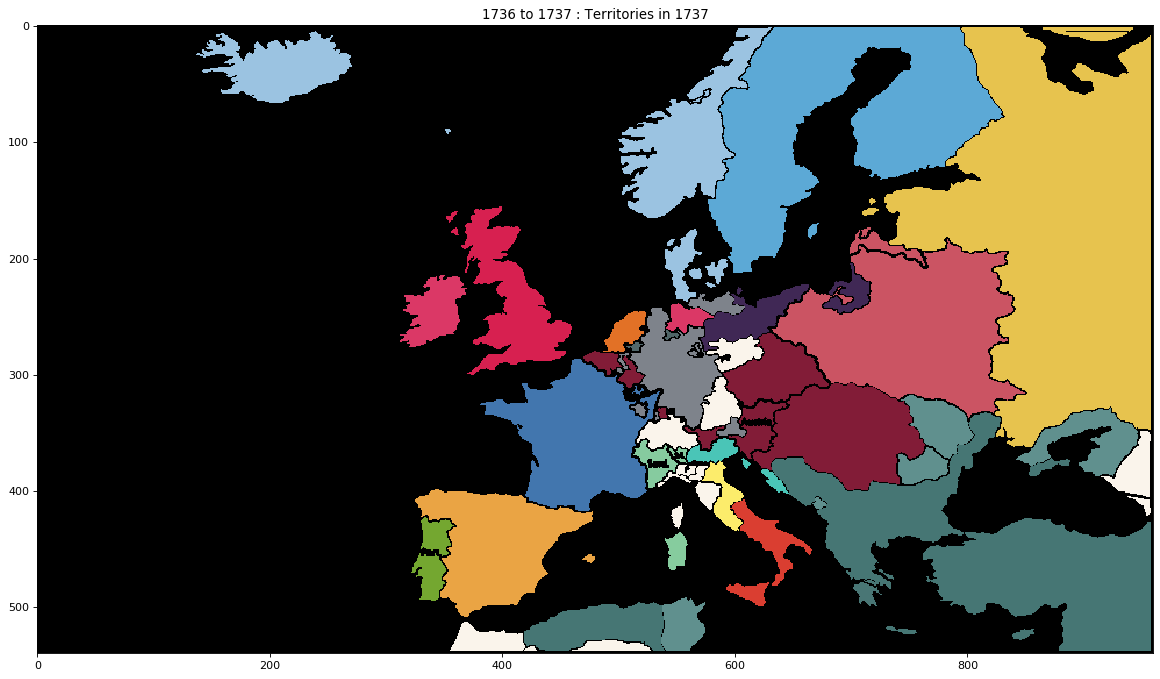

ignored 2 based on ignored_colors 


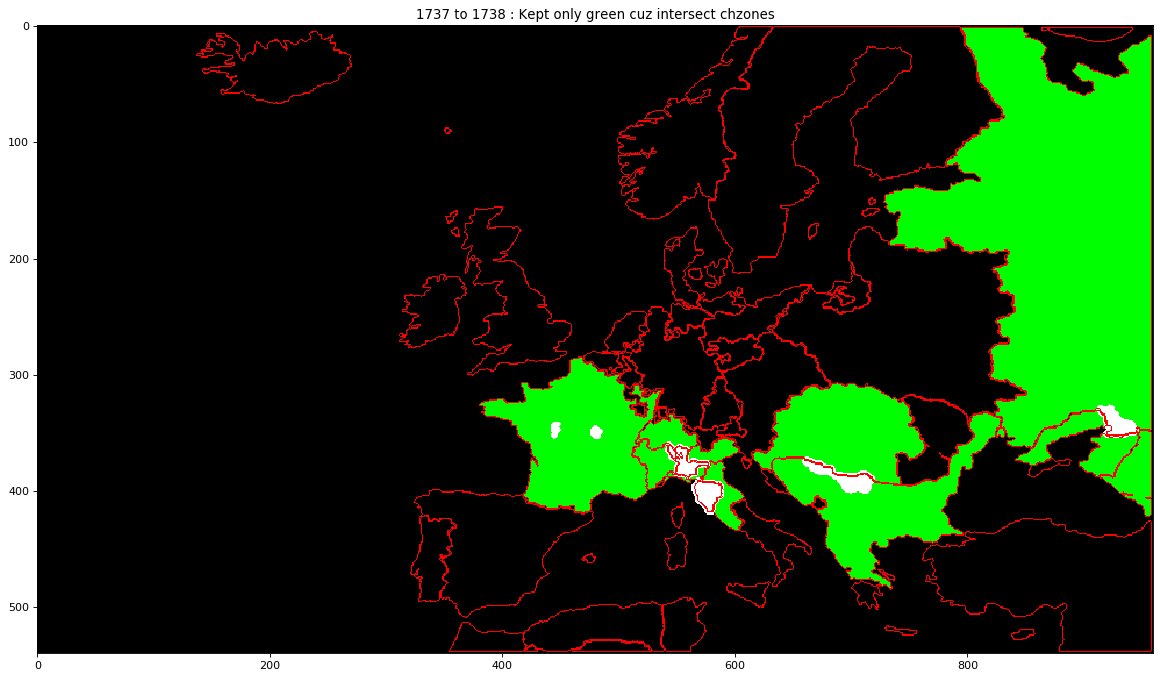


extract color and mask took 5.596386432647705
split territory took 6.7825703620910645


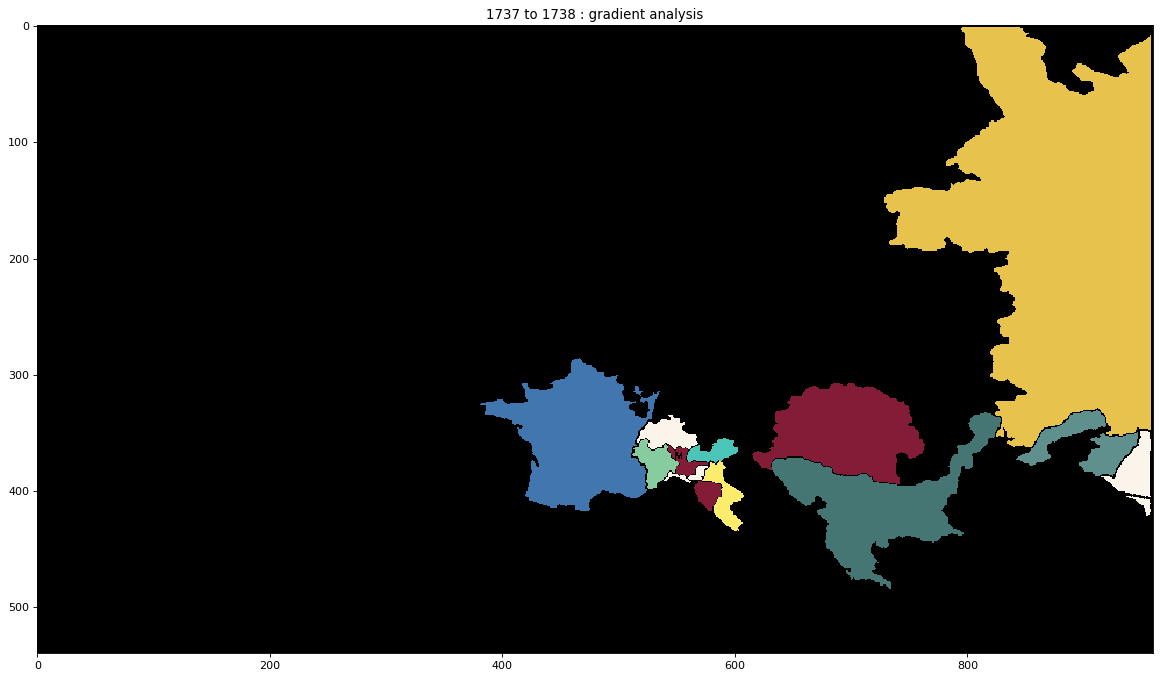

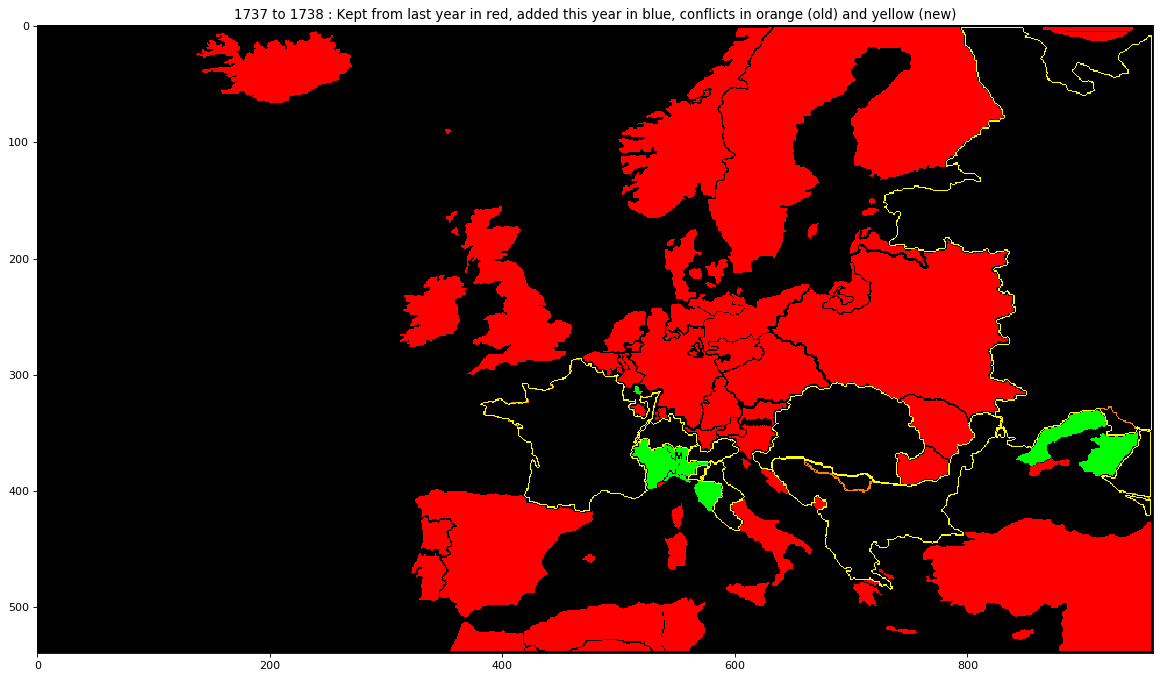

shape conflicts : (10, 2), len merged : 10


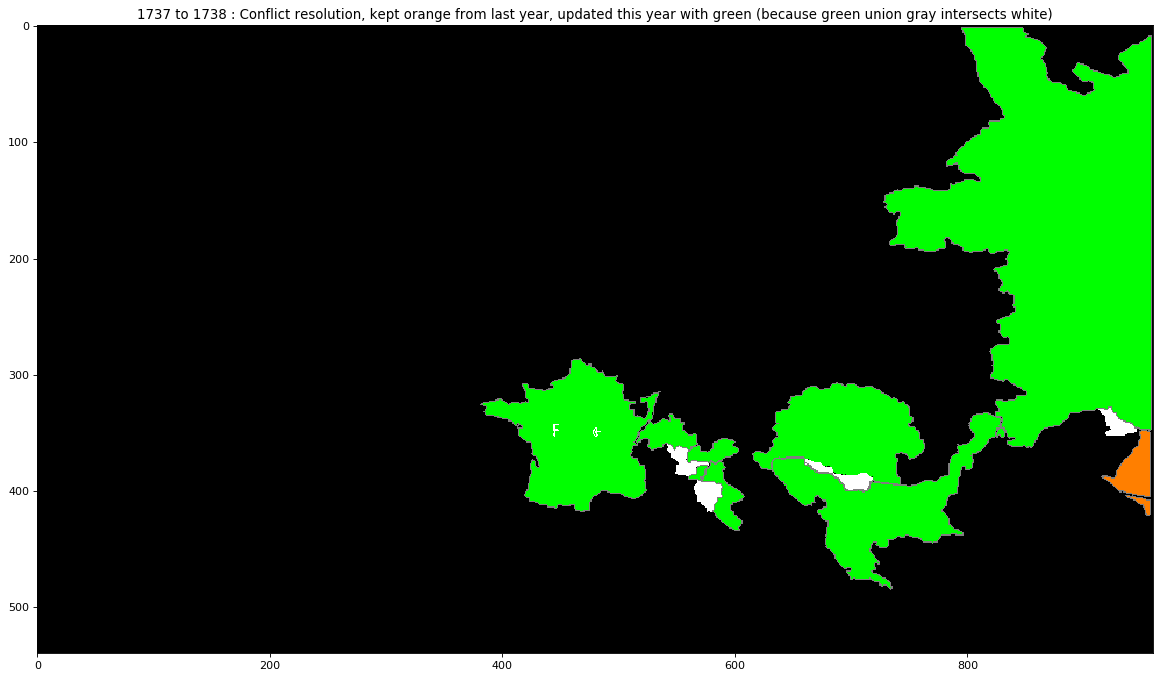

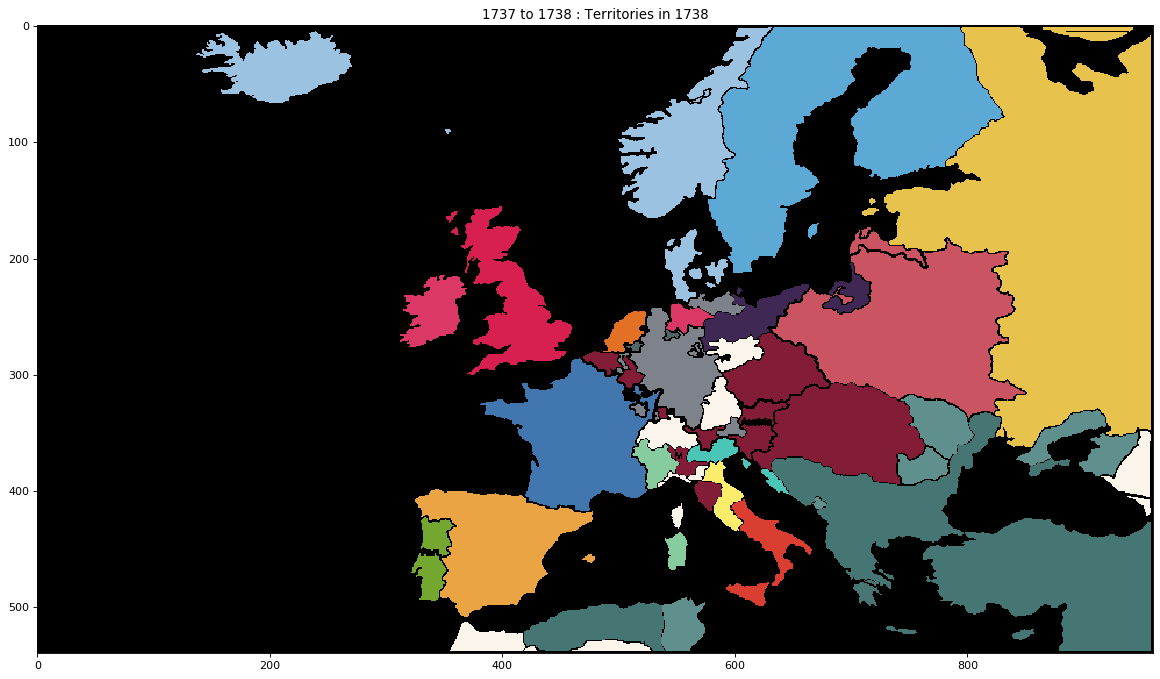

ignored 2 based on ignored_colors 


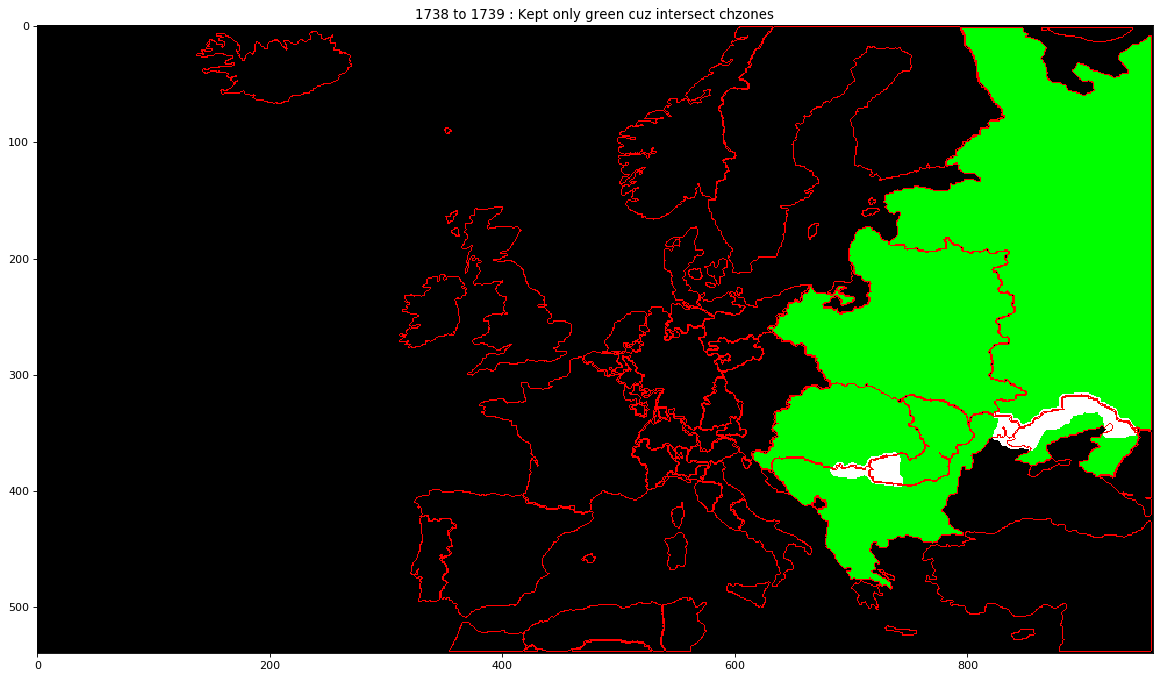


extract color and mask took 4.848039865493774
split territory took 2.507028579711914


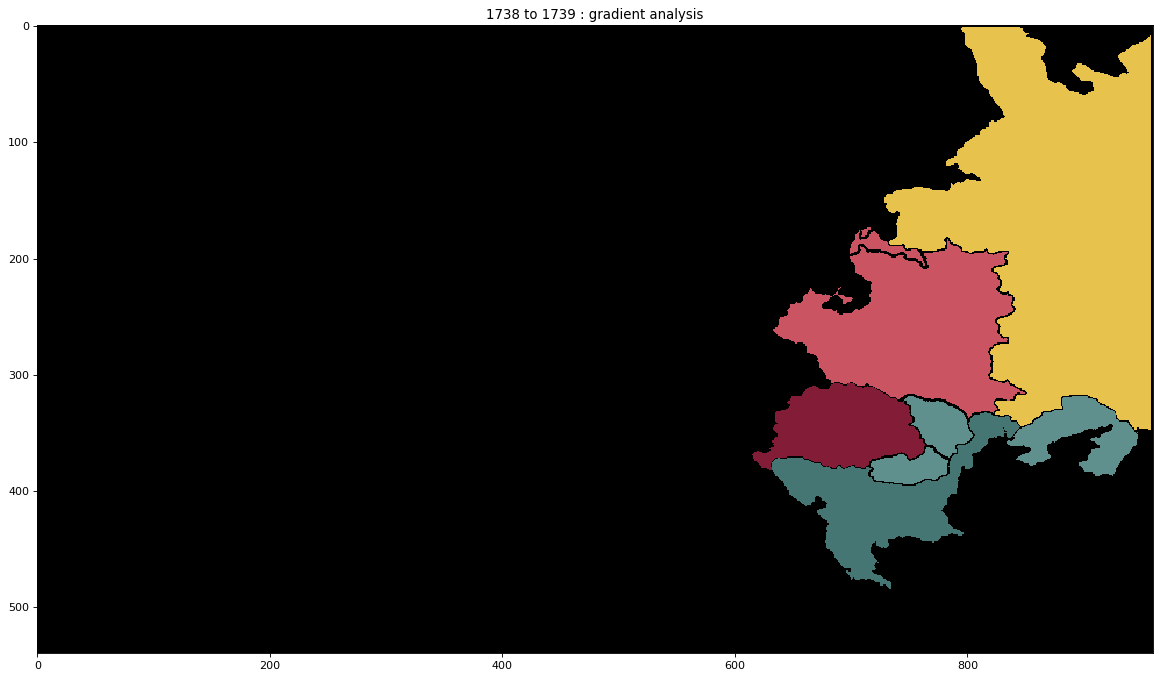

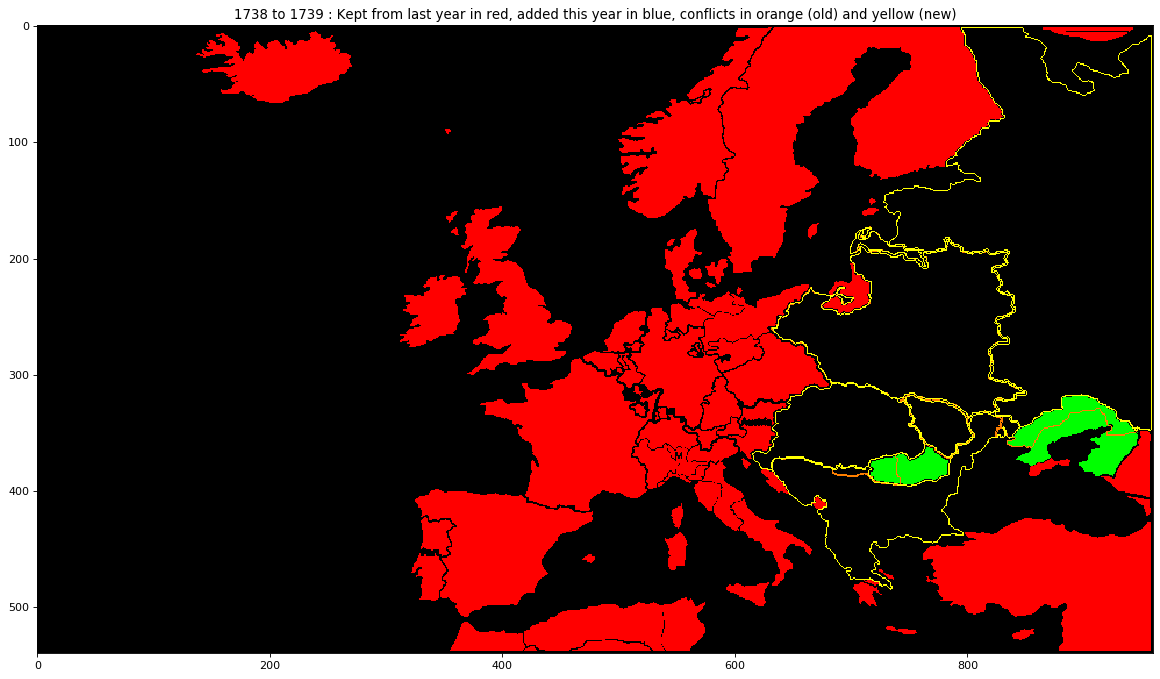

shape conflicts : (7, 2), len merged : 7


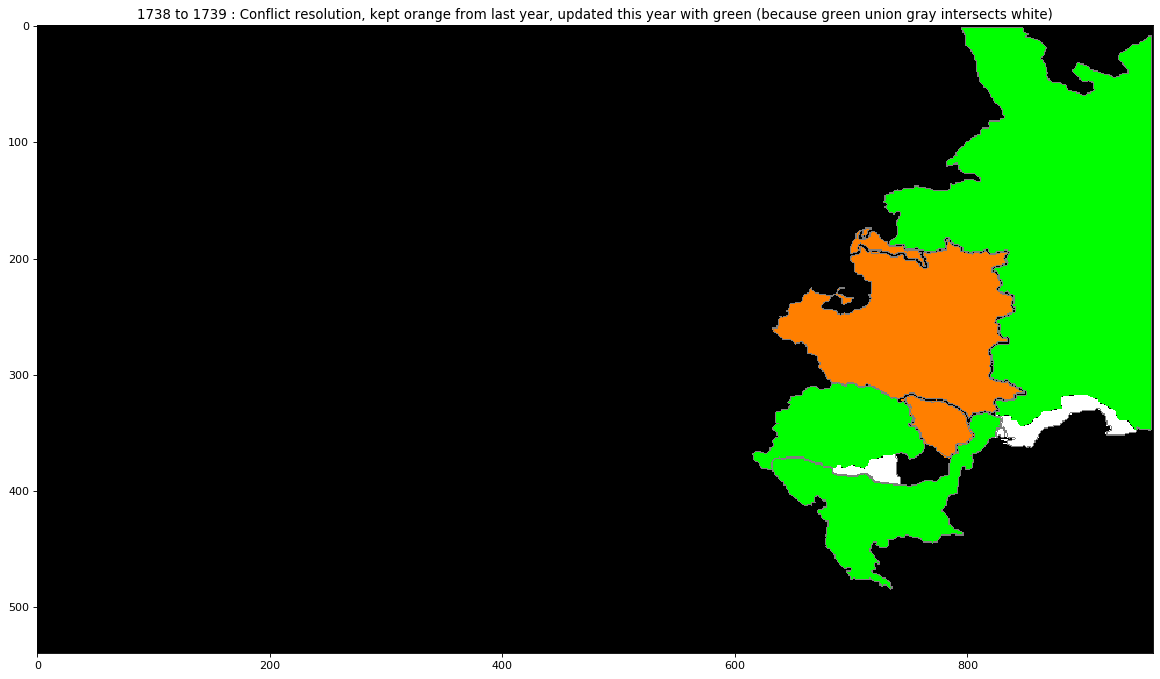

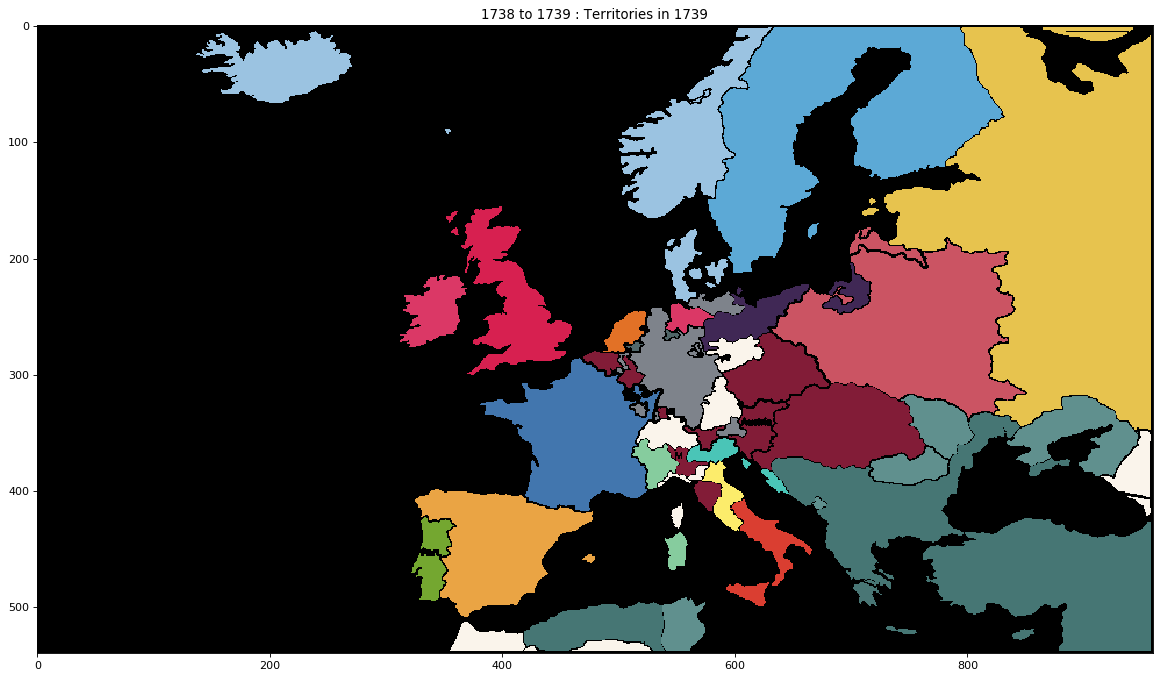

ignored 2 based on ignored_colors 


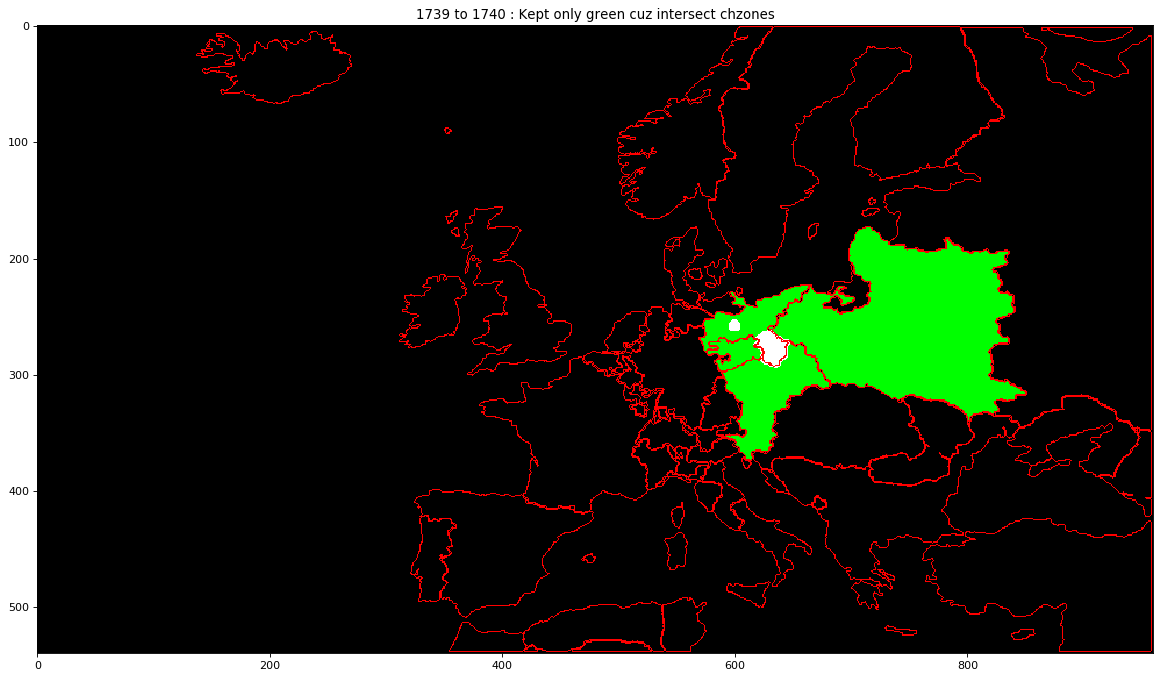


extract color and mask took 1.3125388622283936
split territory took 1.6347343921661377


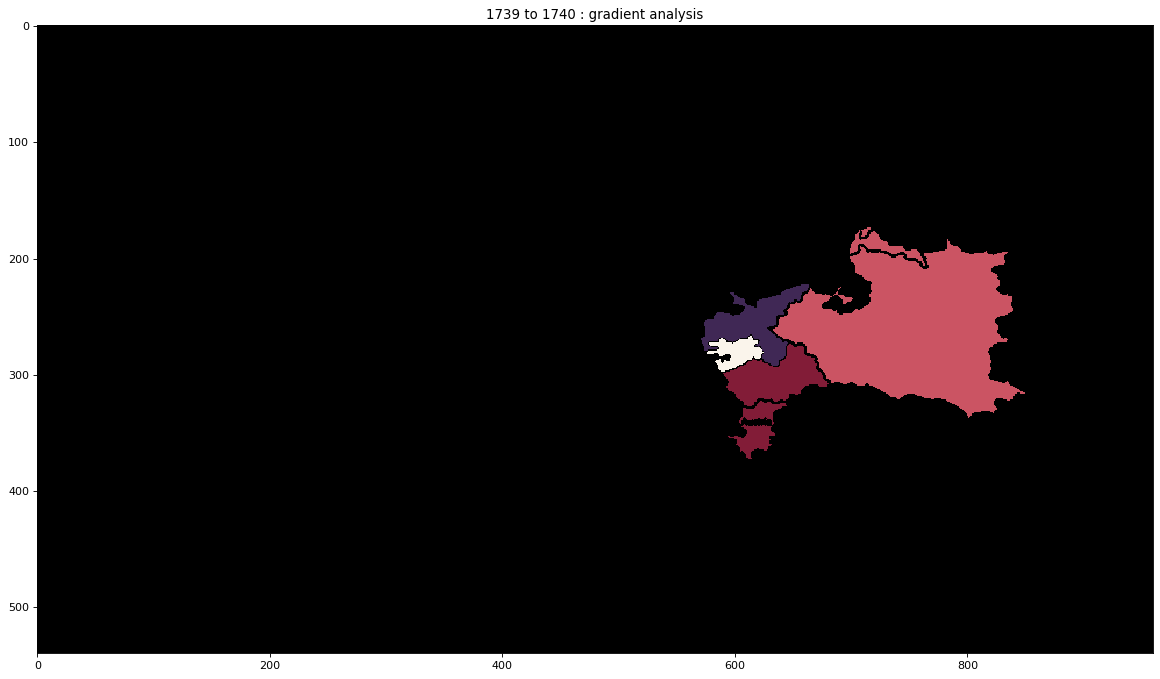

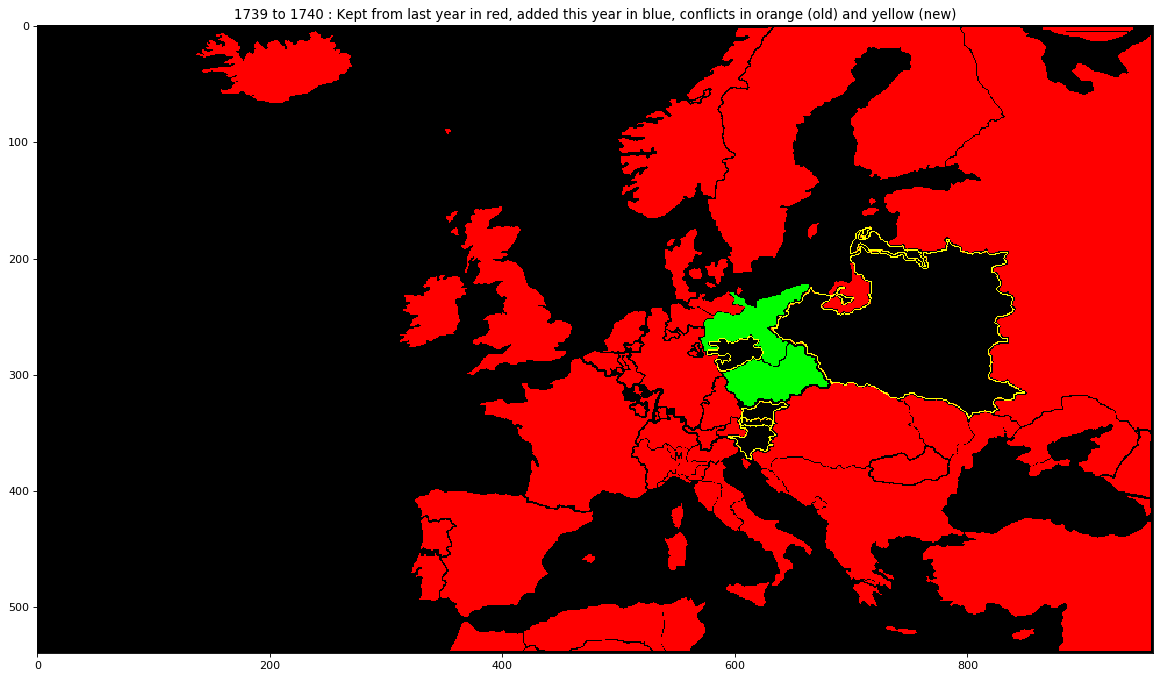

shape conflicts : (5, 2), len merged : 5


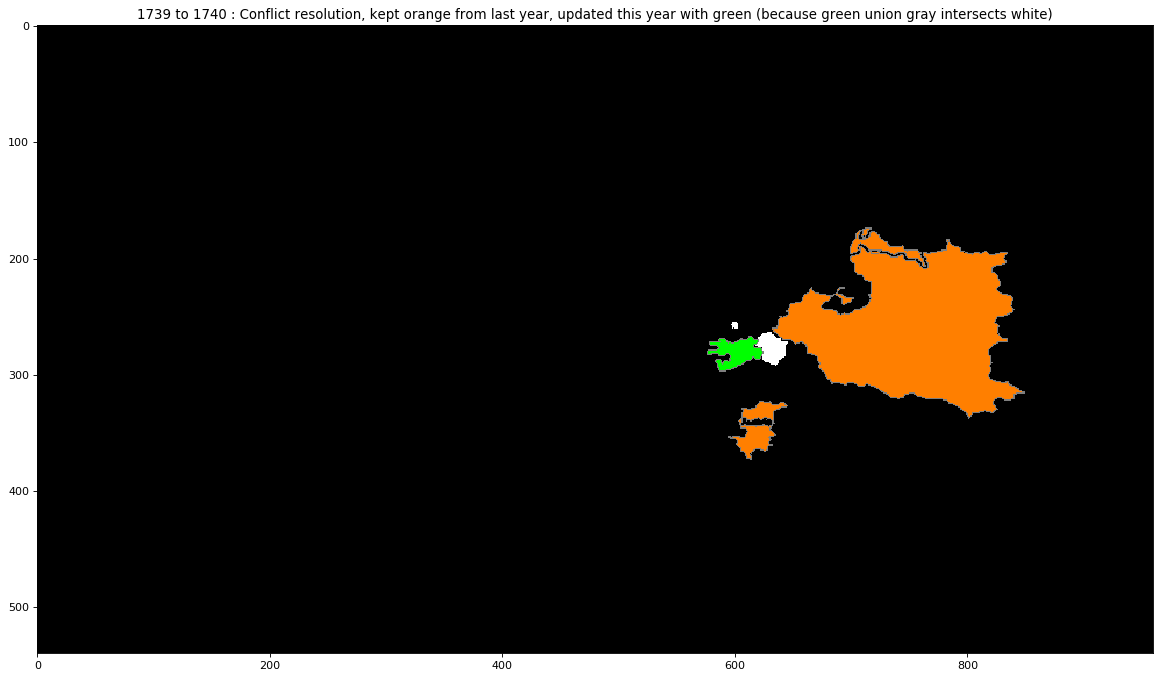

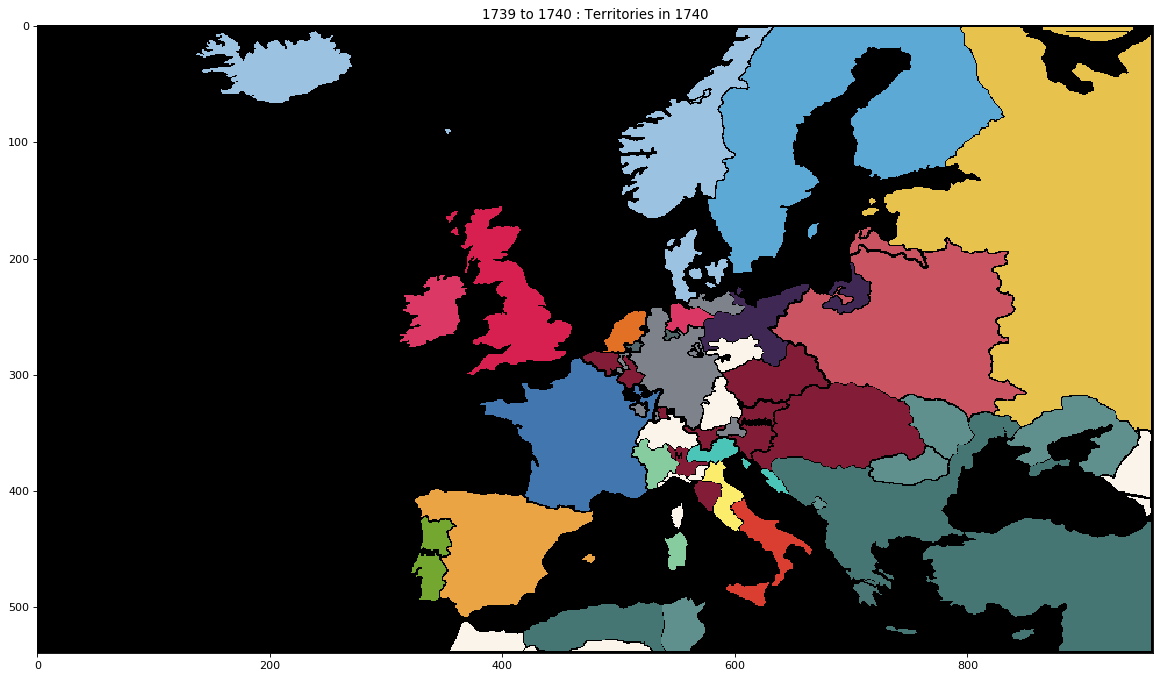

ignored 2 based on ignored_colors 


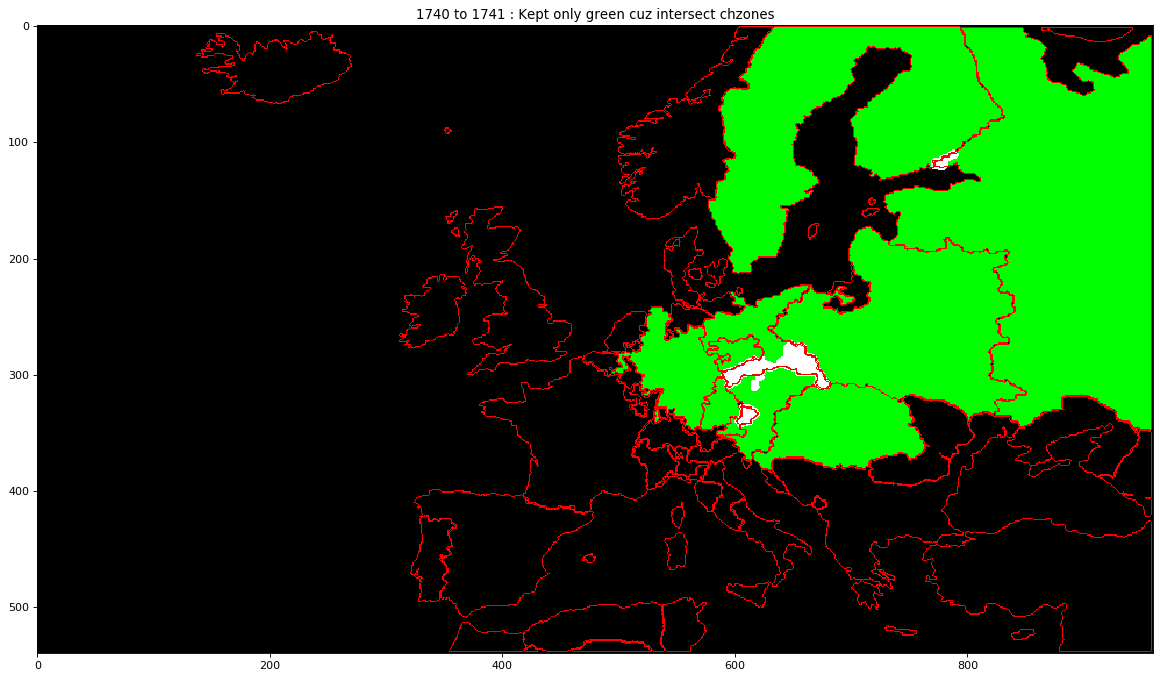


extract color and mask took 5.840301275253296
split territory took 4.112320184707642


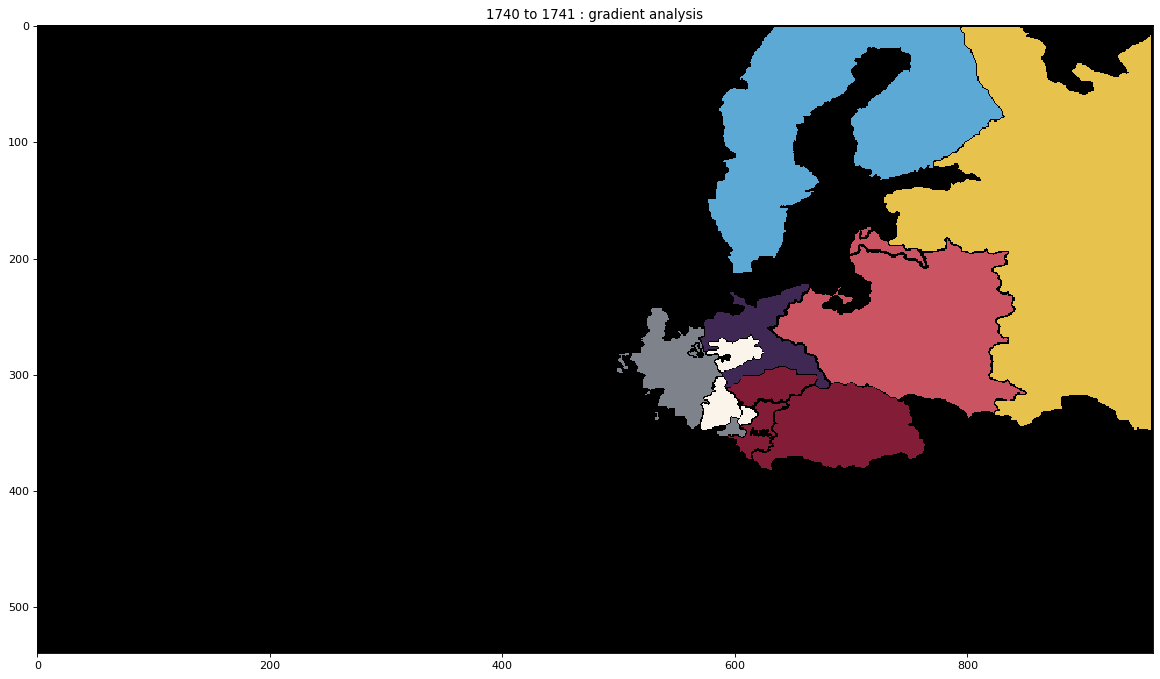

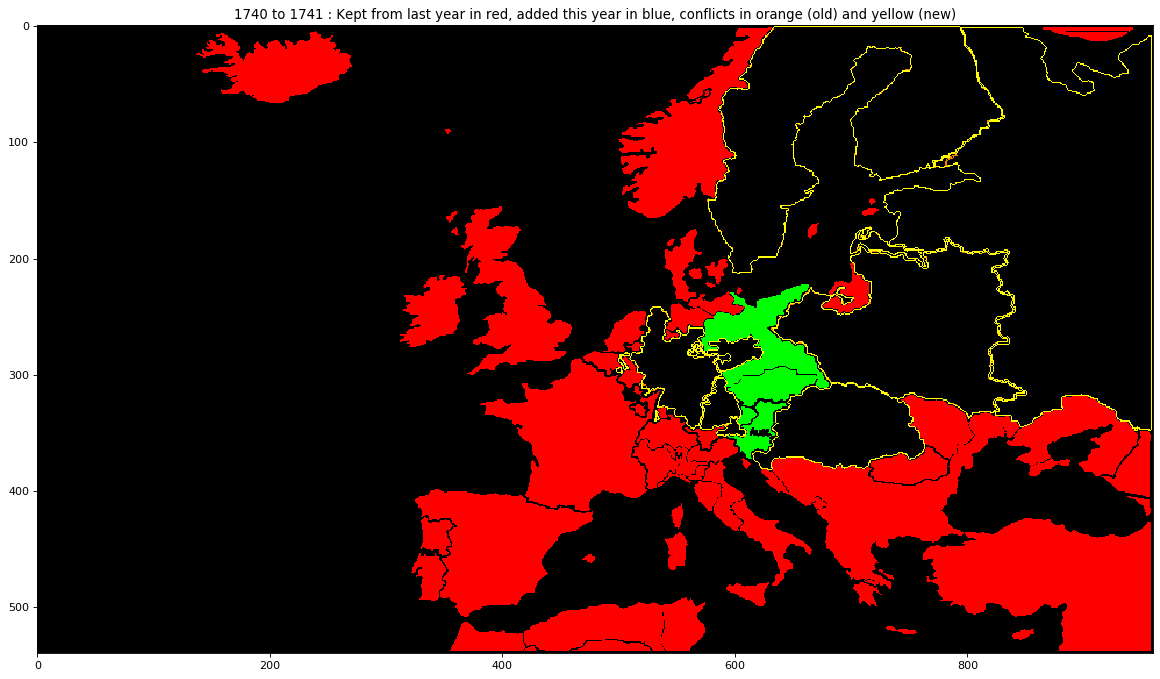

shape conflicts : (14, 2), len merged : 14


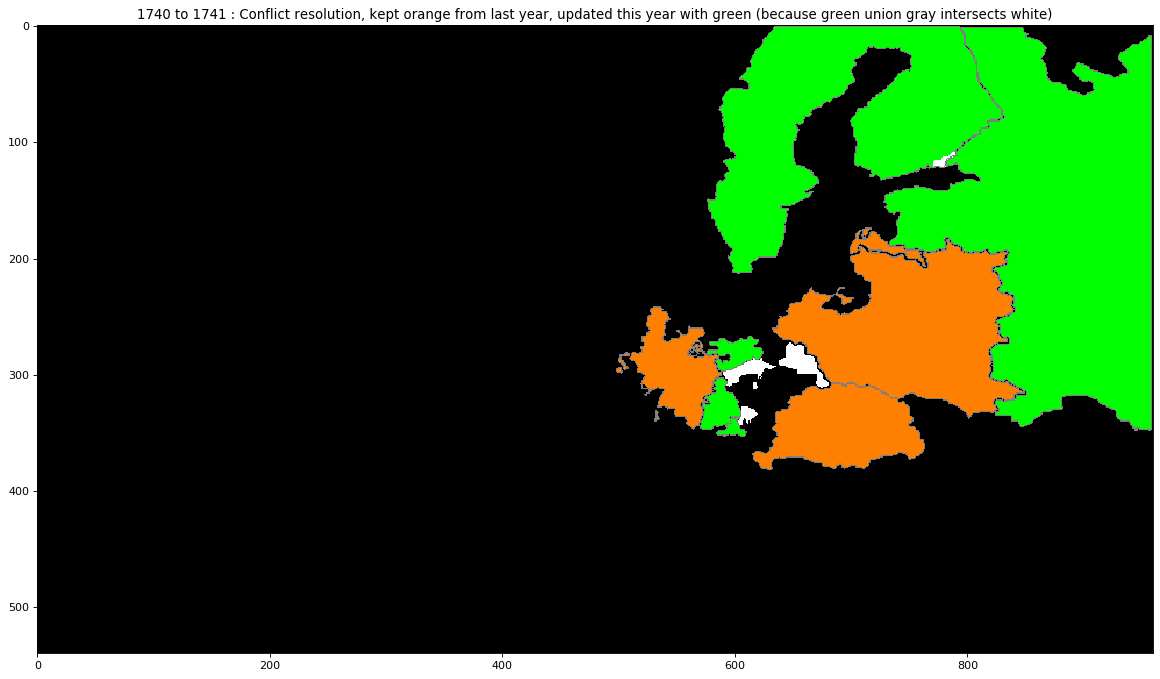

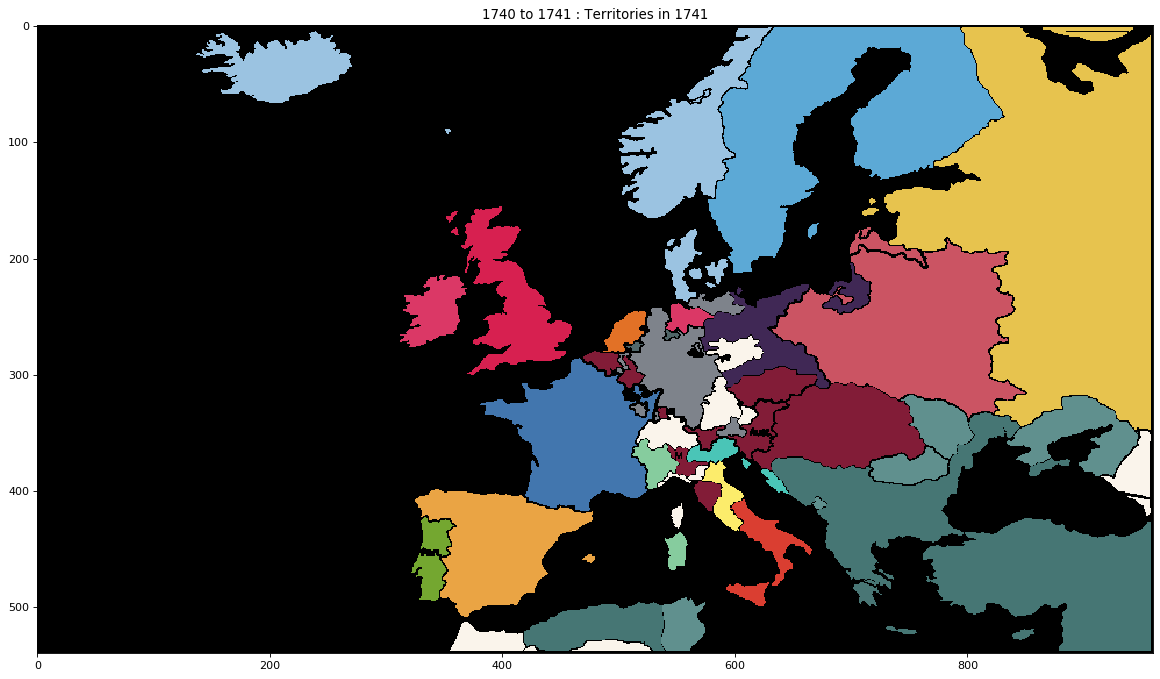

ignored 2 based on ignored_colors 


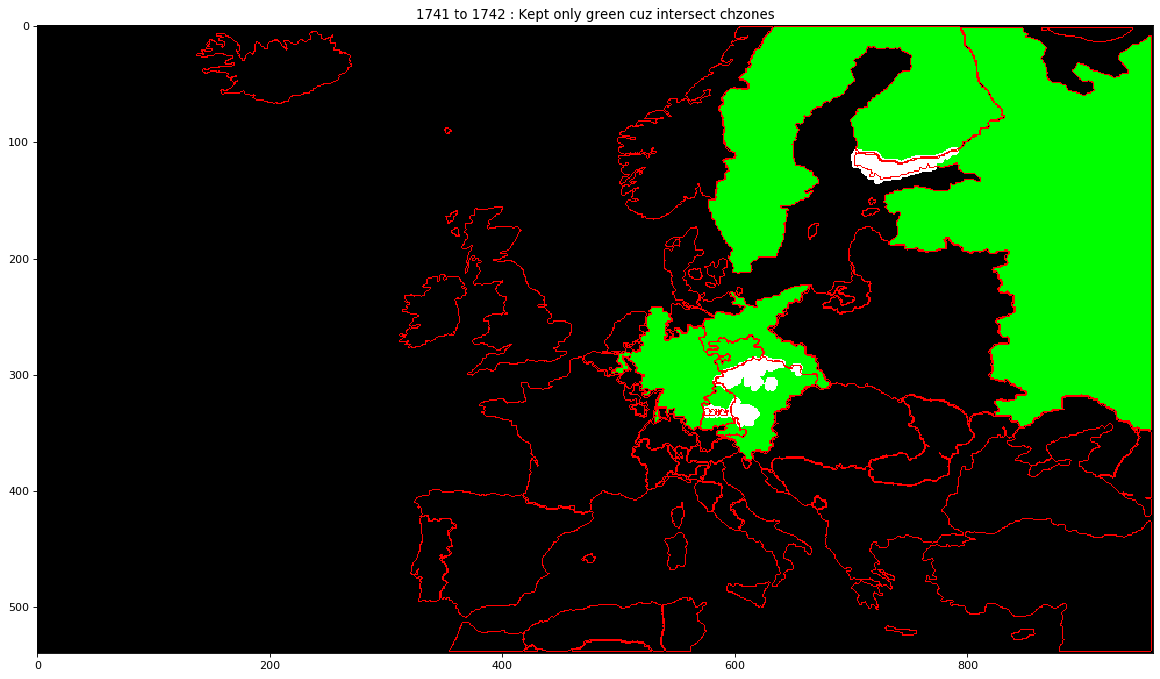


extract color and mask took 5.468914985656738
split territory took 2.9985127449035645


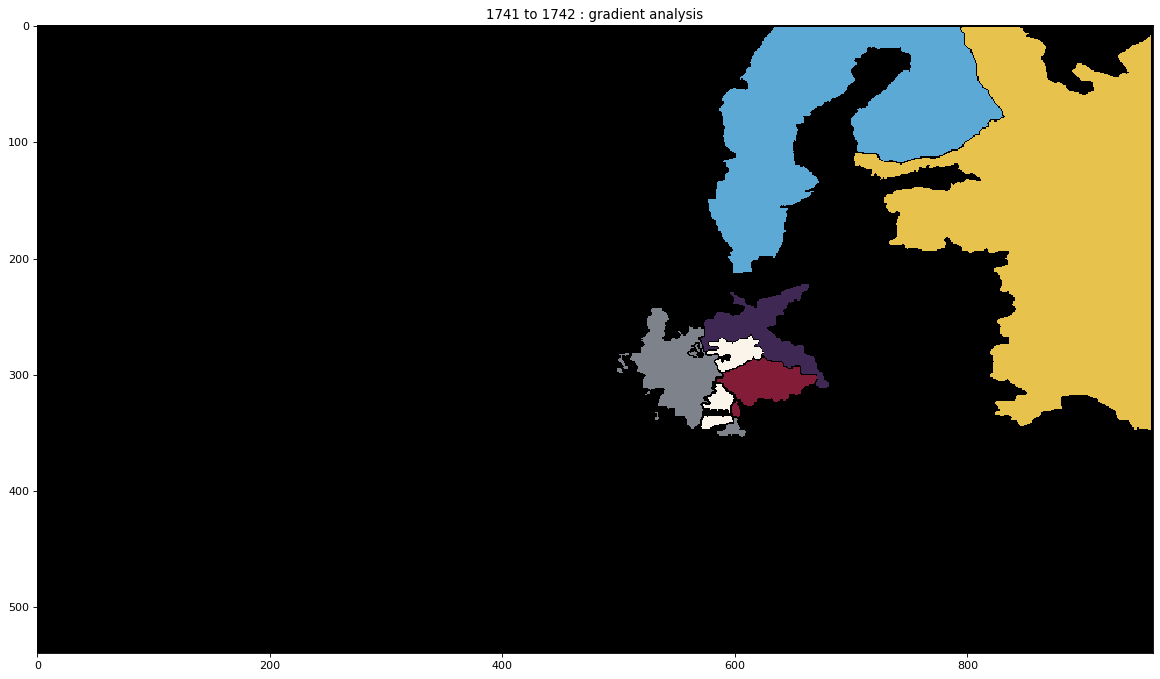

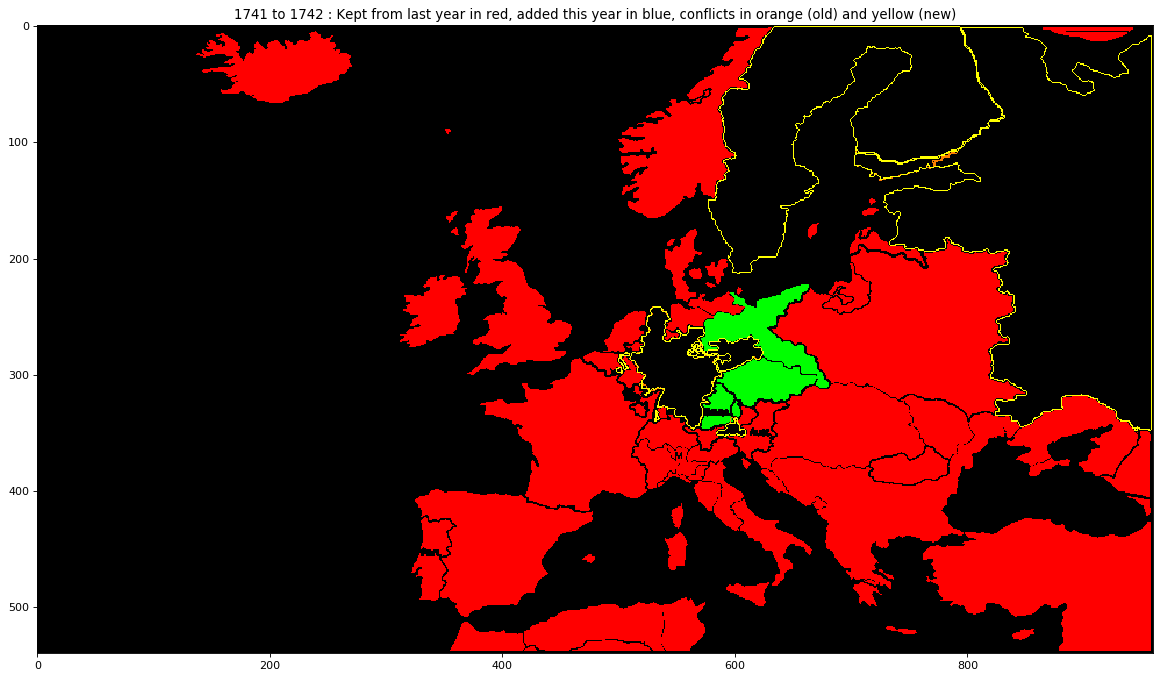

shape conflicts : (9, 2), len merged : 9


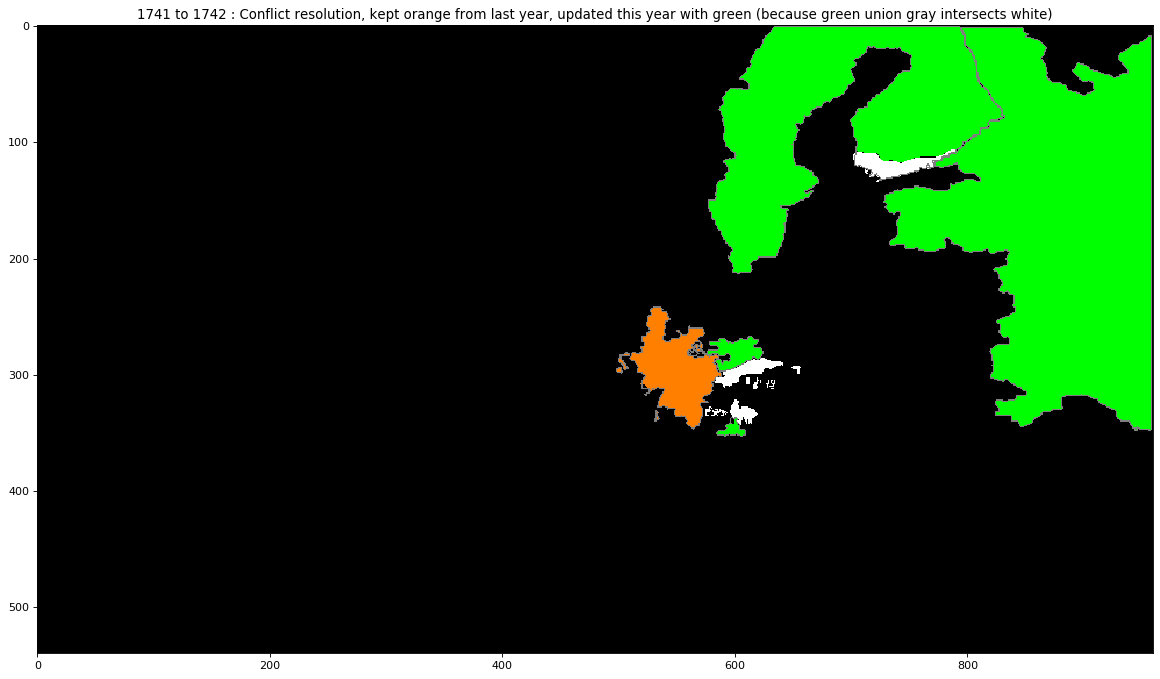

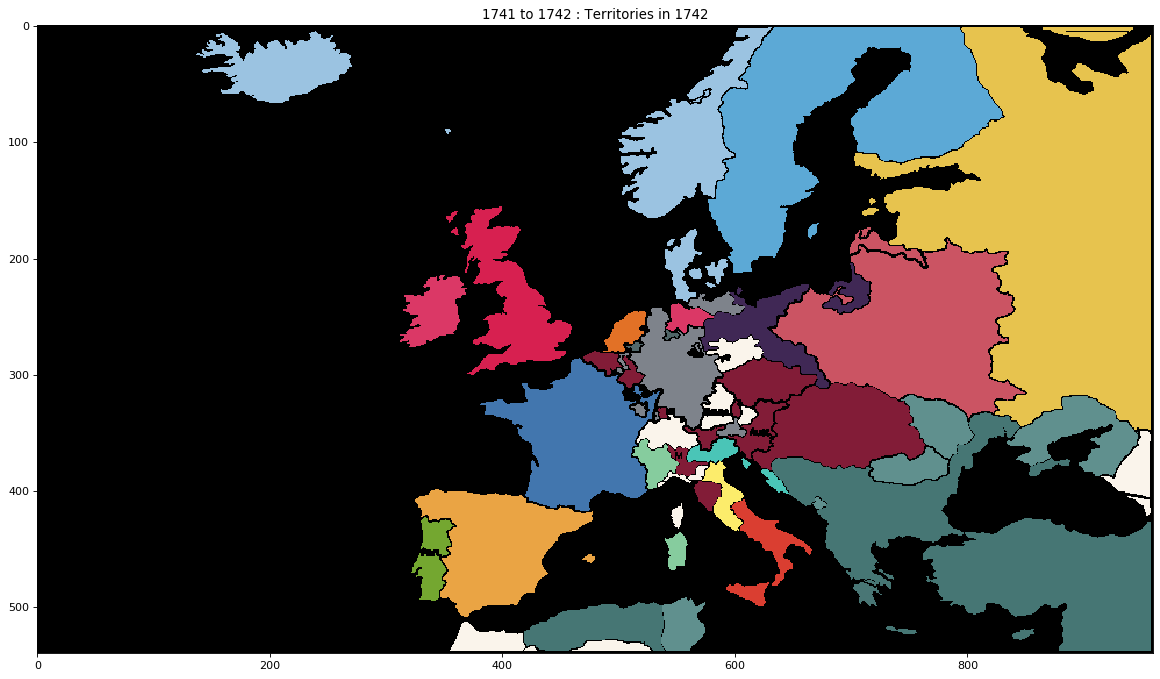

ignored 2 based on ignored_colors 


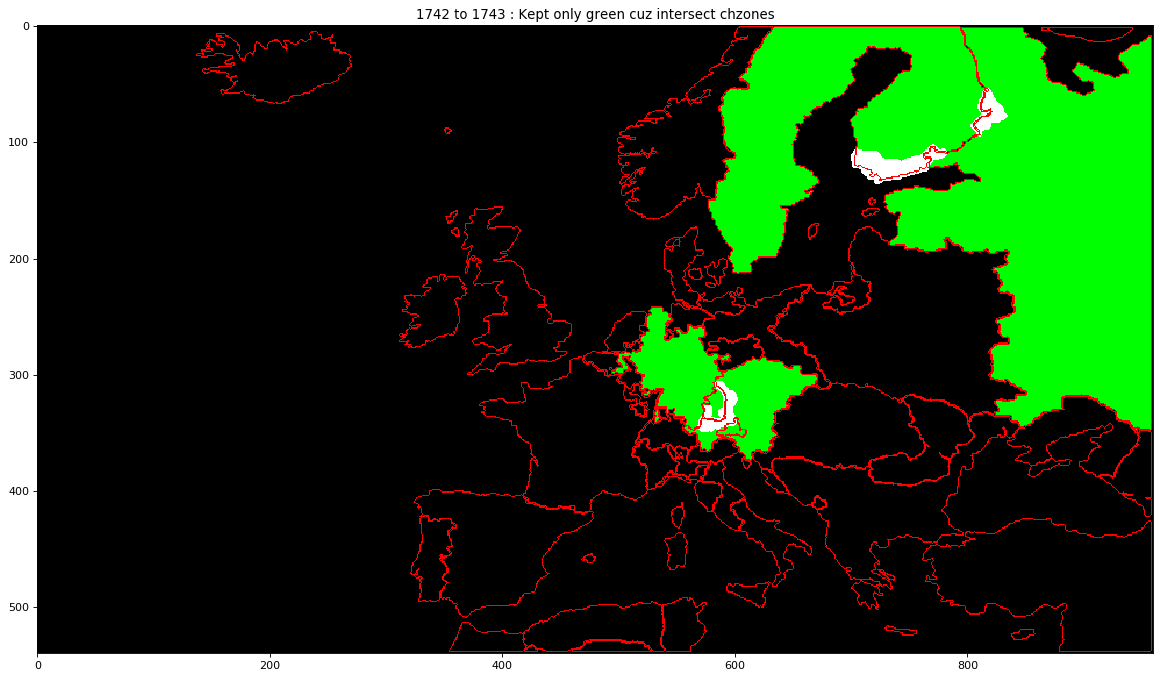


extract color and mask took 4.586321830749512
split territory took 2.280256509780884


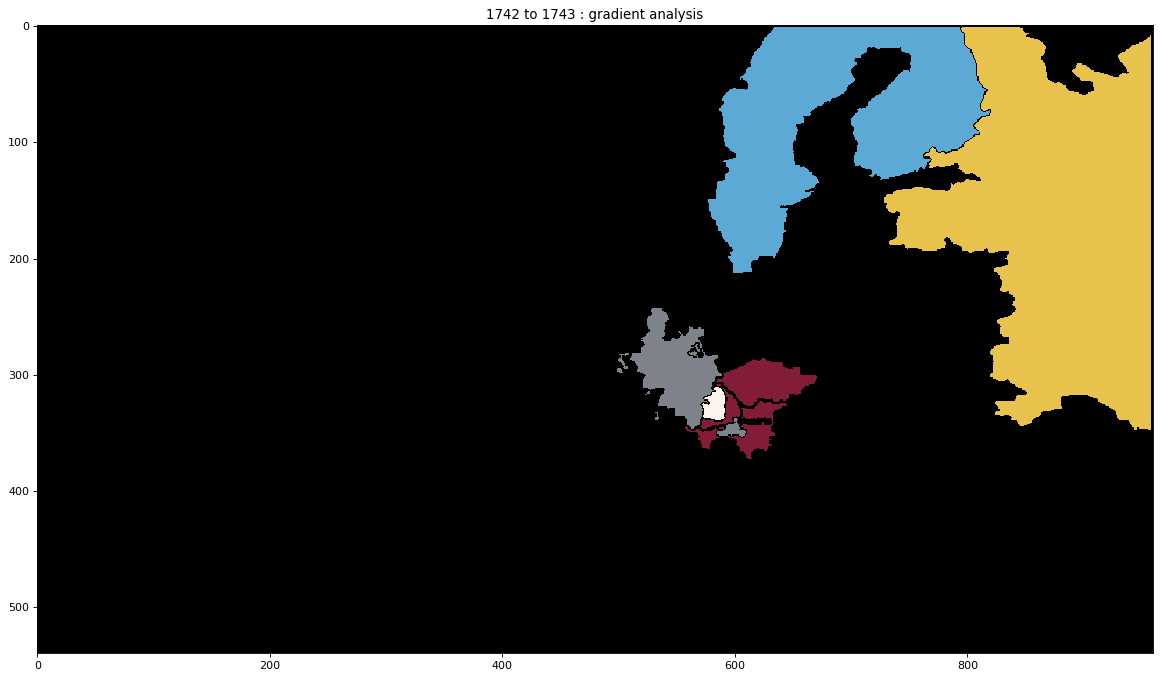

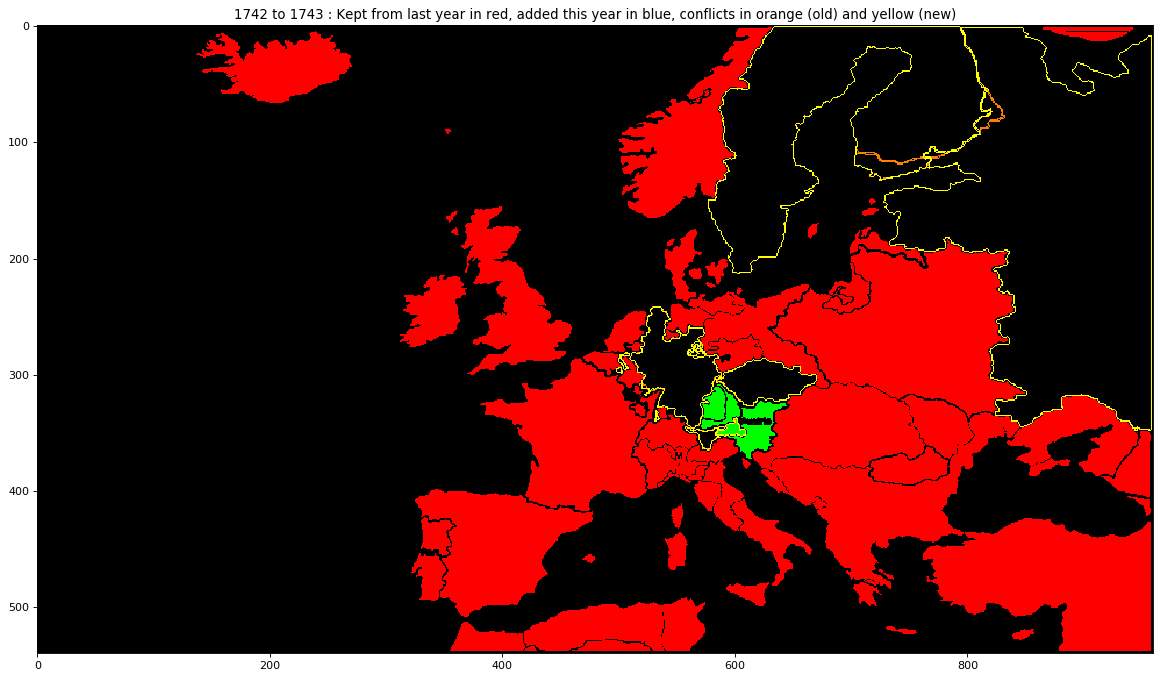

shape conflicts : (10, 2), len merged : 10


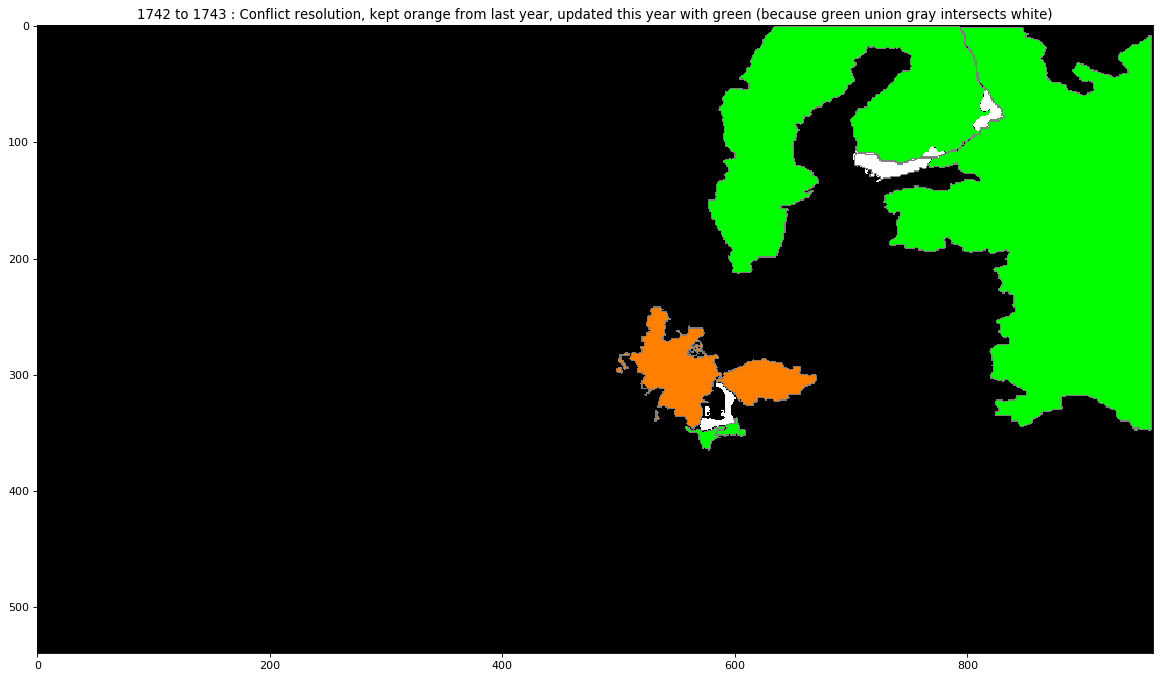

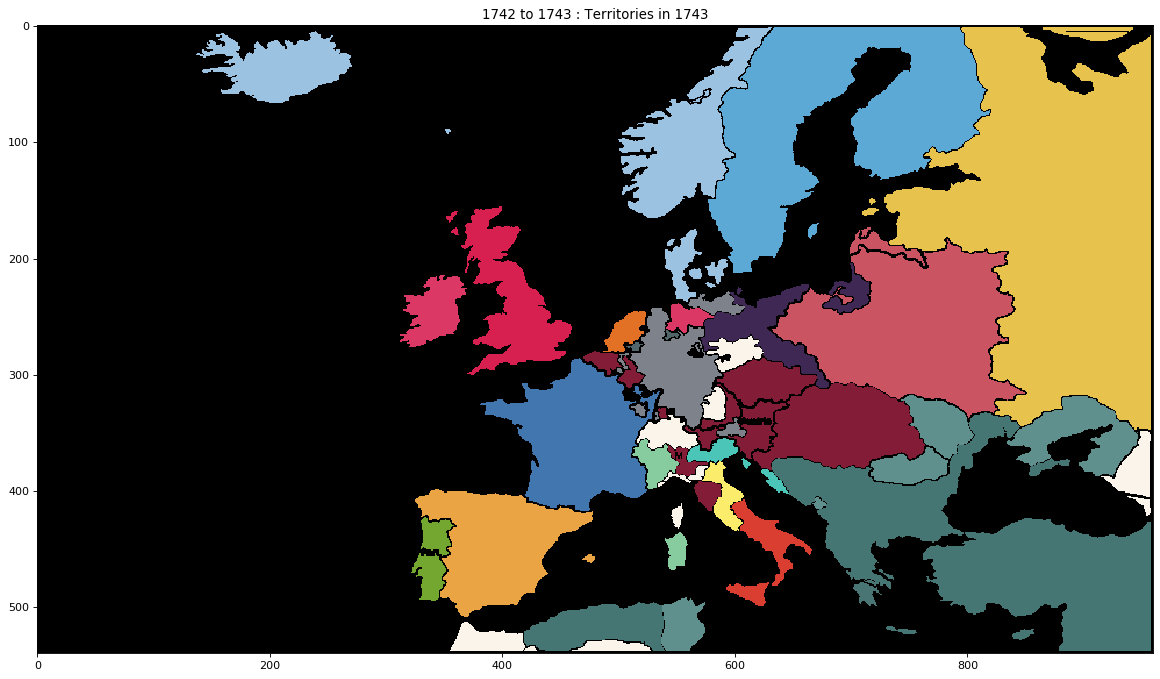

ignored 2 based on ignored_colors 


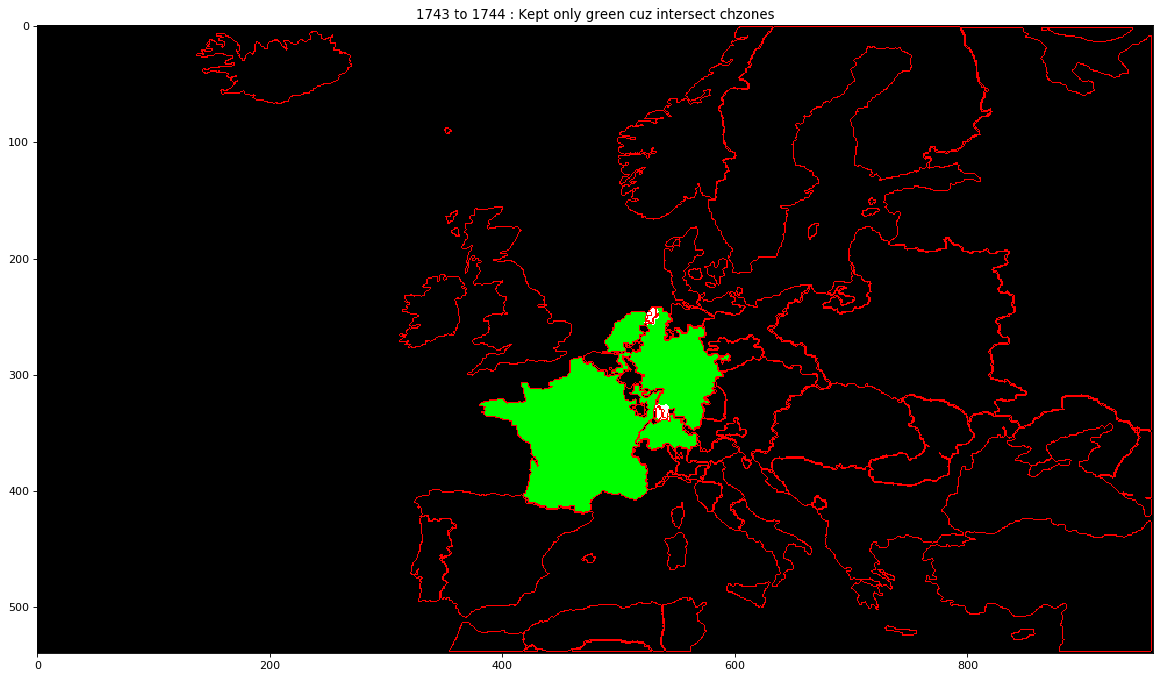


extract color and mask took 0.8789980411529541
split territory took 2.1626391410827637


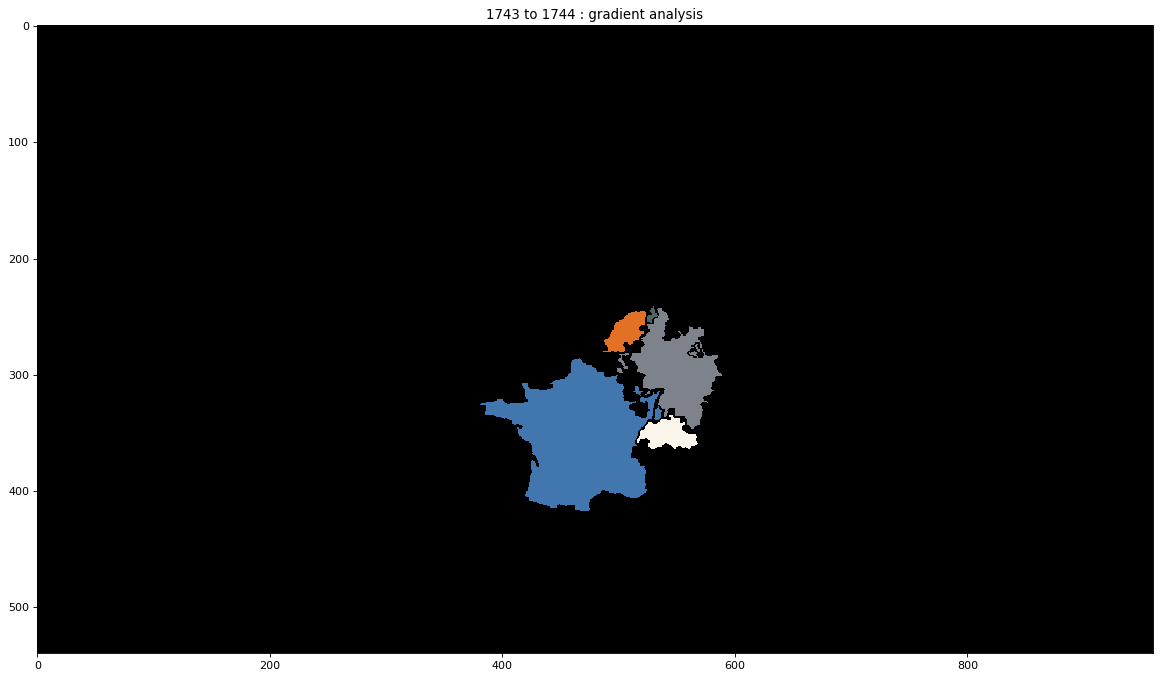

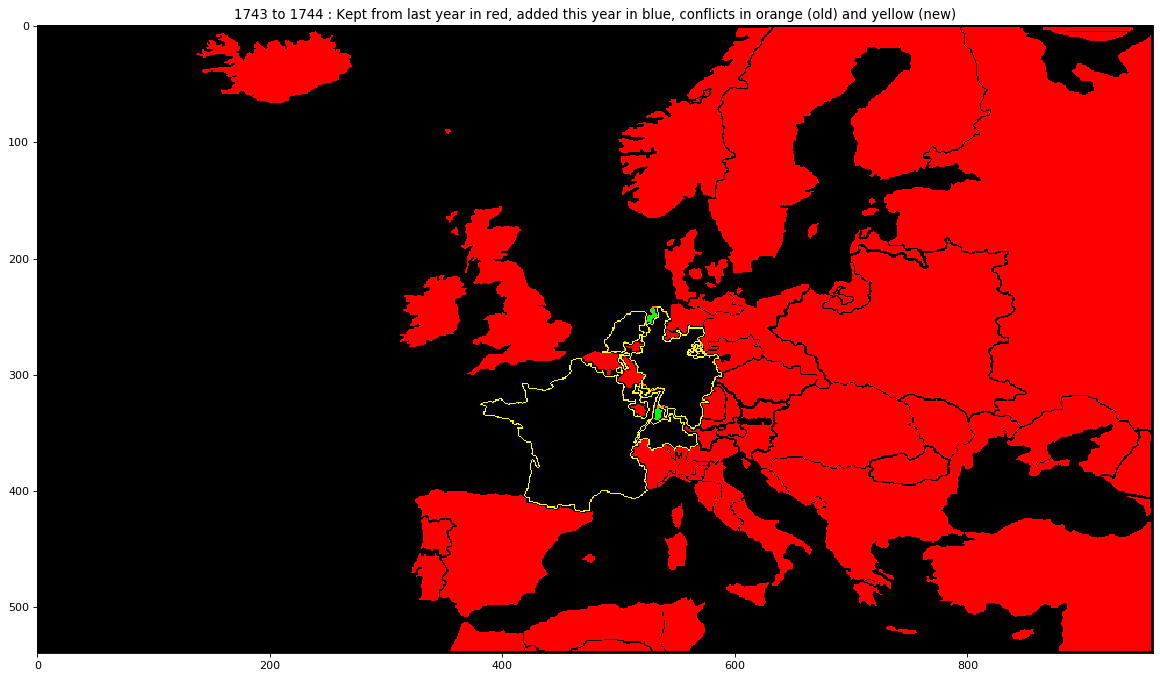

shape conflicts : (8, 2), len merged : 8


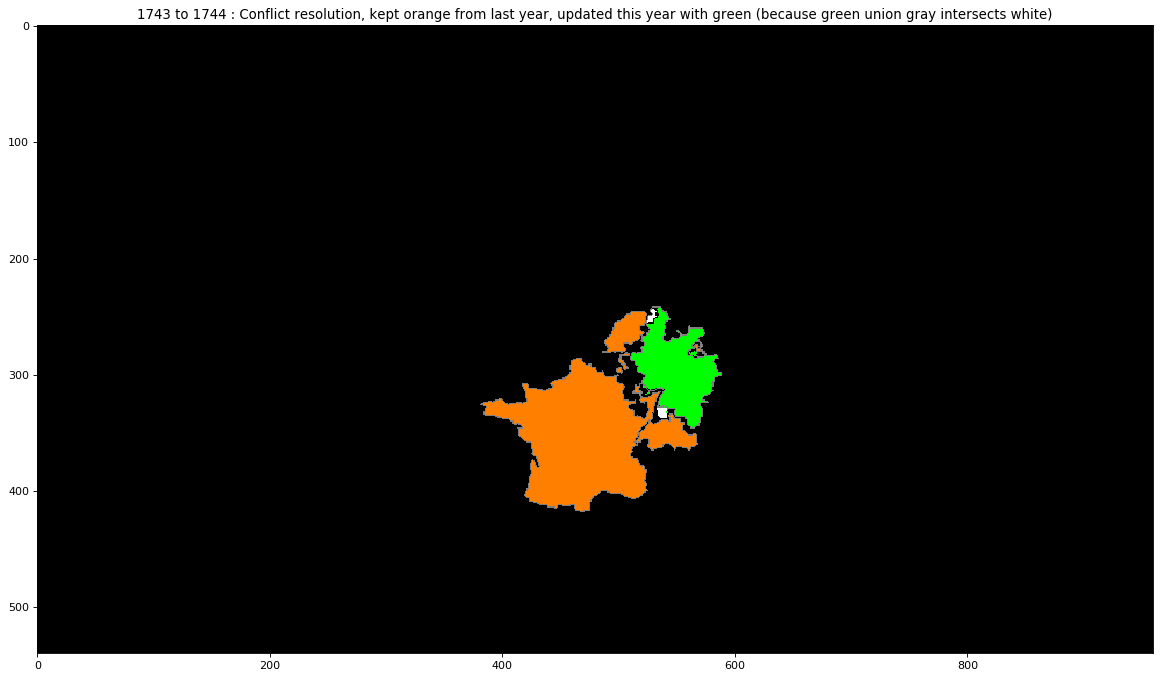

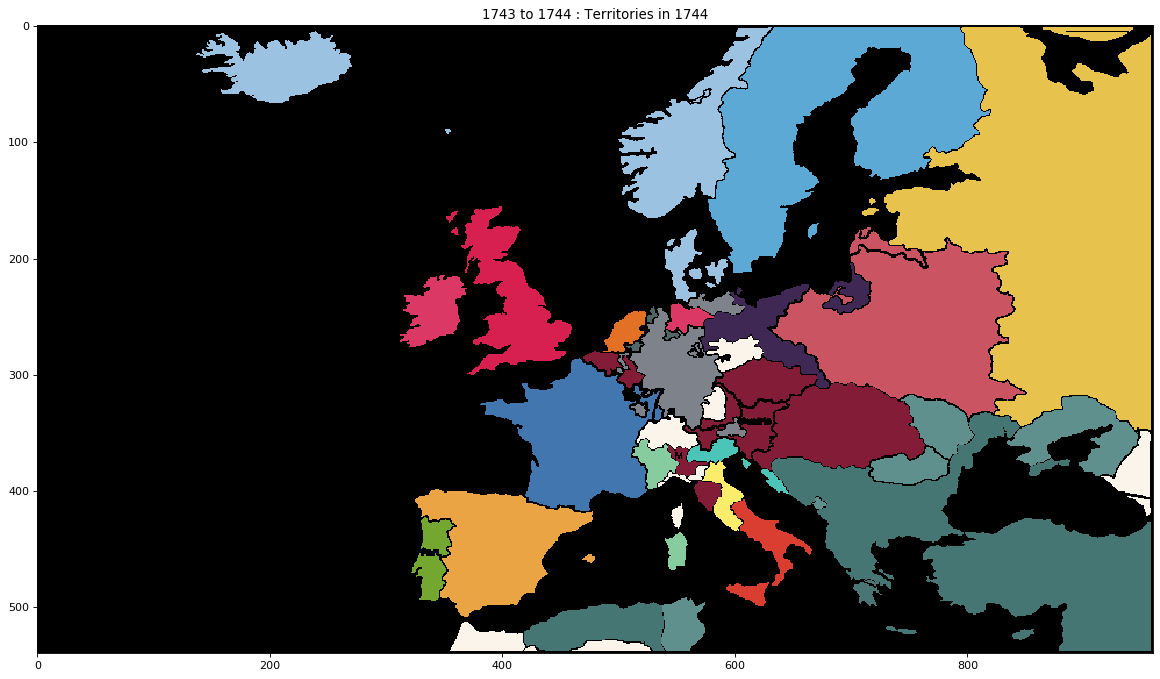

ignored 2 based on ignored_colors 


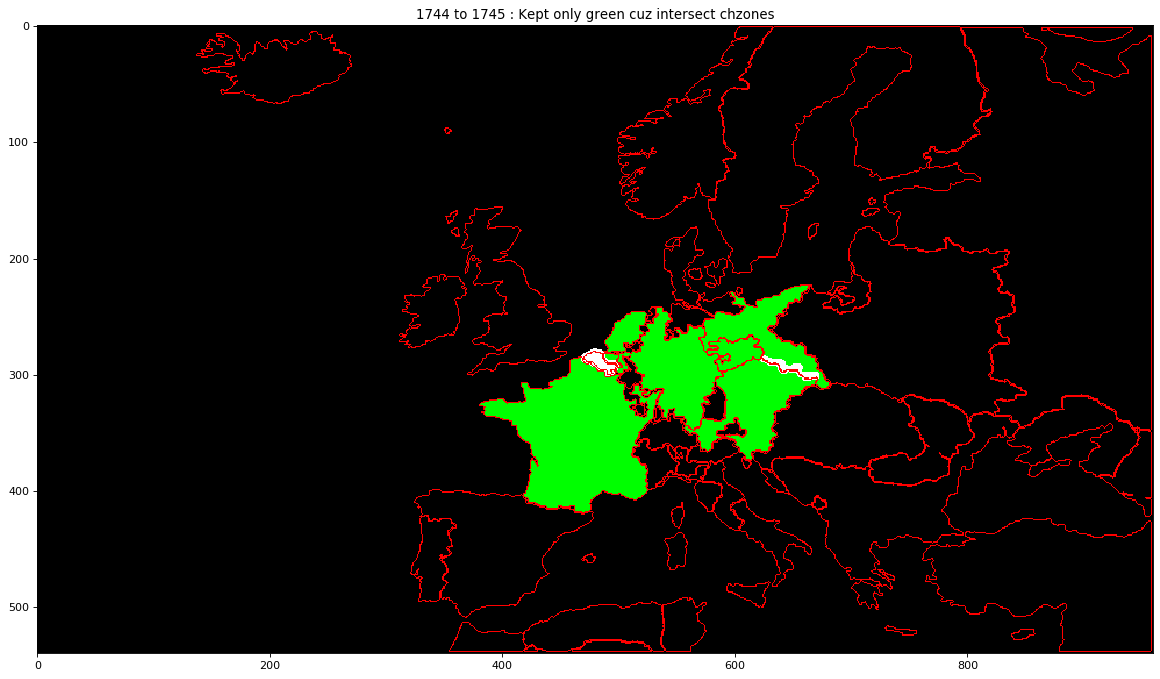


extract color and mask took 1.201601266860962
split territory took 2.8976821899414062


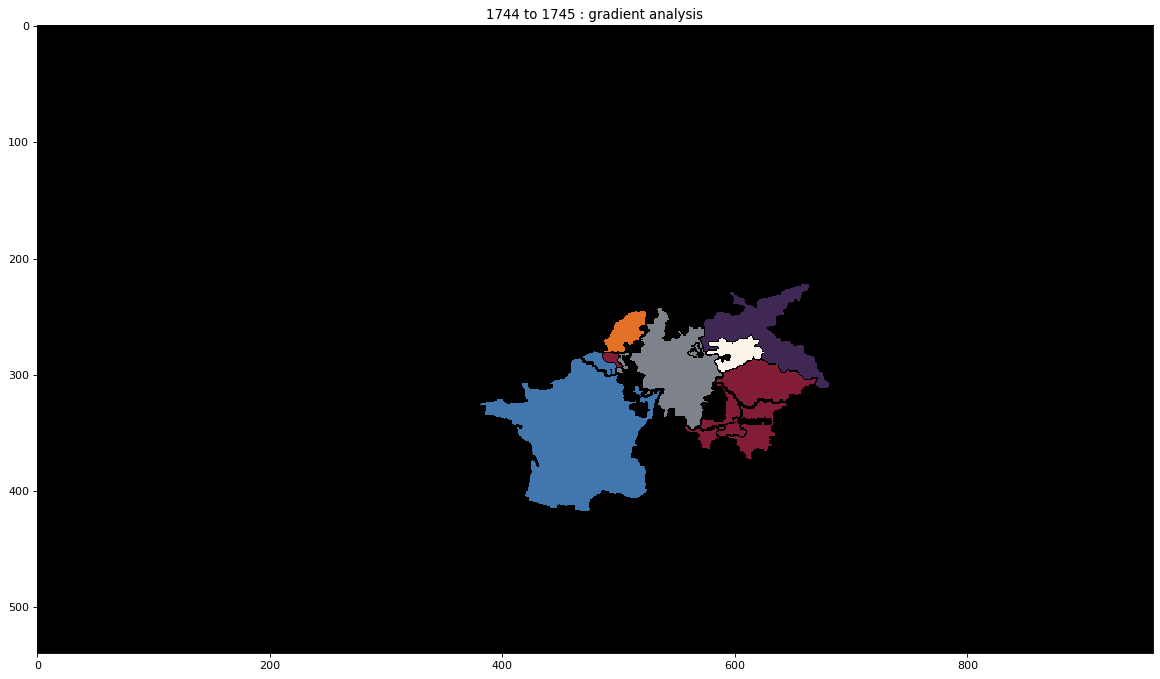

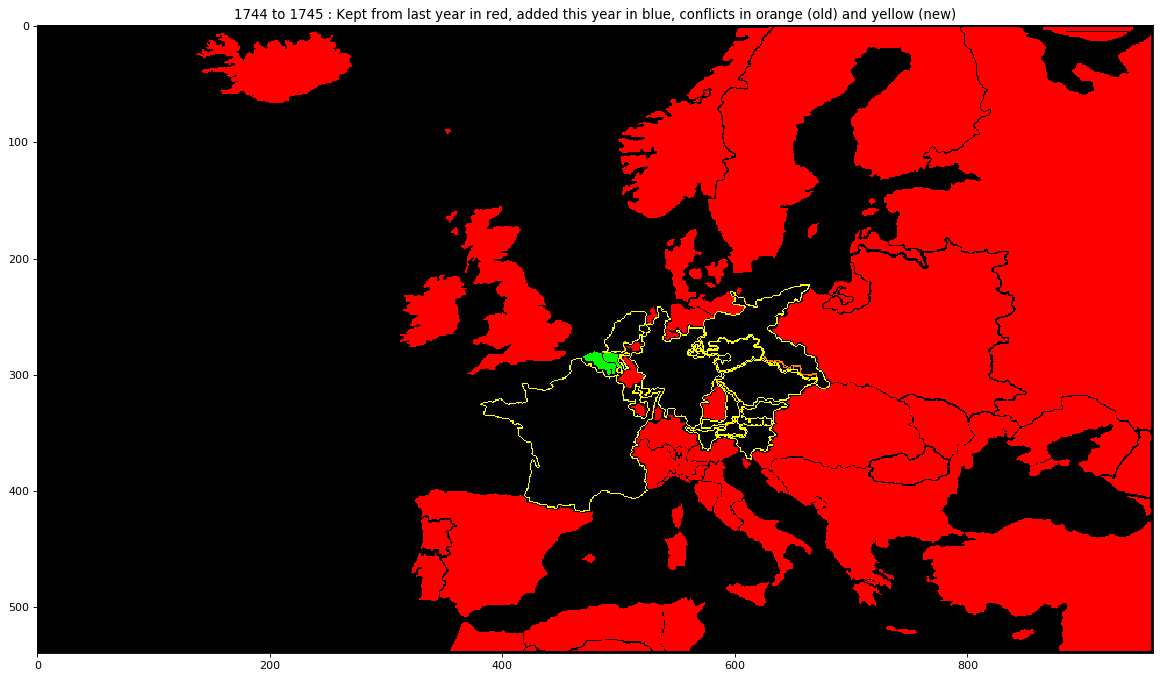

shape conflicts : (13, 2), len merged : 13


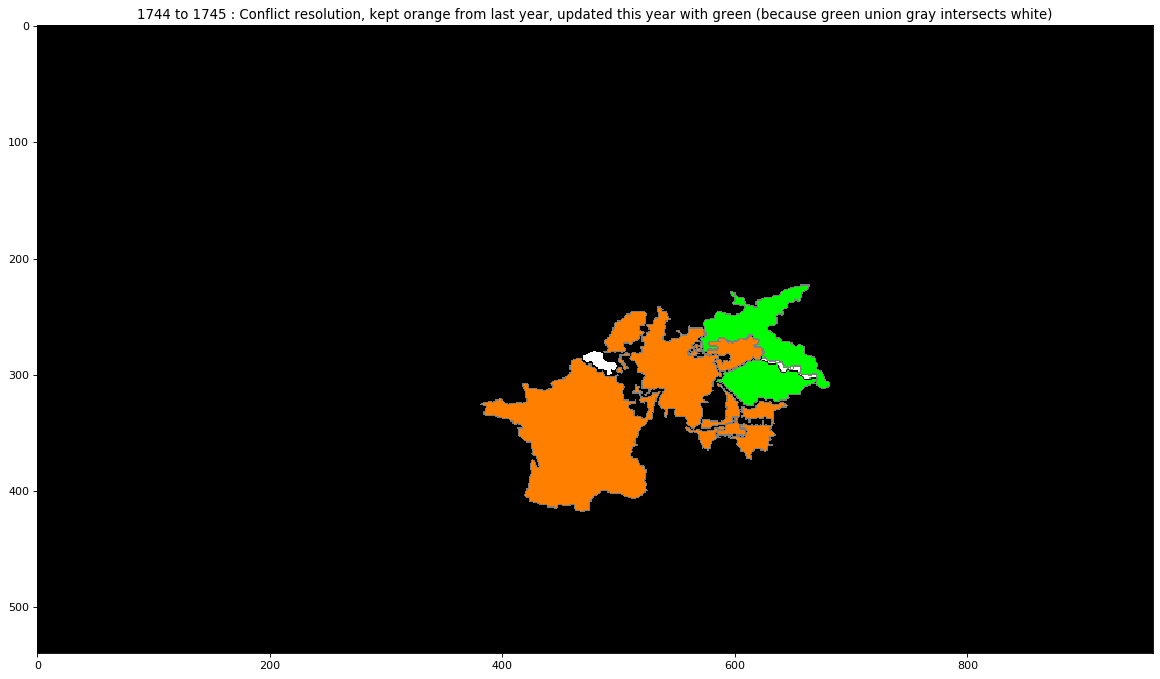

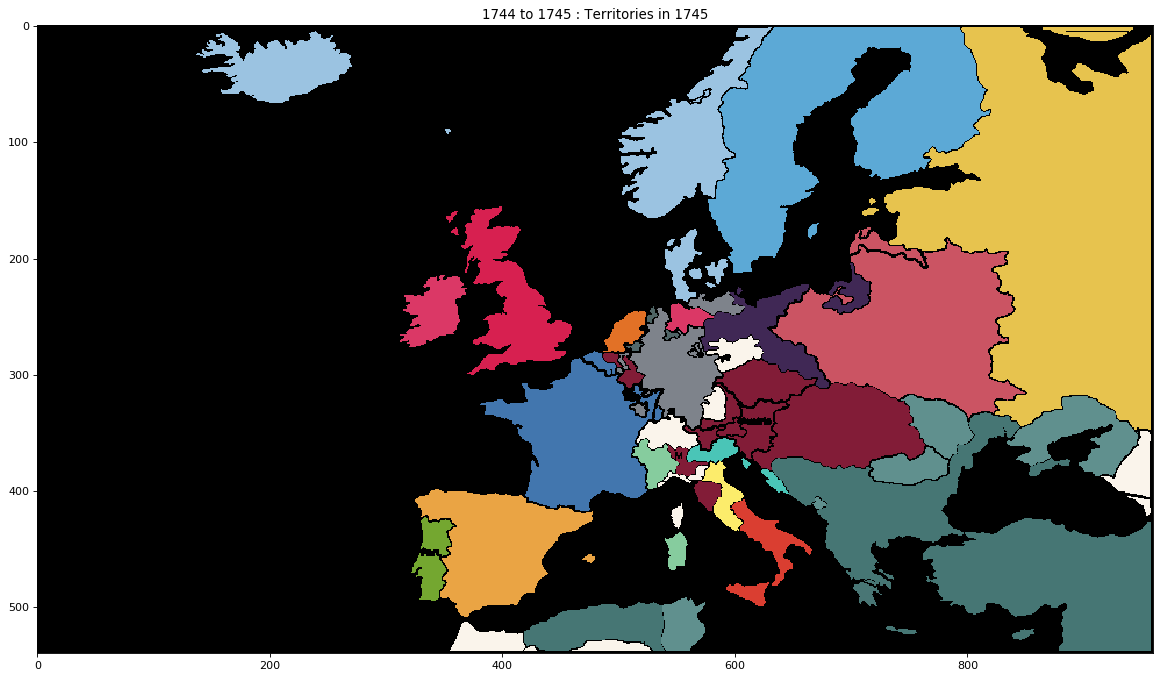

ignored 2 based on ignored_colors 


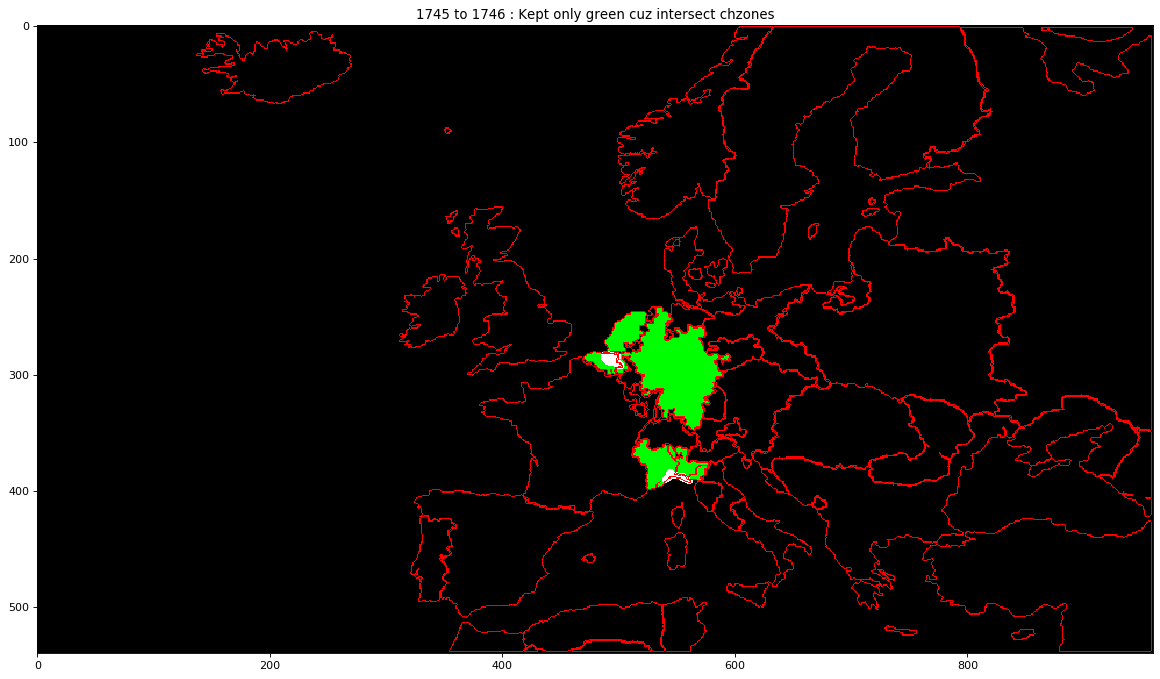


extract color and mask took 0.5347297191619873
split territory took 2.1152822971343994


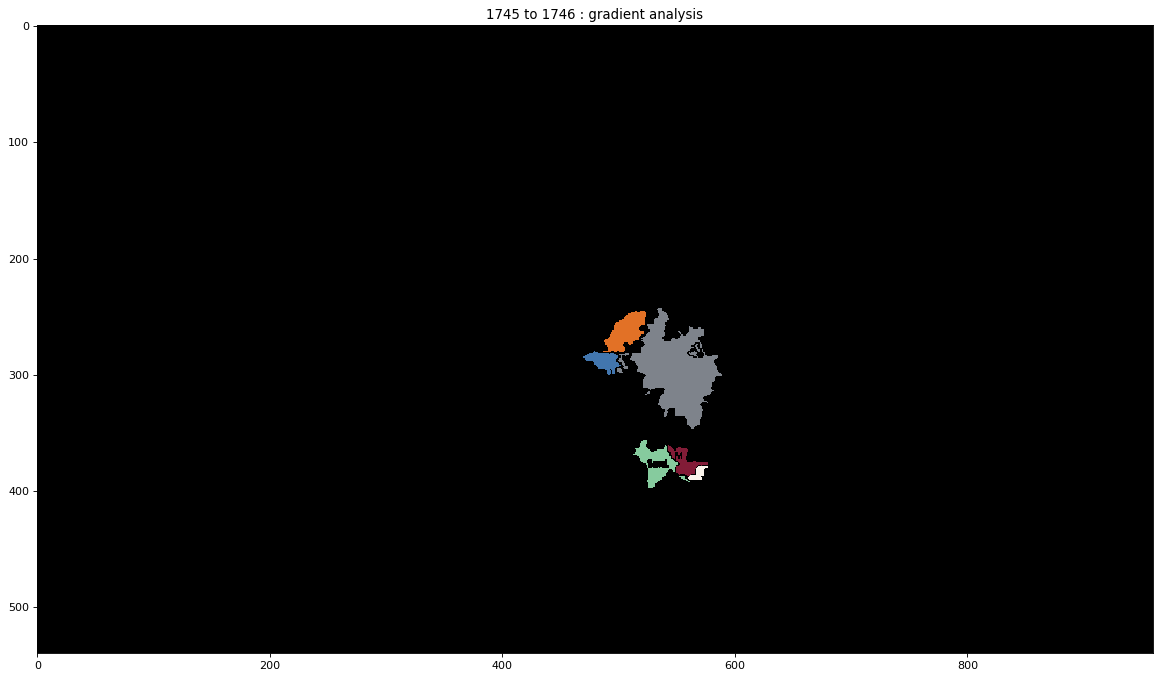

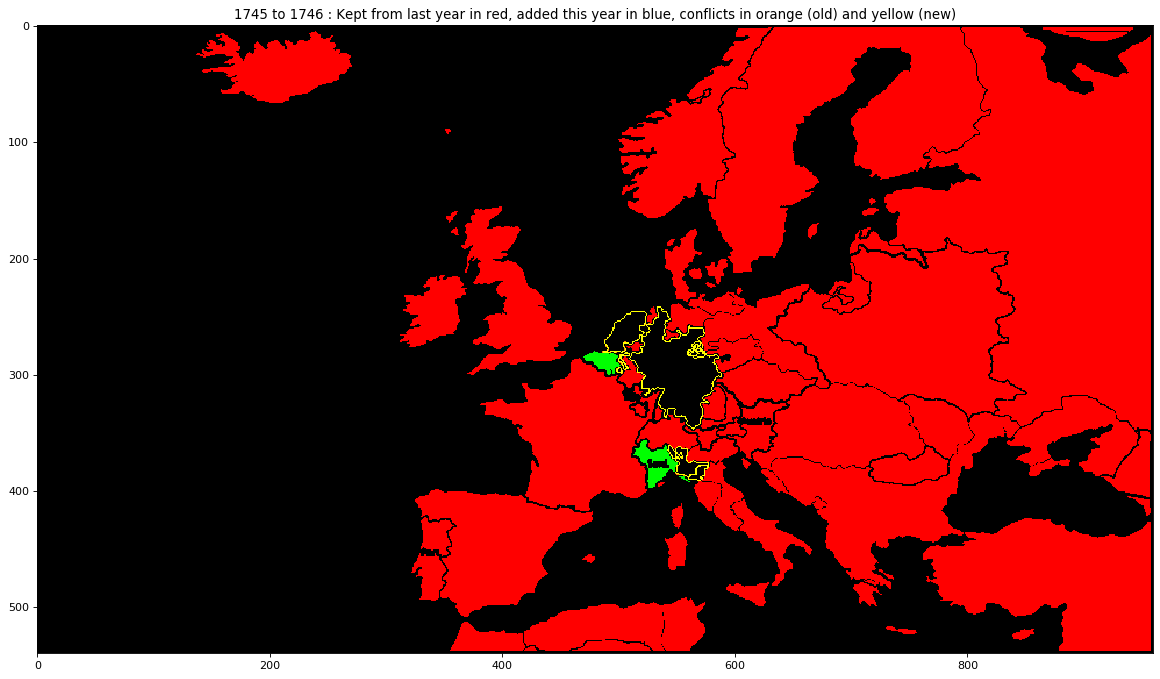

shape conflicts : (7, 2), len merged : 7


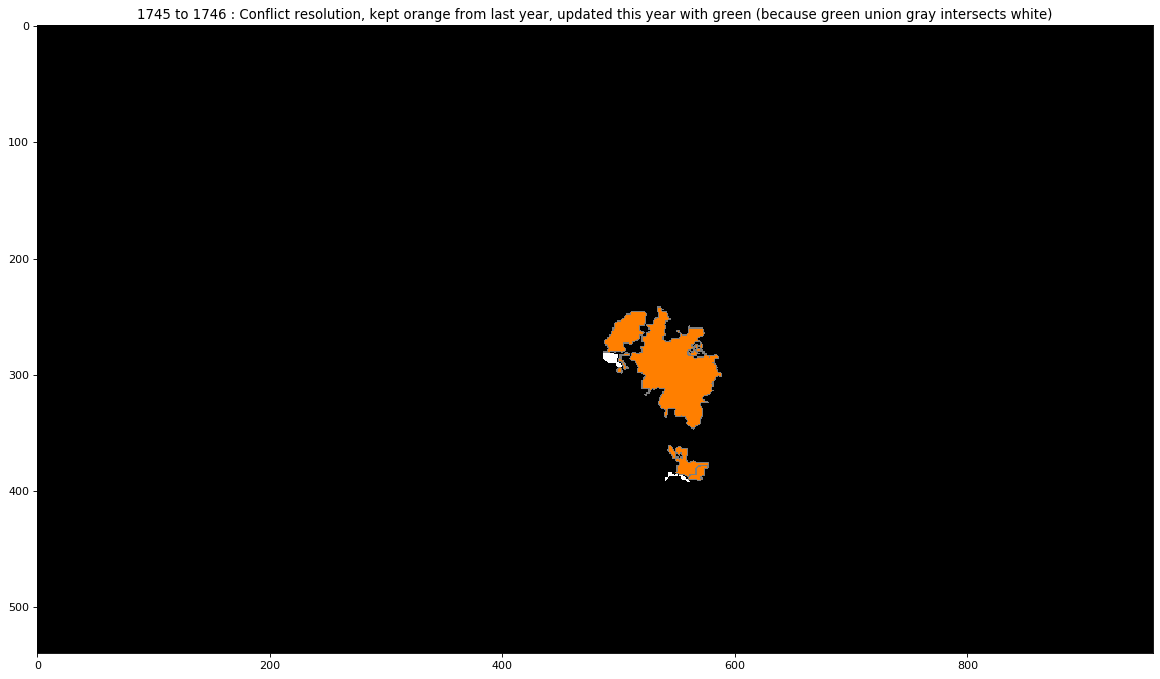

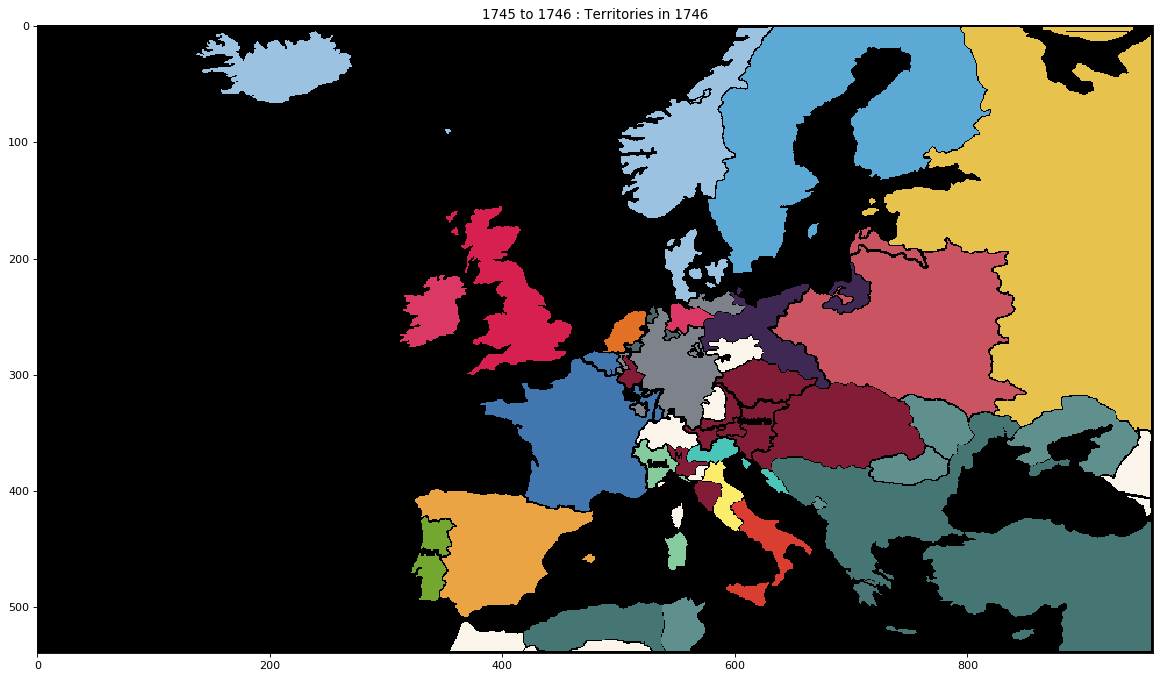

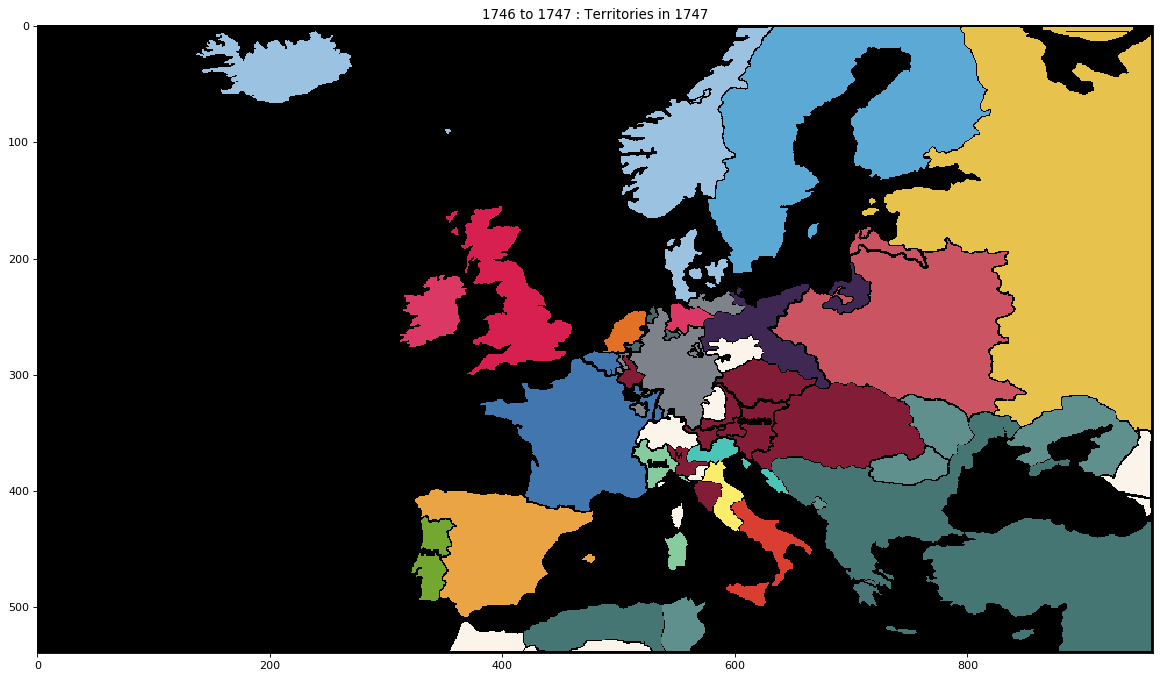

ignored 2 based on ignored_colors 


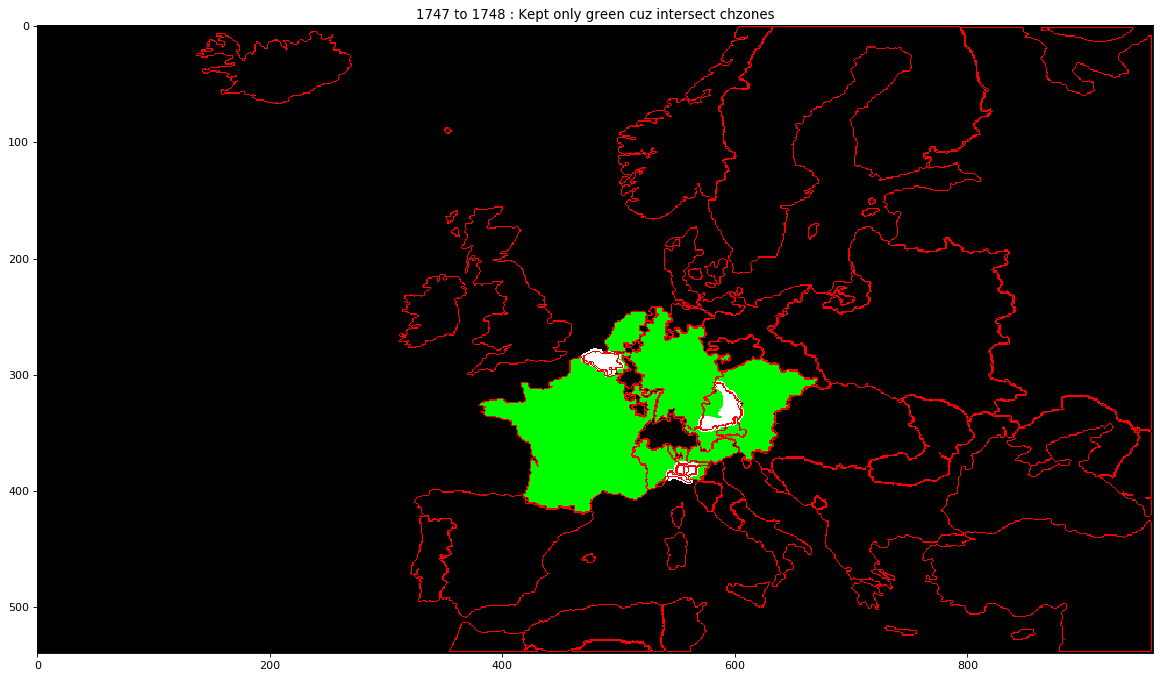


extract color and mask took 1.5327222347259521
split territory took 5.437315464019775


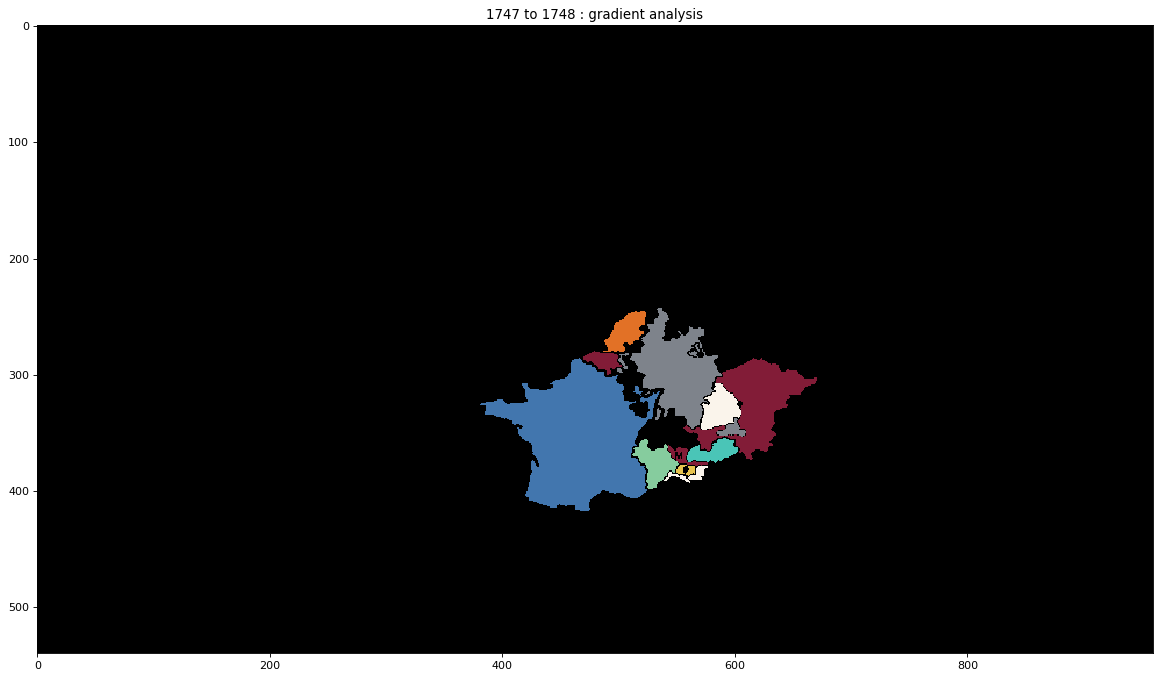

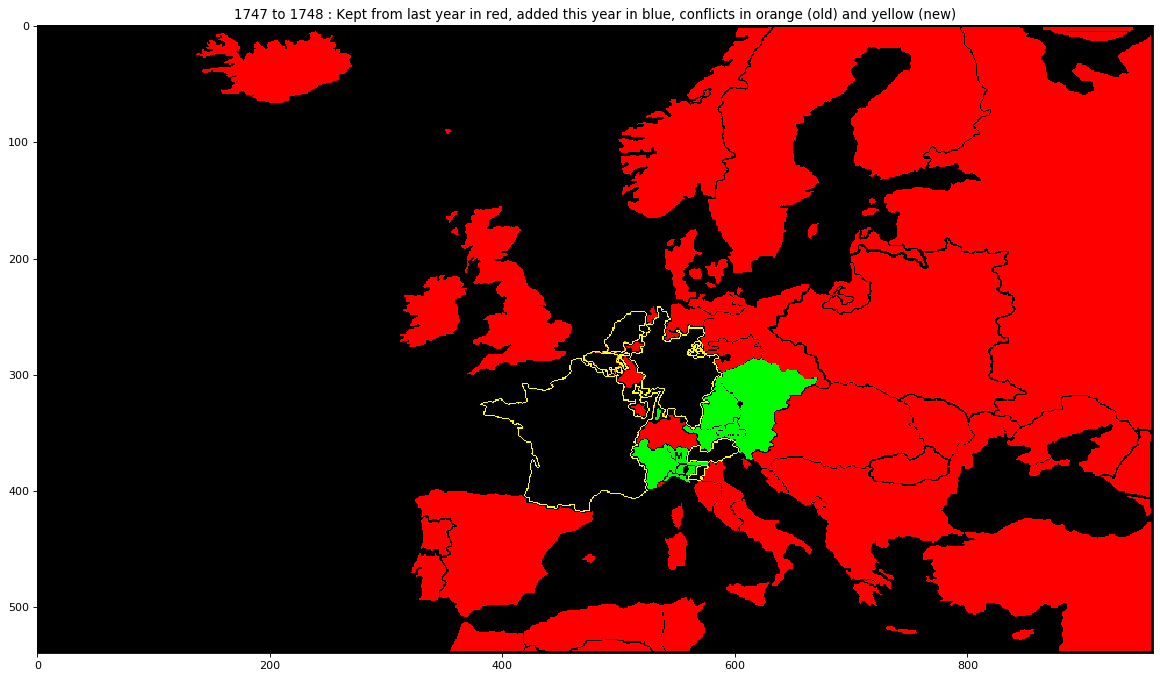

shape conflicts : (10, 2), len merged : 10


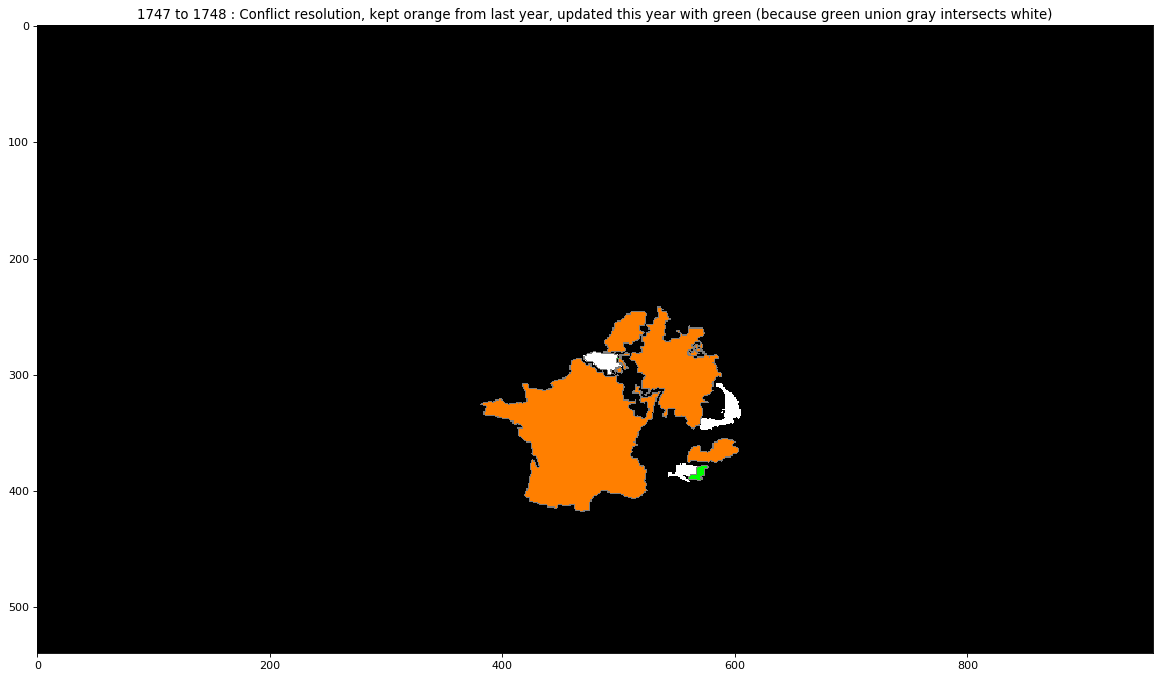

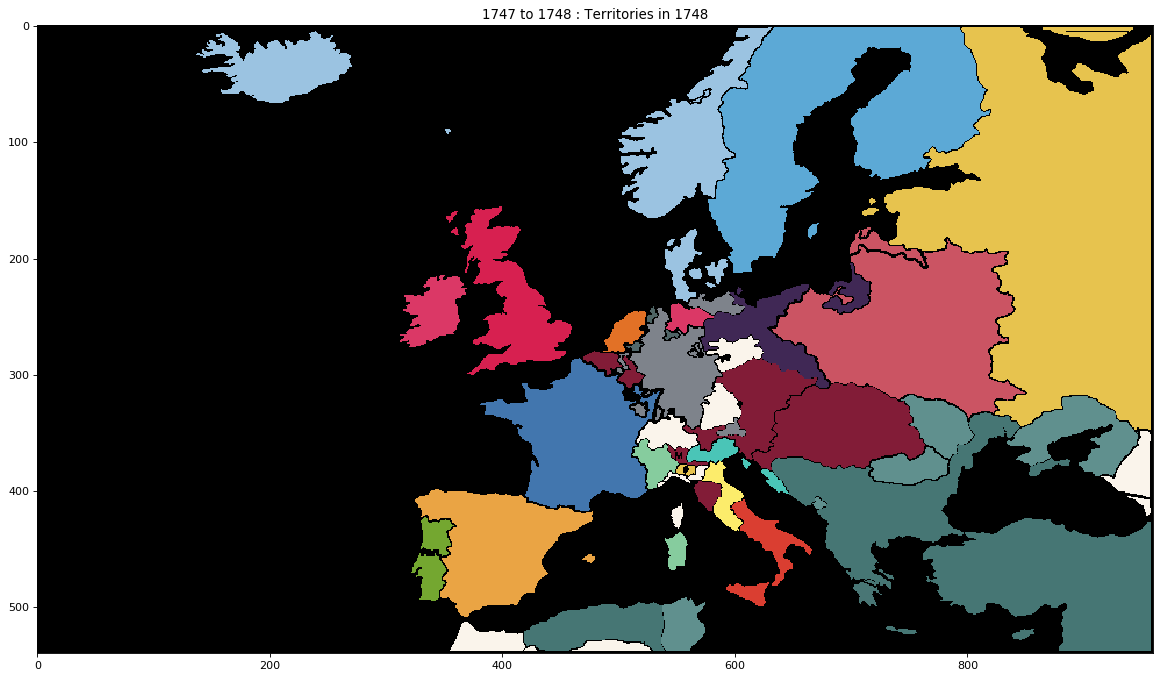

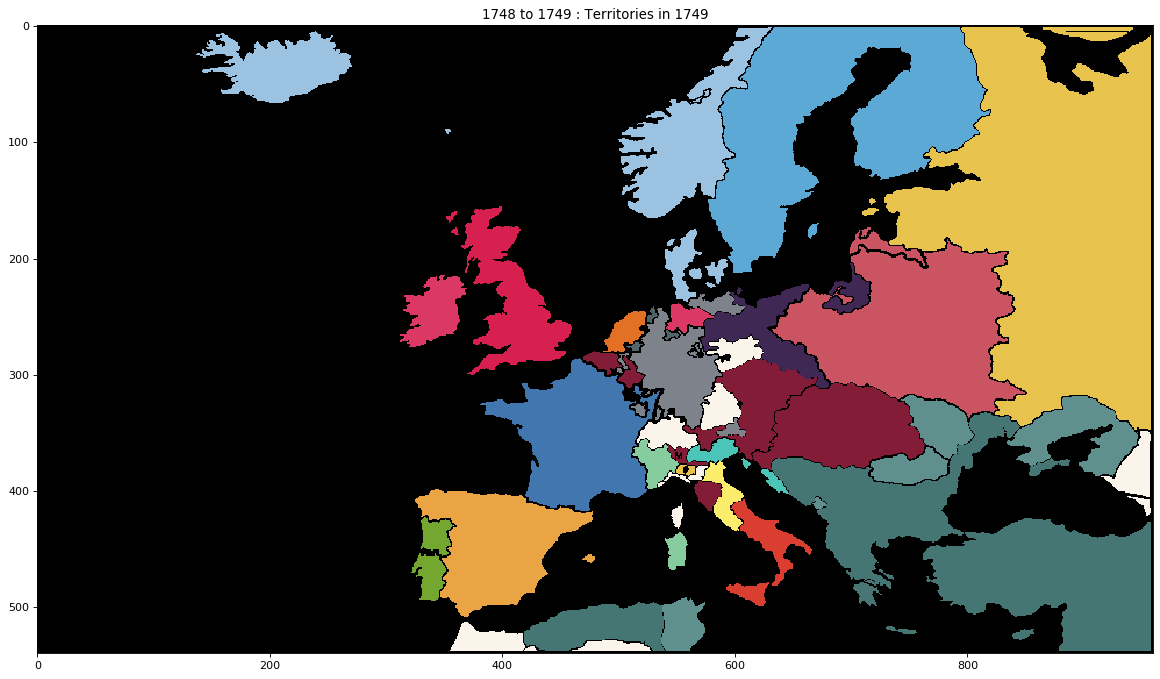

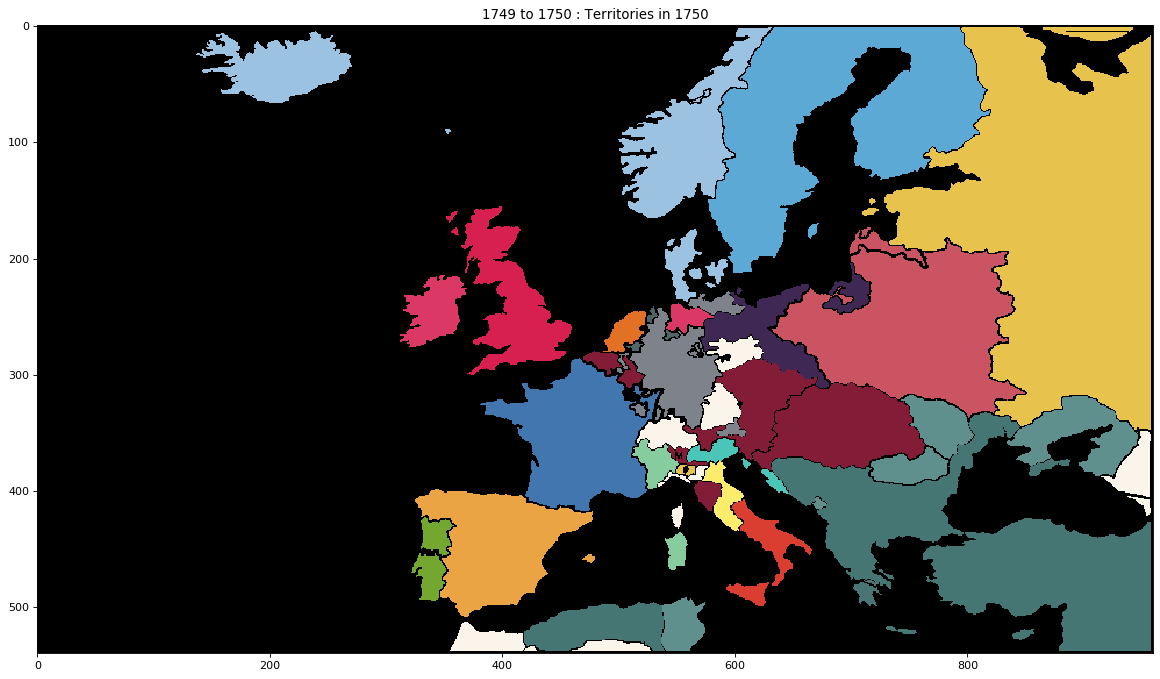

In [58]:
import numpy as np
from shapely.geometry import box, Polygon, MultiPolygon, mapping
import shapely.affinity
from drawing_utils import get_surrounding_colors, fill_box
from map_parsing import get_polygons, regroup_img_colors, colour_distance, is_contained, extract_color_and_mask, split_territory, remove_wrapper_polygons, remove_contained
from tqdm.notebook import tqdm
import skimage.color
import matplotlib.pyplot as plt
import time
from serial_utils import save_results
import json

black_img = np.zeros((1080,1920,3))

def load_clean_map(year, ignored_boxes):
    res = skimage.color.rgba2rgb(plt.imread(f'input/{year}.png'))
    for box in ignored_boxes:
        surrounding_color = get_surrounding_colors(res, box)
        fill_box(res,box,  surrounding_color)
    return res

class Territory :
    def __init__(self, color, polygon):
        assert color is None or isinstance(color, (list, np.ndarray))
        assert isinstance(polygon, Polygon)
        if color is None:
            color = np.random.rand(3)
        self.color = np.array(color)
        self.polygon = polygon
        
    def partially_covered_by(self, surface):
        if not surface.is_valid:
            surface = surface.buffer(0)
        if not surface.is_valid:
            raise Exception("ca marche toujours pas")
            
        return self.polygon.intersection(surface).area> .2* self.polygon.area

    def roughly_same_as(self, other_territory):
        intersection_area = self.polygon.intersection(other_territory.polygon).area
        return intersection_area > .9*self.polygon.area and intersection_area > .9* other_territory.polygon.area

    
def extract_territories_by_color(clustered_image, colors_on_cluster, ignored_colors):
    distance_from_ignored = lambda color :  min([colour_distance(color, ignored) for ignored in ignored_colors])
    relevant_colors = [color for color in colors_on_cluster if distance_from_ignored(color) > .005]
    print(f'ignored {len(colors_on_cluster) - len(relevant_colors)} based on ignored_colors ')
    [relevant_colors_in_gray] = skimage.color.rgb2gray(np.array([relevant_colors]))

    grayscale_map = skimage.color.rgb2gray(clustered_image)
    mask_all = [grayscale_map==gray_color for gray_color in relevant_colors_in_gray]
    mask_all = [skimage.filters.median(mask, selem=np.ones((3, 3))) for mask in mask_all]
    territories = []
    for i, mask in enumerate(mask_all):
        analyzed_color = relevant_colors[i]
        territories = territories + [Territory(analyzed_color, p) for p in get_polygons(mask)]
    
    territories = [t for t in territories if t.polygon.area >60]
    territories = [t for t in territories if t.polygon.area/t.polygon.length >2]
    territories = [t for t in territories if t.polygon.area < clustered_image.shape[0]*clustered_image.shape[1]*.95 ]
    other_polygons = lambda t : [o.polygon for o in territories if o is not t]
    territories = [t for t in territories 
                if not is_contained(t.polygon,other_polygons(t))]
    return territories

def get_change_zones(previous_map, next_map):
    prev_lab = skimage.color.rgb2lab(previous_map)
    next_lab = skimage.color.rgb2lab(next_map)
    change_map = np.sum((prev_lab - next_lab)**2, axis=2)
    change_zones = MultiPolygon([p for p in get_polygons(change_map > 1000) if p.area>60]) 
    if not change_zones.is_valid:
        change_zones = change_zones.buffer(0)
    change_zones_dilated = change_zones.buffer(4)
    #draw_territories(black_img, (change_zones_dilated, 'fill', 'white'), (change_zones, 'stroke', 'red'), 'Change zones original in red, dilated in white')
    return change_zones , change_zones_dilated

def compute_analysis_window_with_offset(year_map, previous_color_analysis, change_zones_dilated):
    print(f'received {len(previous_color_analysis)} territories in previous color analysis')
    draw_territories(black_img, (previous_color_analysis, 'stroke', 'red'), 'previous color analysis')
    impacted_territories = MultiPolygon([t.polygon for t in previous_color_analysis if t.polygon.intersects(change_zones_dilated)])
    offset = 10
    draw_territories(black_img, (change_zones_dilated, 'fill', 'white'), (impacted_territories, 'stroke', 'green'), (box(*impacted_territories.bounds), 'stroke', 'red'), 'Computed window for analysis in red, from the green territories bbox')
    xa, ya, xb, yb = np.array(impacted_territories.bounds).astype(int)
    return (np.pad(year_map[ya:yb, xa:xb], ((offset, offset), (offset,offset), (0,0))), (xa-offset, ya-offset))

def remove_unimpacted(territories, change_zones_dilated):
    return [t for t in territories if t.polygon.intersects(change_zones_dilated)]


def solve_conflict(old, new, change_zones):
    return new if  old.polygon.union(new.polygon).intersects(change_zones) else old

def merge_new_and_previous_analysis(new_analysis, previous_analysis, change_zones):
    new_surface = MultiPolygon([t.polygon for t in new_analysis]).buffer(0)
    previous_uncovered_by_new = [t for t in previous_analysis if not t.partially_covered_by(new_surface)]
    covered_previous = [t for t in previous_analysis if t not in previous_uncovered_by_new]
    conflicts = []
    new_analysis_unconflicted = new_analysis
    for old_territory in covered_previous:
        for new_territory in new_analysis:
            if old_territory.roughly_same_as(new_territory):
                conflicts.append((old_territory, new_territory))
                new_analysis_unconflicted.remove(new_territory)
    conflicts = np.array(conflicts)
    merged_conflicts = []
    draw_territories(black_img,
                     (previous_uncovered_by_new, 'fill', 'red'),
                     (new_analysis_unconflicted, 'fill', 'green'),
                    (conflicts[:,0] if len(conflicts) else [], 'stroke', [1,.5,0]),
                     (conflicts[:,1] if len(conflicts) else [], 'stroke', [1,1,0]),
                     'Kept from last year in red, added this year in blue, conflicts in orange (old) and yellow (new)'
                    )
    for old_territory, new_territory in conflicts:
        result = solve_conflict(old_territory, new_territory, change_zones)
        merged_conflicts.append(result)
       # draw_territories(black_img, (result, 'fill', 'green' if result is new_territory else [1, .5,0]),(change_zones, 'fill', 'white'), (old_territory if new_territory is result else new_territory, 'stroke', [.5, .5, .5]), 
        #                'Kept new in green or old in orange, green if intersects white')
    print(f'shape conflicts : {conflicts.shape}, len merged : {len(merged_conflicts)}')
    if len(conflicts):
        draw_territories(black_img,
                         ([old for old in conflicts[:,0] if old in merged_conflicts], 'fill', [1, .5, 0]),
                         ([n for n in conflicts[:,1] if n in merged_conflicts], 'fill', 'green'),
                         (change_zones, 'fill', 'white'),
                         ([old for old in conflicts[:,0] if old not in merged_conflicts]+[n for n in conflicts[:,1] if n not in merged_conflicts], 'stroke', [.5, .5, .5] ),
                         'Conflict resolution, kept orange from last year, updated this year with green (because green union gray intersects white)'
                        )
    
    return previous_uncovered_by_new + new_analysis_unconflicted + merged_conflicts
    

def analyze_year(previous_year_analysis, previous_year_map, this_year_map, ignored_colors):
    if not previous_year_analysis:
        return time_unaware_analysis(this_year_map, ignored_colors)
    change_zones, dilated_change_zones = get_change_zones(previous_year_map, this_year_map)
    if not len(change_zones.geoms):
        return previous_year_analysis
    terr_by_color = color_analysis(this_year_map, ignored_colors)
    relevant_terr_by_color = remove_unimpacted(terr_by_color, dilated_change_zones)
    draw_territories(black_img, (relevant_terr_by_color, 'fill', 'green'), (dilated_change_zones, 'fill', 'white'), (terr_by_color, 'stroke', 'red'), 'Kept only green cuz intersect chzones')
    territories_by_gradient = extract_territories_by_gradient(relevant_terr_by_color, this_year_map)
    draw_territories(black_img, (territories_by_gradient, 'fill', None), 'gradient analysis')
    this_year_analysis = merge_new_and_previous_analysis(territories_by_gradient,previous_year_analysis, change_zones)
    return this_year_analysis

def time_unaware_analysis(map_image, ignored_colors):
    terr_by_color = color_analysis(map_image, ignored_colors)
    terr_by_gradient = extract_territories_by_gradient(terr_by_color, map_image)
    draw_territories(black_img, (terr_by_gradient, 'fill', None), 'gradient analysis')
    return terr_by_gradient

def color_analysis(image, ignored_colors):
    clustered_img, major_colors = regroup_img_colors(image)
    territories_by_color = extract_territories_by_color(clustered_img, major_colors, ignored_colors)
    return territories_by_color


def extract_color_and_mask(img, polygon):
    res = img.copy()
    coords = np.array(polygon.exterior.coords)
    rr, cc = skimage.draw.polygon(coords[:, 1], coords[:, 0])
    mask = np.ones(img.shape[:2]).astype(bool)
    mask[rr, cc] = False
    color= np.median(img[rr, cc], axis=0)
    res[mask] = 0
    return color, res

def split_territory(territory_color, masked_img, verbose=False):
    edges = skimage.feature.canny(skimage.color.rgb2gray(masked_img), sigma=.5)
    fat_edges = skimage.morphology.dilation(edges, skimage.morphology.disk(1))
    inner_polygons = [p for p in get_polygons(fat_edges) if p.area > 60]
    if verbose:
        display_img(masked_img, 'source')
        display_img(edges, 'edges')
        display_img(fat_edges, 'fat edges')
    if len(inner_polygons) > 1:
        inner_polygons_atomic = remove_wrapper_polygons(inner_polygons)
    else :
        inner_polygons_atomic = inner_polygons
    if len(inner_polygons_atomic) > 1:
        inner_polygons_atomic = remove_contained(inner_polygons_atomic)
    return inner_polygons_atomic

def extract_territories_by_gradient(territories, original_image, show_progress=True):
    res = []
    if show_progress :
        territories = tqdm(territories, desc="extract territories by gradient")
    extract_color_time = 0
    split_territory_time = 0
    for i, territory in enumerate(territories):
        start = time.time()
        color, masked = extract_color_and_mask(original_image, territory.polygon)
        extract_color_time+= time.time()-start
        start=time.time()
        inner_polygons = split_territory(color, masked, i==25)
        split_territory_time+= time.time()-start
        if len(inner_polygons) > 1:
            for pol in inner_polygons:
                res.append(Territory(color, pol))
        else:
            res.append(territory)
    print(f'extract color and mask took {extract_color_time}')
    print(f'split territory took {split_territory_time}')
    return res

def save_results(results, filename):
    serializable_results = [
        {
            "color" : list(t.color.astype(float)),
            "polygon" : mapping(t.polygon)
        } for t in results
    ]
    json.dump(serializable_results, open(filename, 'w'))


    
def time_aware_analysis(start_year, end_year, ignored_boxes, ignored_colors, verbose=False):
    first_year_map = load_clean_map(start_year, ignored_boxes)
    previous_year_map = None
    previous_year_analysis = None
    
    for year in tqdm(range(start_year, end_year+1)):
        global current_year
        current_year = year
        this_year_map = load_clean_map(year, ignored_boxes)
        this_year_analysis = analyze_year(previous_year_analysis , previous_year_map, this_year_map, ignored_colors)
        draw_territories(black_img, (this_year_analysis, 'fill', None), f'Territories in {year}')
        save_results(this_year_analysis, f'output/{year}.json')
        previous_year_analysis = this_year_analysis
        previous_year_map = this_year_map

start_year = 1710
end_year = 1750
ignored_boxes =[box(10, 230, 600, 1050),  box(10, 10, 170, 150), box(800, 10, 1040, 150),box(1030, 30, 1070, 130) ]
sea_color = get_surrounding_colors(skimage.color.rgba2rgb(plt.imread('input/1700.png')), box(10, 230, 600, 1050))
time_aware_analysis(start_year, end_year, ignored_boxes, [sea_color, [0,0,0]], True)